Import Libraries

In [1]:
# math libraries
import math
import numpy as np
import pandas as pd
import random
import scipy

# data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
from tabulate import tabulate

# utility tools
import json
import os
import sys
from time import sleep
from tqdm import tqdm
from tqdm.notebook import tqdm
import gc
from collections import Counter
import itertools
from functools import partial
import splitfolders
import glob
from glob import iglob
import shutil

# libraries for permutation,evaluation metrics
from sklearn.utils import shuffle, class_weight
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# image processing
from skimage.io import imread, imshow
from skimage.io import imread_collection
from skimage.transform import resize
from skimage import io
from skimage.filters import rank, threshold_otsu
from skimage.color import rgb2gray
from skimage.morphology import closing, square, disk
from sklearn.cluster import KMeans
from PIL import Image

# processing data and building the model
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition, preprocessing, svm
import cv2

# building the model
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, Callback
from tensorflow.keras.callbacks import ReduceLROnPlateau

# pretrained models
from tensorflow.keras.applications import *
from tensorflow.keras.utils import to_categorical
from sklearn.utils.class_weight import compute_class_weight
import sklearn.metrics as metrics
from tensorflow.keras.utils import plot_model

D:\Conda\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
# SEED makes results reproducible
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

## Data Preprocessing

### Converting the dataset from one folder into sorted, separate folders

In [6]:
class_data = pd.read_csv("GroundTruth.csv")
class_data.head()

image  MEL   NV  BCC  AKIEC  BKL   DF  VASC
0  ISIC_0024306  0.0  1.0  0.0    0.0  0.0  0.0   0.0
1  ISIC_0024307  0.0  1.0  0.0    0.0  0.0  0.0   0.0
2  ISIC_0024308  0.0  1.0  0.0    0.0  0.0  0.0   0.0
3  ISIC_0024309  0.0  1.0  0.0    0.0  0.0  0.0   0.0
4  ISIC_0024310  1.0  0.0  0.0    0.0  0.0  0.0   0.0

In [7]:
class_data.shape

(10015, 8)

In [8]:
# create new dataframe
new_class_df = class_data.copy()
class_name_list = []
for i in range(class_data.shape[0]):
    for column_name, column_data in class_data.iteritems():
        if(column_name != "image" and column_data[i] == 1):
            if(column_name=="MEL"):
                class_name = "MEL"
            elif(column_name=="NV"):
                class_name = "NV"
            elif(column_name=="BCC"):
                class_name = "BCC"
            elif(column_name=="AKIEC"):
                class_name = "AKIEC"
            elif(column_name=="BKL"):
                class_name = "BKL"
            elif(column_name=="DF"):
                class_name = "DF"
            else:
                class_name = "VASC"
    class_name_list.append(class_name)
new_class_df.insert(1, "class_name",class_name_list,True)
new_class_df.drop(labels=["MEL", "NV", "BCC", "AKIEC", "BKL", "DF", "VASC"], axis=1, inplace = True)
new_class_df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_85116\2071769788.py:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column_name, column_data in class_data.iteritems():


image class_name
0  ISIC_0024306         NV
1  ISIC_0024307         NV
2  ISIC_0024308         NV
3  ISIC_0024309         NV
4  ISIC_0024310        MEL

In [9]:
# save new csv to folder
csv_path = r"C:\Users\User\Downloads\FYP\classid.csv"
new_class_df.to_csv(csv_path, index=False)

In [10]:
# sort images into folders by class
labels = pd.read_csv("classid.csv")

img_dir =r"C:\Users\User\Downloads\FYP\images"
folder_dir = r"C:\Users\User\Downloads\FYP\data\class_"
if not os.path.exists(folder_dir):
    os.mkdir(folder_dir)

for filename, class_name in labels.values:
    # create subdirectory with `class_name`
    if not os.path.exists(folder_dir + str(class_name)):
        os.mkdir(folder_dir + str(class_name))
    src_path = img_dir + '/'+ filename + '.jpg'
    dst_path = folder_dir + str(class_name) + '/' + filename + '.jpg'
    try:
        shutil.copy(src_path, dst_path)
        print("sucessful")
    except IOError as e:
        print('Unable to copy file {} to {}'
              .format(src_path, dst_path))
    except:
        print('When try copy file {} to {}, unexpected error: {}'
              .format(src_path, dst_path, sys.exc_info()))
os.rmdir(folder_dir)

sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful


sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful


sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful


sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful


sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful


sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful


sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful


sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful


sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful


sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful


sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful


### Split data in each class into train validation test sets

In [11]:
input_folder = r"C:\Users\User\Downloads\FYP\data"
splitfolders.ratio(input_folder, output="dataset", seed = SEED, ratio=(.7,.2,.1),group_prefix=None)

Copying files: 10015 files [00:12, 816.60 files/s]


### Setting up augmentation function

No Data Augmentation

In [4]:
reg_data_gen = ImageDataGenerator(rescale=1./255)

Data Augmentation

In [5]:
aug_data_gen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=360,
                                  horizontal_flip=True,
                                  vertical_flip=True,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  zoom_range=(0.75,1),
                                  brightness_range=(0.75,1.25)
                                 )

### Loading dataset with ImageDataGenerator for B0

#### No Data Augmentation

In [5]:
# define parameters
class_num = 7
target_size = (224,224)
size_batch = 32
epochs = 50

In [6]:
training_data = reg_data_gen.flow_from_directory(directory=r"C:\Users\User\Downloads\FYP\dataset\train",
                                                 target_size = target_size,
                                                 class_mode = 'categorical',
                                                 batch_size = size_batch,
                                                 seed=SEED)

Found 7007 images belonging to 7 classes.


In [7]:
validation_data = reg_data_gen.flow_from_directory(directory=r"C:\Users\User\Downloads\FYP\dataset\val",
                                                 target_size = target_size,
                                                 class_mode = 'categorical',
                                                 batch_size = size_batch,
                                                 seed=SEED)

Found 2000 images belonging to 7 classes.


In [8]:
test_data = reg_data_gen.flow_from_directory(directory=r"C:\Users\User\Downloads\FYP\dataset\test",
                                                 target_size = target_size,
                                                 class_mode = 'categorical',
                                                 batch_size = size_batch,
                                                 seed=SEED)

Found 1008 images belonging to 7 classes.


#### Data Augmentation

In [9]:
aug_training_data = aug_data_gen.flow_from_directory(directory=r"C:\Users\User\Downloads\FYP\dataset\train",
                                                 target_size = target_size,
                                                 class_mode = 'categorical',
                                                 batch_size = size_batch,
                                                 seed=SEED)

Found 7007 images belonging to 7 classes.


In [10]:
aug_validation_data = reg_data_gen.flow_from_directory(directory=r"C:\Users\User\Downloads\FYP\dataset\val",
                                                 target_size = target_size,
                                                 class_mode = 'categorical',
                                                 batch_size = size_batch,
                                                 seed=SEED)

Found 2000 images belonging to 7 classes.


In [11]:
aug_test_data = reg_data_gen.flow_from_directory(directory=r"C:\Users\User\Downloads\FYP\dataset\test",
                                                 target_size = target_size,
                                                 class_mode = 'categorical',
                                                 batch_size = size_batch,
                                                 seed=SEED)

Found 1008 images belonging to 7 classes.


In [12]:
# 7 classes: "class_AKIEC", "class_BCC", "class_BKL", "class_DF", "class_MEL", "class_NV", "class_VASC"
lesion_classes = ["class_AKIEC", "class_BCC", "class_BKL", "class_DF", "class_MEL", "class_NV", "class_VASC"]
# adding class attribute for classification to train, validation and test datasets: .lesion_classes
training_data.lesion_classes = lesion_classes
validation_data.lesion_classes = lesion_classes
test_data.lesion_classes = lesion_classes

### Non-augmented data vs Augmented data in the training dataset

#### No Data Augmentation

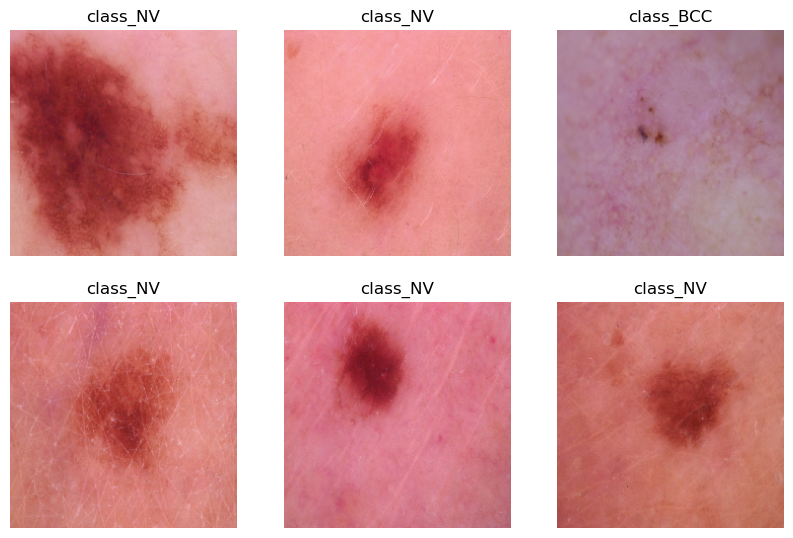

In [22]:
# iterates over the batches of images and their labels provided by the training_data's reg_data_gen generator
for lesion_img, n_labels in training_data:
    plt.figure(figsize=(10,10))
    for i in range(6):
        plt.subplot(330 + 1 + i)
        plt.imshow(lesion_img[i])
        n_classes = training_data.lesion_classes[np.where(n_labels[i] == 1)[0][0]]
        plt.title(n_classes)
        plt.axis('off')
    plt.show()
    break

#### Data Augmentation

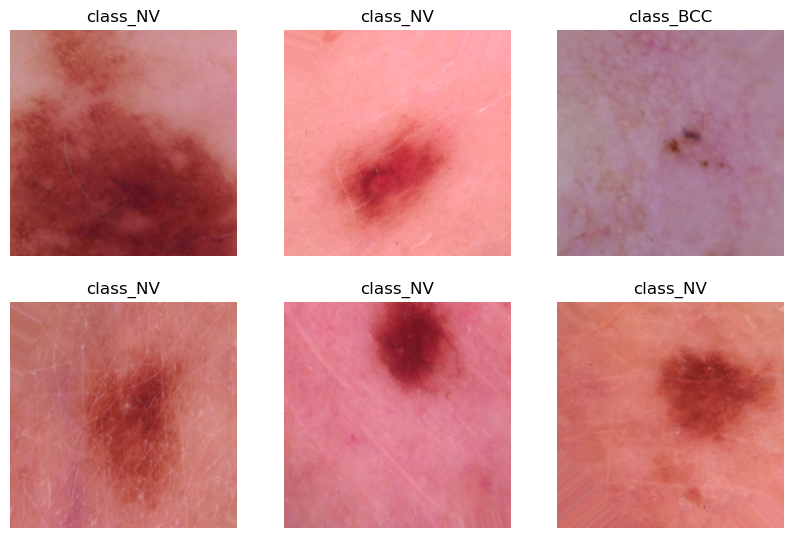

In [23]:
# iterates over the batches of images and their labels provided by the aug_training_data's aug_data_gen generator
for lesion_img, n_labels in aug_training_data:
    plt.figure(figsize=(10,10))
    for i in range(6):
        plt.subplot(330 + 1 + i)
        plt.imshow(lesion_img[i])
        n_classes = training_data.lesion_classes[np.where(n_labels[i] == 1)[0][0]]
        plt.title(n_classes)
        plt.axis('off')
    plt.show()
    break

## Class Weights

In [13]:
class_weights = class_weight.compute_class_weight(class_weight = 'balanced',
                                                  classes = np.unique(training_data.classes),
                                                  y=training_data.classes)
train_class_weights = dict(enumerate(class_weights))

In [14]:
aug_data_class_weights = class_weight.compute_class_weight(class_weight = 'balanced',
                                                           classes = np.unique(aug_training_data.classes),
                                                           y=aug_training_data.classes)
aug_train_class_weights = dict(enumerate(aug_data_class_weights))

## Building the baseline model: EfficientNetB0 + Transfer Learning (No Class Weights)

In [54]:
# building the model
input_shape = (224, 224, 3)
conv_base = EfficientNetB0(weights="imagenet", include_top=False, input_shape=input_shape)
baseline_model = models.Sequential()
baseline_model.add(conv_base)
baseline_model.add(layers.GlobalMaxPooling2D(name="gap"))
#avoid overfitting
baseline_model.add(layers.Dropout(rate=0.5, name="dropout_out"))
baseline_model.add(layers.Dense(class_num, activation="softmax", name="fc_out"))
conv_base.trainable = False

In [55]:
# summary of EfficientNetB0 model
baseline_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 7, 7, 1280)        4049571   
 )                                                               
                                                                 
 gap (GlobalMaxPooling2D)    (None, 1280)              0         
                                                                 
 dropout_out (Dropout)       (None, 1280)              0         
                                                                 
 fc_out (Dense)              (None, 7)                 8967      
                                                                 
Total params: 4058538 (15.48 MB)
Trainable params: 8967 (35.03 KB)
Non-trainable params: 4049571 (15.45 MB)
_________________________________________________________________


### Evaluation metrics

In [6]:
# calculating the f1 score
def F1_score(y_true, y_pred):
    # compute true positive count
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    # calculate possible positives
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    # calculate precision
    precision = true_positives / (predicted_positives + K.epsilon())
    # calculate recall
    recall = true_positives / (possible_positives + K.epsilon())
    # calculate the f1_score with precision and recall values
    f1_score_value = 2*(precision*recall)/(precision+recall+K.epsilon())
    # return f1_score
    return f1_score_value

def specificity(y_true, y_pred):
    true_negatives = K.sum(K.round(1 - y_true) * K.round(1 - y_pred))
    actual_negatives = K.sum(K.round(1 - y_true))
    
    specificity = true_negatives / (actual_negatives + K.epsilon())
    return specificity

In [7]:
global eval_metrics
eval_metrics = [tf.keras.metrics.Precision(name="precision"),
                tf.keras.metrics.Recall(name="recall"),
                tf.keras.metrics.CategoricalAccuracy(name="accuracy"),
                tf.keras.metrics.AUC(name="auc"),
                F1_score,
                specificity]

In [8]:
def plot_history(precision, val_precision, recall, val_recall, specificity, val_specificity, acc_score, val_acc_score,
                 loss, val_loss, auc, val_auc, f1, val_f1):
    # convert lists to numpy arrays
    precision = np.array(precision)
    val_precision = np.array(val_precision)
    recall = np.array(recall)
    val_recall = np.array(val_recall)
    specificity = np.array(specificity)
    val_specificity = np.array(val_specificity)
    acc_score = np.array(acc_score)
    val_acc_score = np.array(val_acc_score)
    loss = np.array(loss)
    val_loss = np.array(val_loss)
    auc = np.array(auc)
    val_auc = np.array(val_auc)
    f1 = np.array(f1)
    val_f1 = np.array(val_f1)

    # dictionary of metrics
    metrics = {
        "Precision": (precision, val_precision),
        "Recall": (recall, val_recall),
        "Specificity": (specificity, val_specificity),
        "Accuracy": (acc_score, val_acc_score),
        "F1-score": (f1, val_f1),
        "Loss": (loss, val_loss),
        "AUC": (auc, val_auc)
    }

    fig, axes = plt.subplots(2, math.ceil(len(metrics)/2), figsize=(20, 10))
    fig.suptitle("Evaluation Metric Graph")

    # iterate through dictionary and plot each metric
    for i, (metric_name, (train_values, val_values)) in enumerate(metrics.items()):
        ax = axes[i // math.ceil(len(metrics)/2), i % math.ceil(len(metrics)/2)]
        ax.plot(range(1, len(train_values) + 1), train_values)
        ax.plot(range(1, len(val_values) + 1), val_values)
        ax.set_title(f"History of {metric_name}")
        ax.set_xlabel("Epochs")
        ax.set_ylabel(metric_name)
        ax.legend(["Training", "Validation"])

    plt.tight_layout()
    plt.show()


In [56]:
baseline_model.compile(optimizer="adam", loss="categorical_crossentropy",metrics=eval_metrics)

### No Data Augmentation

In [57]:
history = baseline_model.fit(
    training_data,
    steps_per_epoch=size_batch,
    epochs=epochs,
    validation_data=validation_data,
    validation_steps=size_batch,
    verbose=1,
    use_multiprocessing=False,
    workers=4,
)

Epoch 1/50
32/32 [==============================] - 45s 1s/step - loss: 4.2602 - precision: 0.4358 - recall: 0.2121 - accuracy: 0.2707 - auc: 0.7374 - F1_score: 0.4282 - specificity: 0.9092 - val_loss: 2.3531 - val_precision: 0.6660 - val_recall: 0.6660 - val_accuracy: 0.6660 - val_auc: 0.8330 - val_F1_score: 0.6660 - val_specificity: 0.9443
Epoch 2/50
32/32 [==============================] - 39s 1s/step - loss: 3.9245 - precision: 0.4686 - recall: 0.4512 - accuracy: 0.4629 - auc: 0.7617 - F1_score: 0.4590 - specificity: 0.9147 - val_loss: 2.8163 - val_precision: 0.6738 - val_recall: 0.6738 - val_accuracy: 0.6738 - val_auc: 0.8097 - val_F1_score: 0.6738 - val_specificity: 0.9456
Epoch 3/50
32/32 [==============================] - 39s 1s/step - loss: 3.2978 - precision: 0.5026 - recall: 0.4775 - accuracy: 0.4863 - auc: 0.7866 - F1_score: 0.4891 - specificity: 0.9212 - val_loss: 2.6671 - val_precision: 0.6523 - val_recall: 0.6523 - val_accuracy: 0.6523 - val_auc: 0.7972 - val_F1_score: 0

Epoch 25/50
32/32 [==============================] - 39s 1s/step - loss: 1.5669 - precision: 0.6273 - recall: 0.5654 - accuracy: 0.6074 - auc: 0.8517 - F1_score: 0.5924 - specificity: 0.9440 - val_loss: 1.3214 - val_precision: 0.6699 - val_recall: 0.6699 - val_accuracy: 0.6699 - val_auc: 0.8728 - val_F1_score: 0.6699 - val_specificity: 0.9450
Epoch 26/50
32/32 [==============================] - 39s 1s/step - loss: 1.6446 - precision: 0.5830 - recall: 0.4971 - accuracy: 0.5684 - auc: 0.8371 - F1_score: 0.5347 - specificity: 0.9408 - val_loss: 1.5451 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_accuracy: 0.6865 - val_auc: 0.8739 - val_F1_score: 0.0000e+00 - val_specificity: 1.0000
Epoch 27/50
32/32 [==============================] - 39s 1s/step - loss: 1.6324 - precision: 0.6035 - recall: 0.5010 - accuracy: 0.5693 - auc: 0.8377 - F1_score: 0.5392 - specificity: 0.9451 - val_loss: 1.4699 - val_precision: 0.6650 - val_recall: 0.6650 - val_accuracy: 0.6650 - val_auc: 0.8710 - 

Epoch 49/50
32/32 [==============================] - 39s 1s/step - loss: 1.4361 - precision: 0.6694 - recall: 0.5557 - accuracy: 0.6416 - auc: 0.8485 - F1_score: 0.6038 - specificity: 0.9543 - val_loss: 1.2355 - val_precision: 0.6523 - val_recall: 0.6523 - val_accuracy: 0.6523 - val_auc: 0.8646 - val_F1_score: 0.6523 - val_specificity: 0.9421
Epoch 50/50
32/32 [==============================] - 39s 1s/step - loss: 1.3925 - precision: 0.6374 - recall: 0.5459 - accuracy: 0.6064 - auc: 0.8570 - F1_score: 0.5822 - specificity: 0.9482 - val_loss: 1.3877 - val_precision: 0.6768 - val_recall: 0.6768 - val_accuracy: 0.6768 - val_auc: 0.8615 - val_F1_score: 0.6768 - val_specificity: 0.9461


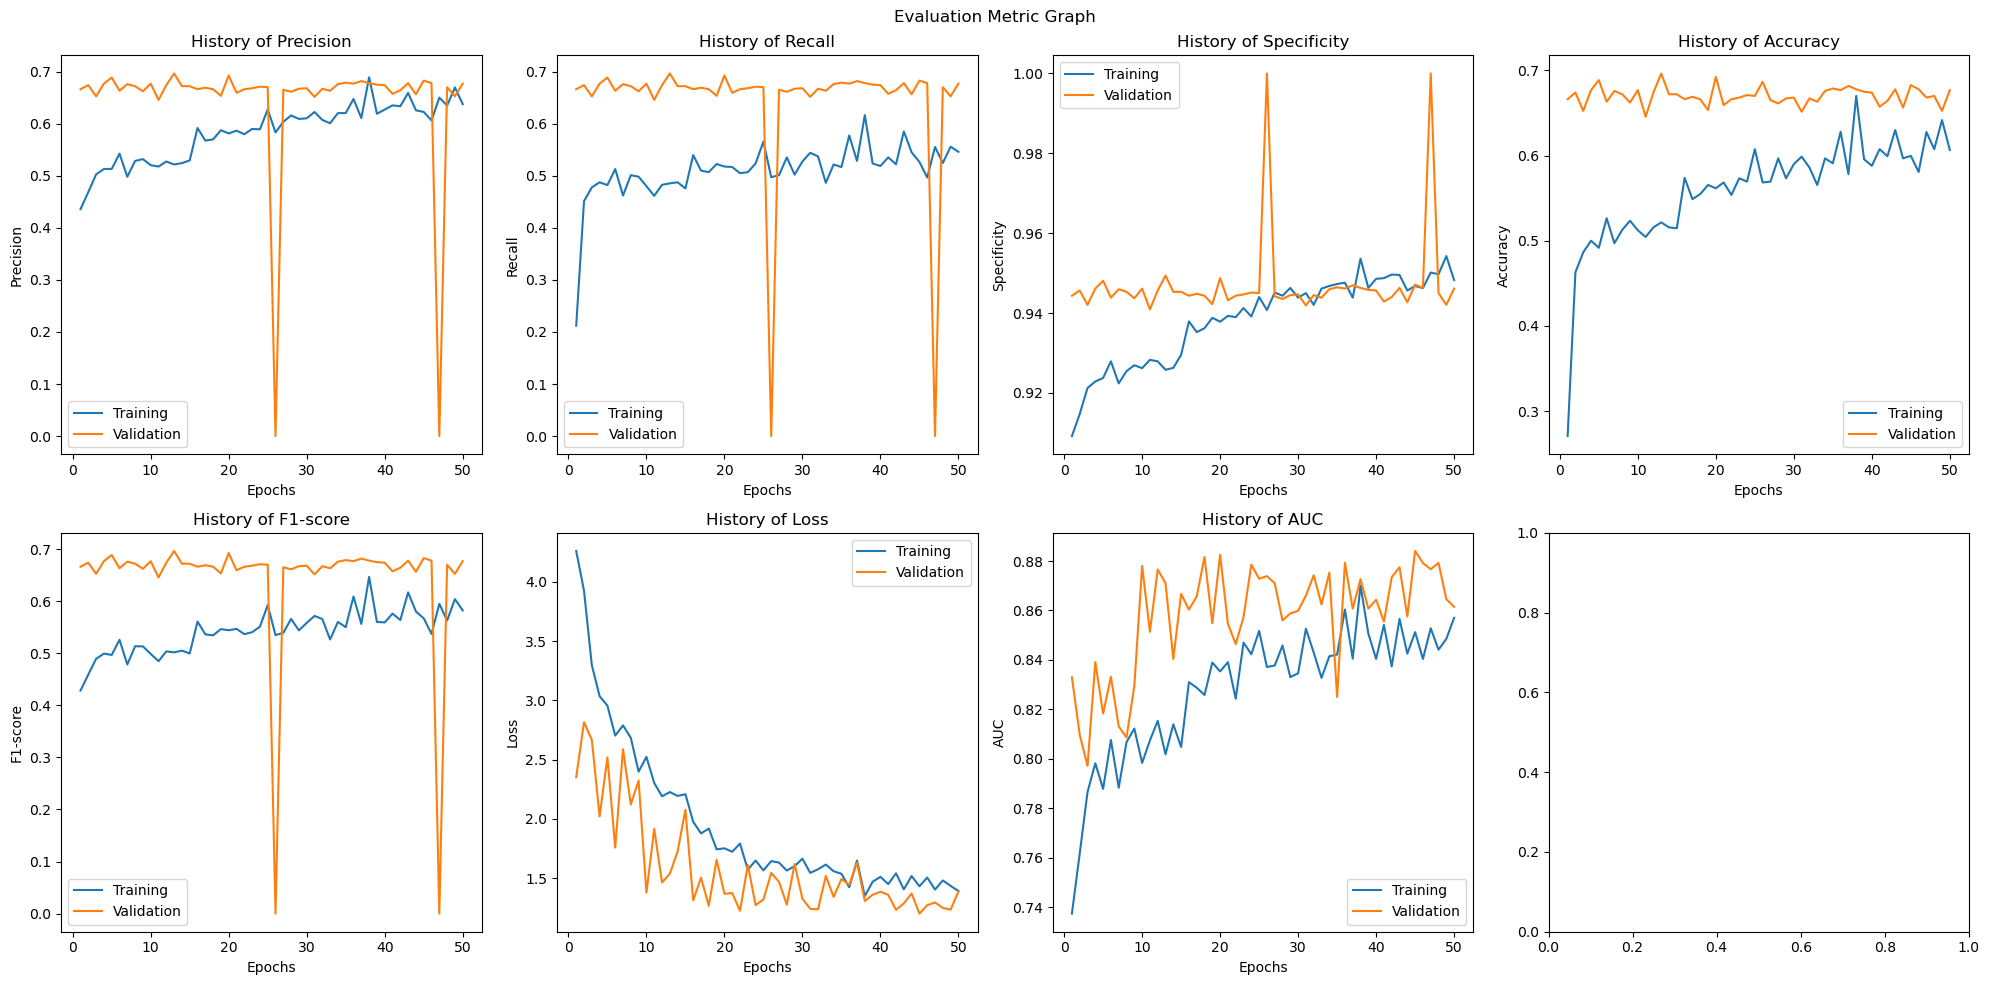

In [58]:
plot_history(history.history["precision"],history.history["val_precision"],
             history.history["recall"],history.history["val_recall"],
             history.history["specificity"],history.history["val_specificity"],
             history.history["accuracy"],history.history["val_accuracy"],
             history.history["loss"],history.history["val_loss"],
             history.history["auc"],history.history["val_auc"],
             history.history["F1_score"],history.history["val_F1_score"])

### Data Augmentation

In [58]:
aug_history = baseline_model.fit(
    aug_training_data,
    steps_per_epoch=size_batch,
    epochs=epochs,
    validation_data=aug_validation_data,
    validation_steps=size_batch,
    verbose=1,
    use_multiprocessing=False,
    workers=4,
)

Epoch 1/50
32/32 [==============================] - 39s 1s/step - loss: 1.3828 - precision: 0.6356 - recall: 0.5332 - accuracy: 0.6182 - auc: 0.8550 - F1_score: 0.5706 - specificity: 0.9491 - val_loss: 1.2443 - val_precision: 0.6455 - val_recall: 0.6455 - val_accuracy: 0.6455 - val_auc: 0.8684 - val_F1_score: 0.6455 - val_specificity: 0.9409
Epoch 2/50
32/32 [==============================] - 39s 1s/step - loss: 1.3982 - precision: 0.6740 - recall: 0.5654 - accuracy: 0.6377 - auc: 0.8526 - F1_score: 0.6067 - specificity: 0.9544 - val_loss: 1.2417 - val_precision: 0.6484 - val_recall: 0.6484 - val_accuracy: 0.6484 - val_auc: 0.8762 - val_F1_score: 0.6484 - val_specificity: 0.9414
Epoch 3/50
32/32 [==============================] - 39s 1s/step - loss: 1.4589 - precision: 0.6201 - recall: 0.5117 - accuracy: 0.5928 - auc: 0.8427 - F1_score: 0.5541 - specificity: 0.9478 - val_loss: 1.4115 - val_precision: 0.6543 - val_recall: 0.6543 - val_accuracy: 0.6543 - val_auc: 0.8121 - val_F1_score: 0

Epoch 25/50
32/32 [==============================] - 39s 1s/step - loss: 1.4531 - precision: 0.6055 - recall: 0.4932 - accuracy: 0.5869 - auc: 0.8451 - F1_score: 0.5284 - specificity: 0.9465 - val_loss: 1.1272 - val_precision: 0.6797 - val_recall: 0.6797 - val_accuracy: 0.6797 - val_auc: 0.8775 - val_F1_score: 0.6797 - val_specificity: 0.9466
Epoch 26/50
32/32 [==============================] - 39s 1s/step - loss: 1.3760 - precision: 0.6557 - recall: 0.5859 - accuracy: 0.6475 - auc: 0.8555 - F1_score: 0.6159 - specificity: 0.9487 - val_loss: 1.1904 - val_precision: 0.6738 - val_recall: 0.6738 - val_accuracy: 0.6738 - val_auc: 0.8810 - val_F1_score: 0.6738 - val_specificity: 0.9456
Epoch 27/50
32/32 [==============================] - 39s 1s/step - loss: 1.3219 - precision: 0.6647 - recall: 0.5537 - accuracy: 0.6543 - auc: 0.8612 - F1_score: 0.5969 - specificity: 0.9535 - val_loss: 1.2023 - val_precision: 0.6680 - val_recall: 0.6680 - val_accuracy: 0.6680 - val_auc: 0.8750 - val_F1_score

Epoch 49/50
32/32 [==============================] - 39s 1s/step - loss: 1.5173 - precision: 0.6105 - recall: 0.4990 - accuracy: 0.5840 - auc: 0.8419 - F1_score: 0.5336 - specificity: 0.9469 - val_loss: 1.3206 - val_precision: 0.6689 - val_recall: 0.6689 - val_accuracy: 0.6689 - val_auc: 0.8727 - val_F1_score: 0.6689 - val_specificity: 0.9448
Epoch 50/50
32/32 [==============================] - 39s 1s/step - loss: 1.3787 - precision: 0.6814 - recall: 0.5728 - accuracy: 0.6500 - auc: 0.8578 - F1_score: 0.6086 - specificity: 0.9553 - val_loss: 1.2064 - val_precision: 0.6875 - val_recall: 0.6875 - val_accuracy: 0.6875 - val_auc: 0.8816 - val_F1_score: 0.6875 - val_specificity: 0.9479


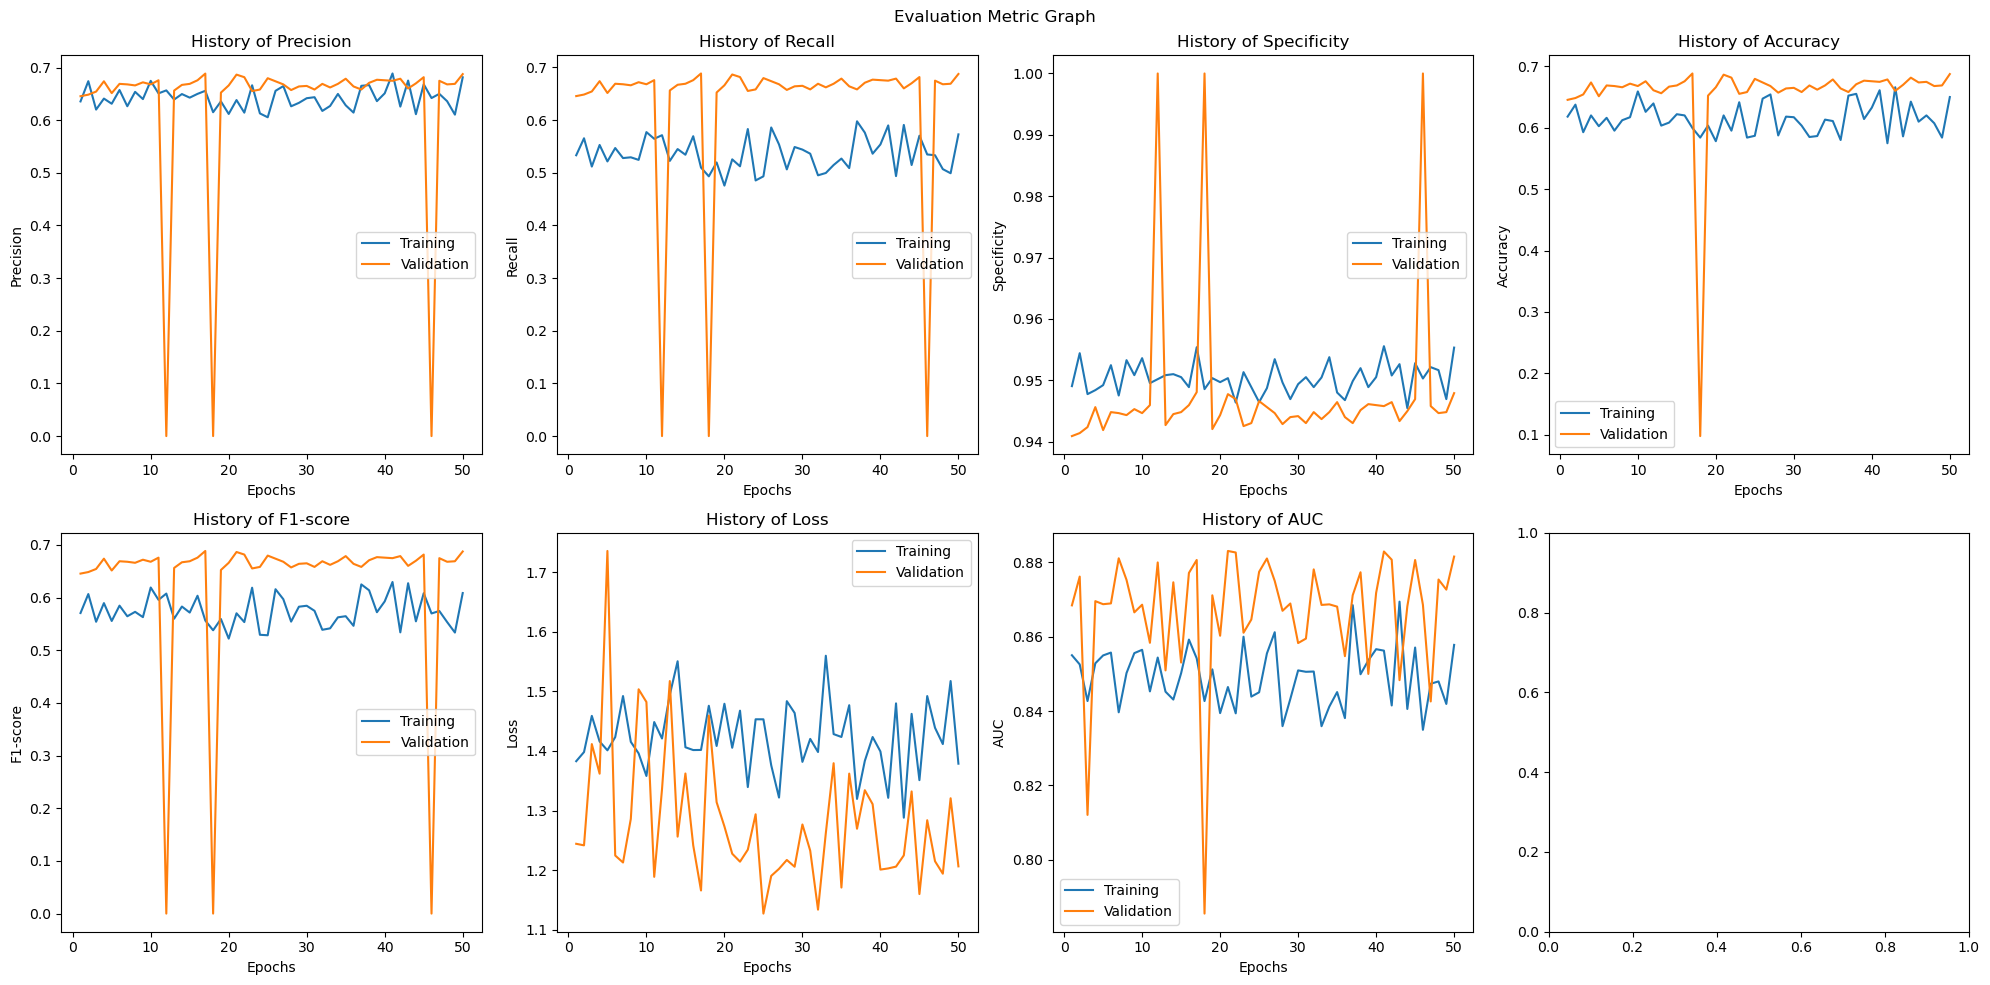

In [59]:
plot_history(aug_history.history["precision"],aug_history.history["val_precision"],
             aug_history.history["recall"],aug_history.history["val_recall"],
             aug_history.history["specificity"],aug_history.history["val_specificity"],
             aug_history.history["accuracy"],aug_history.history["val_accuracy"],
             aug_history.history["loss"],aug_history.history["val_loss"],
             aug_history.history["auc"],aug_history.history["val_auc"],
             aug_history.history["F1_score"],aug_history.history["val_F1_score"])

## Evaluate model performance on test data

In [60]:
# returns loss value and metrics value for the model on test data
eval_scores = baseline_model.evaluate(test_data)

32/32 [==============================] - 19s 584ms/step - loss: 1.2784 - precision: 0.6657 - recall: 0.6657 - accuracy: 0.6657 - auc: 0.8713 - F1_score: 0.6631 - specificity: 0.9438


In [19]:
n_classes = ["class_AKIEC", "class_BCC", "class_BKL", "class_DF", "class_MEL", "class_NV", "class_VASC"]

In [20]:
y_true = test_data.classes

In [36]:
baseline_y_ = baseline_model.predict(test_data)
baseline_y_pred = baseline_y_.argmax(axis=-1)

32/32 [==============================] - 20s 582ms/step


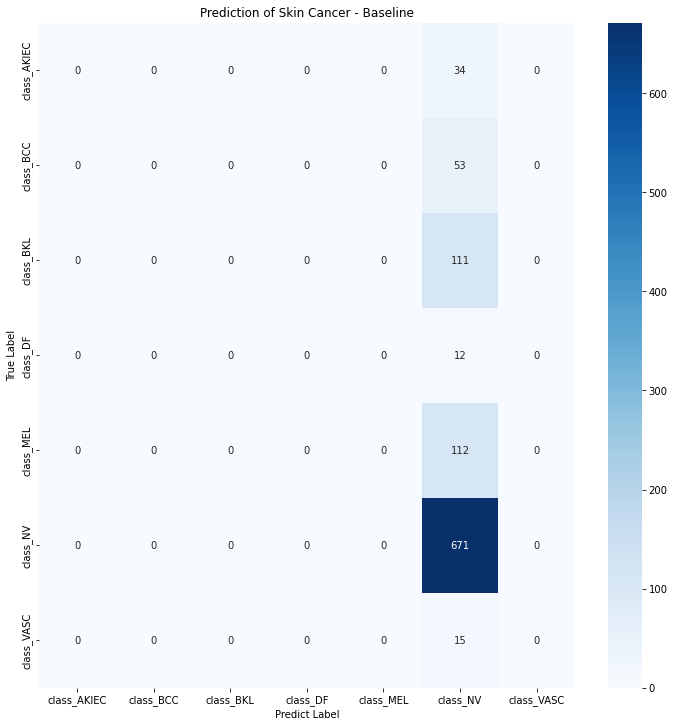

In [38]:
baseline_cm = confusion_matrix(y_true, baseline_y_pred)
plt.figure(figsize=(12, 12), dpi=72, edgecolor='k')
ax = sns.heatmap(baseline_cm, cmap="Blues", annot=True, fmt="d", xticklabels=n_classes, yticklabels=n_classes)
plt.title("Prediction of Skin Cancer - Baseline")
plt.xlabel("Predict Label")
plt.ylabel("True Label")
plt.show(ax)

### Baseline Model Conclusions
The non augmented data shows an improvement in most metrics over time while the augmented data shows higher overall scores throughout the training process. However, the augmented data validation set's graphs shows multiple large fluctuations and a loss score that is low but does not improve much over time. The augmented data is not working well with the baseline.
<br>
As such, I will be attempting to try again with a class weighted B0(baseline with class weights) and compare the performance. This will determine if we will stick to augmented or unaugmented data.


# EfficientNetB0 to B7 with class weights

## New Data Loading function

As every EfficientNet model has different input sizes, it becomes necessary to change the size of data to match the input size. To do so more efficiently, I have coded a mass_data_loader function that will perform the data generation into the correct size and return the generated data.

In [18]:
def mass_data_loader(class_num,target_size,size_batch,epochs,SEED):
    # not augmented data
    training_data = reg_data_gen.flow_from_directory(directory=r"C:\Users\User\Downloads\FYP\dataset\train",
                                                 target_size = target_size,
                                                 class_mode = 'categorical',
                                                 batch_size = size_batch,
                                                 seed=SEED)
    validation_data = reg_data_gen.flow_from_directory(directory=r"C:\Users\User\Downloads\FYP\dataset\val",
                                                 target_size = target_size,
                                                 class_mode = 'categorical',
                                                 batch_size = size_batch,
                                                 seed=SEED)
    test_data = reg_data_gen.flow_from_directory(directory=r"C:\Users\User\Downloads\FYP\dataset\test",
                                                 target_size = target_size,
                                                 class_mode = 'categorical',
                                                 batch_size = size_batch,
                                                 seed=SEED)
    
    # augmented data
    aug_training_data = aug_data_gen.flow_from_directory(directory=r"C:\Users\User\Downloads\FYP\dataset\train",
                                                 target_size = target_size,
                                                 class_mode = 'categorical',
                                                 batch_size = size_batch,
                                                 seed=SEED)
    aug_validation_data = reg_data_gen.flow_from_directory(directory=r"C:\Users\User\Downloads\FYP\dataset\val",
                                                 target_size = target_size,
                                                 class_mode = 'categorical',
                                                 batch_size = size_batch,
                                                 seed=SEED)
    aug_test_data = reg_data_gen.flow_from_directory(directory=r"C:\Users\User\Downloads\FYP\dataset\test",
                                                 target_size = target_size,
                                                 class_mode = 'categorical',
                                                 batch_size = size_batch,
                                                 seed=SEED)
    return training_data,validation_data,test_data,aug_training_data,aug_validation_data,aug_test_data
    
training_data,validation_data,test_data,aug_training_data,aug_validation_data,aug_test_data = mass_data_loader(class_num,
                                                                                                               target_size,
                                                                                                               size_batch,
                                                                                                               epochs,
                                                                                                               SEED)

Found 7007 images belonging to 7 classes.
Found 2000 images belonging to 7 classes.
Found 1008 images belonging to 7 classes.
Found 7007 images belonging to 7 classes.
Found 2000 images belonging to 7 classes.
Found 1008 images belonging to 7 classes.


# EfficientNetB0 with Unaugmented and Augmented Data

In [22]:
# define parameters
class_num = 7
target_size = (224,224)
size_batch = 32
epochs = 50

In [23]:
training_data,validation_data,test_data,aug_training_data,aug_validation_data,aug_test_data = mass_data_loader(class_num,
                                                                                                               target_size,
                                                                                                               size_batch,
                                                                                                               epochs,
                                                                                                               SEED)

Found 7007 images belonging to 7 classes.
Found 2000 images belonging to 7 classes.
Found 1008 images belonging to 7 classes.
Found 7007 images belonging to 7 classes.
Found 2000 images belonging to 7 classes.
Found 1008 images belonging to 7 classes.


In [24]:
# building the model
input_shape = (224, 224, 3)
b0_conv_base = EfficientNetB0(weights="imagenet", include_top=False, input_shape=input_shape)
b0_model = models.Sequential()
b0_model.add(b0_conv_base)
b0_model.add(layers.GlobalMaxPooling2D(name="gap"))
#avoid overfitting
b0_model.add(layers.Dropout(rate=0.5, name="dropout_out"))
b0_model.add(layers.Dense(class_num, activation="softmax", name="fc_out"))
b0_conv_base.trainable = False

In [25]:
# summary of EfficientNetB0 model
b0_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 7, 7, 1280)        4049571   
 )                                                               
                                                                 
 gap (GlobalMaxPooling2D)    (None, 1280)              0         
                                                                 
 dropout_out (Dropout)       (None, 1280)              0         
                                                                 
 fc_out (Dense)              (None, 7)                 8967      
                                                                 
Total params: 4058538 (15.48 MB)
Trainable params: 8967 (35.03 KB)
Non-trainable params: 4049571 (15.45 MB)
_________________________________________________________________


In [26]:
b0_model.compile(optimizer="adam", loss="categorical_crossentropy",metrics=eval_metrics)

### No Data Augmentation

In [27]:
history = b0_model.fit(
    training_data,
    class_weight = train_class_weights,
    steps_per_epoch=size_batch,
    epochs=epochs,
    validation_data=validation_data,
    validation_steps=size_batch,
    verbose=1,
    use_multiprocessing=False,
    workers=4,
    shuffle=True
)

Epoch 1/50
32/32 [==============================] - 46s 1s/step - loss: 9.1192 - precision: 0.1746 - recall: 0.1611 - accuracy: 0.1738 - auc: 0.5372 - F1_score: 0.1678 - specificity: 0.8730 - val_loss: 4.1181 - val_precision: 0.1309 - val_recall: 0.1309 - val_accuracy: 0.1309 - val_auc: 0.4857 - val_F1_score: 0.1309 - val_specificity: 0.8551
Epoch 2/50
32/32 [==============================] - 38s 1s/step - loss: 6.4934 - precision: 0.1297 - recall: 0.1143 - accuracy: 0.1328 - auc: 0.4892 - F1_score: 0.1213 - specificity: 0.8722 - val_loss: 2.0085 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_accuracy: 0.0127 - val_auc: 0.6648 - val_F1_score: 0.0000e+00 - val_specificity: 1.0000
Epoch 3/50
32/32 [==============================] - 38s 1s/step - loss: 5.4634 - precision: 0.1658 - recall: 0.1475 - accuracy: 0.1621 - auc: 0.5322 - F1_score: 0.1557 - specificity: 0.8763 - val_loss: 2.8644 - val_precision: 0.0103 - val_recall: 0.0039 - val_accuracy: 0.0127 - val_auc: 0.4479 - val

32/32 [==============================] - 39s 1s/step - loss: 4.0280 - precision: 0.0679 - recall: 0.0400 - accuracy: 0.0908 - auc: 0.5485 - F1_score: 0.0492 - specificity: 0.9084 - val_loss: 2.1796 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_accuracy: 0.1123 - val_auc: 0.6480 - val_F1_score: 0.0000e+00 - val_specificity: 1.0000
Epoch 48/50
32/32 [==============================] - 39s 1s/step - loss: 3.1185 - precision: 0.1300 - recall: 0.0664 - accuracy: 0.1523 - auc: 0.5788 - F1_score: 0.0884 - specificity: 0.9259 - val_loss: 1.8590 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_accuracy: 0.0107 - val_auc: 0.6295 - val_F1_score: 0.0000e+00 - val_specificity: 1.0000
Epoch 49/50
32/32 [==============================] - 38s 1s/step - loss: 3.5503 - precision: 0.1076 - recall: 0.0566 - accuracy: 0.1377 - auc: 0.5536 - F1_score: 0.0753 - specificity: 0.9217 - val_loss: 1.5651 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_accuracy: 0.1094 - val_auc: 0

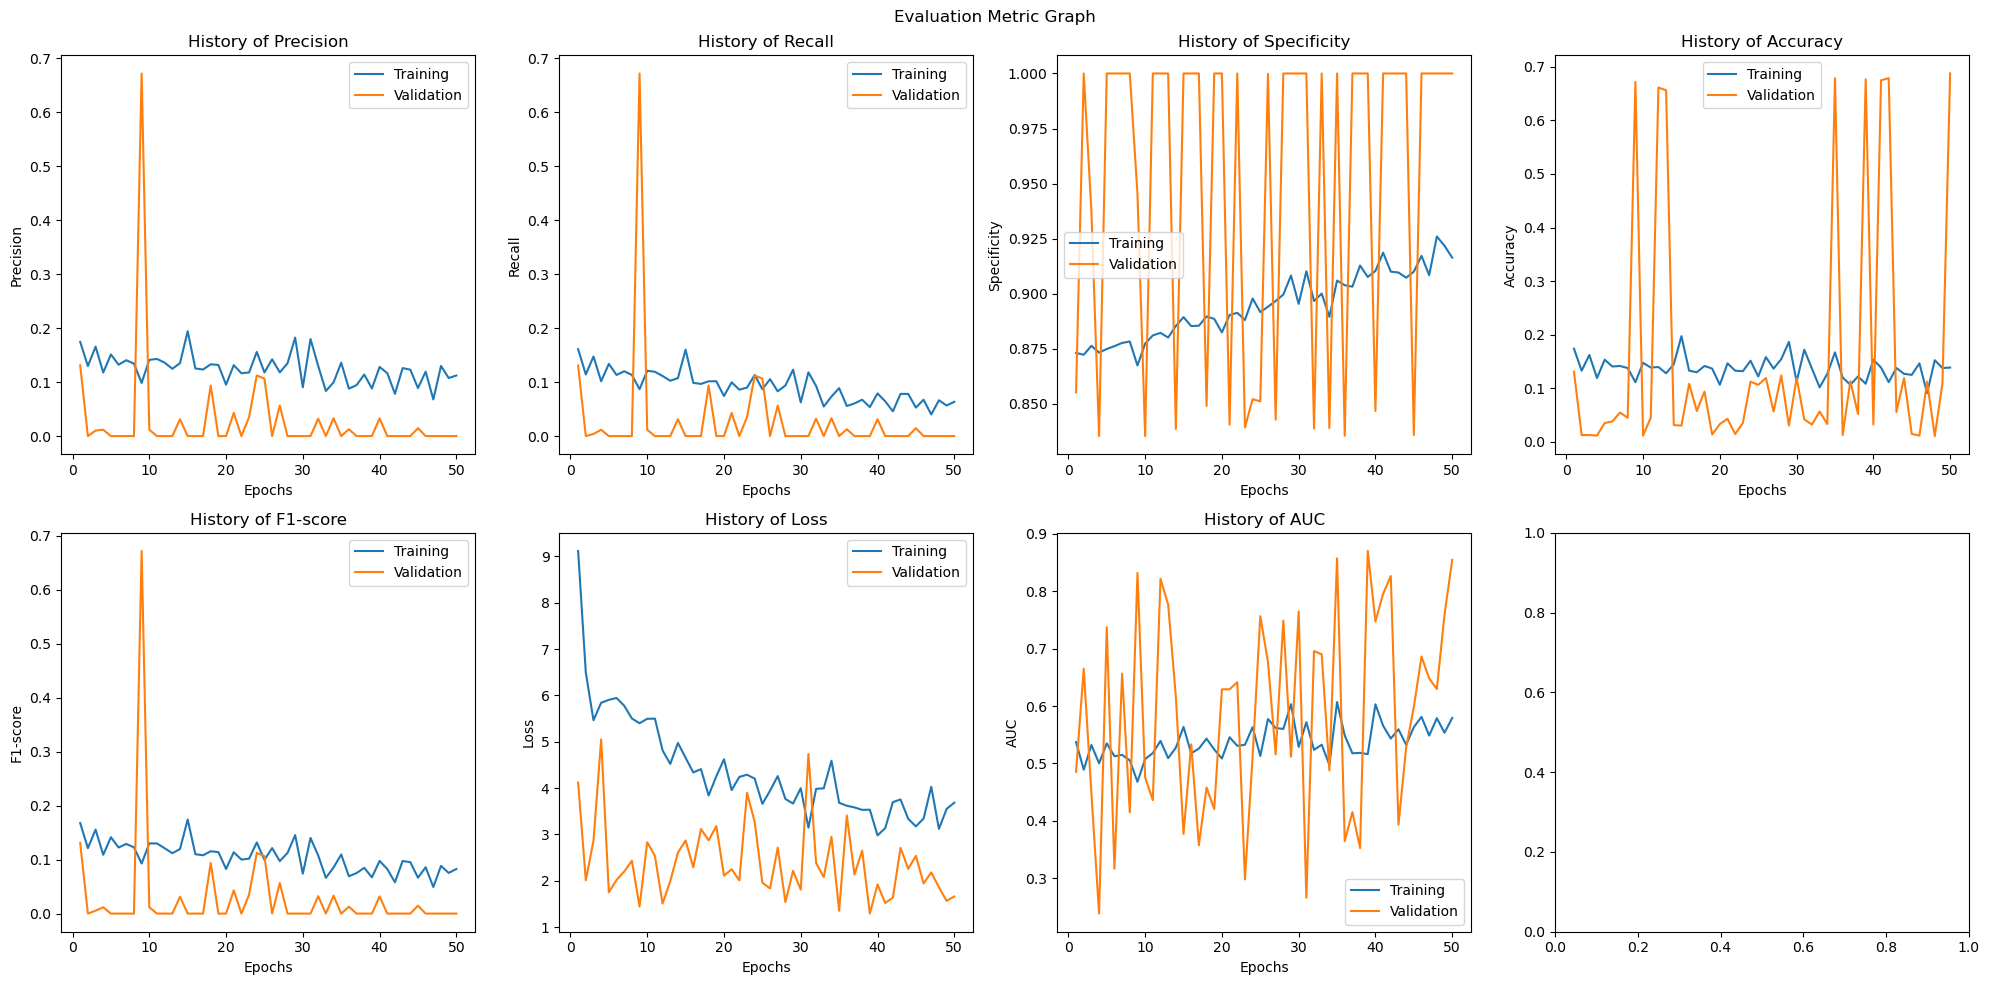

In [28]:
plot_history(history.history["precision"],history.history["val_precision"],
             history.history["recall"],history.history["val_recall"],
             history.history["specificity"],history.history["val_specificity"],
             history.history["accuracy"],history.history["val_accuracy"],
             history.history["loss"],history.history["val_loss"],
             history.history["auc"],history.history["val_auc"],
             history.history["F1_score"],history.history["val_F1_score"])

### Data Augmentation

In [32]:
aug_history = b0_model.fit(
    aug_training_data,
    class_weight = aug_train_class_weights,
    steps_per_epoch=size_batch,
    epochs=epochs,
    validation_data=aug_validation_data,
    validation_steps=size_batch,
    verbose=1,
    use_multiprocessing=False,
    workers=4,
    shuffle=True
)

Epoch 1/50
32/32 [==============================] - 41s 1s/step - loss: 3.4239 - precision: 0.0707 - recall: 0.0400 - accuracy: 0.0879 - auc: 0.5142 - F1_score: 0.0516 - specificity: 0.9123 - val_loss: 2.9291 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_accuracy: 0.1299 - val_auc: 0.4165 - val_F1_score: 0.0000e+00 - val_specificity: 1.0000
Epoch 2/50
32/32 [==============================] - 40s 1s/step - loss: 3.2651 - precision: 0.1002 - recall: 0.0508 - accuracy: 0.1309 - auc: 0.5603 - F1_score: 0.0682 - specificity: 0.9240 - val_loss: 2.0872 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_accuracy: 0.0127 - val_auc: 0.6046 - val_F1_score: 0.0000e+00 - val_specificity: 1.0000
Epoch 3/50
32/32 [==============================] - 40s 1s/step - loss: 3.3402 - precision: 0.1009 - recall: 0.0537 - accuracy: 0.1445 - auc: 0.5352 - F1_score: 0.0700 - specificity: 0.9202 - val_loss: 1.4908 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_accuracy: 0.6543 - v

32/32 [==============================] - 39s 1s/step - loss: 3.2416 - precision: 0.0914 - recall: 0.0469 - accuracy: 0.1309 - auc: 0.5666 - F1_score: 0.0621 - specificity: 0.9224 - val_loss: 2.2387 - val_precision: 0.0275 - val_recall: 0.0049 - val_accuracy: 0.0107 - val_auc: 0.6856 - val_F1_score: 0.0084 - val_specificity: 0.9712
Epoch 48/50
32/32 [==============================] - 39s 1s/step - loss: 2.9459 - precision: 0.1187 - recall: 0.0596 - accuracy: 0.1514 - auc: 0.5701 - F1_score: 0.0768 - specificity: 0.9263 - val_loss: 1.9812 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_accuracy: 0.1133 - val_auc: 0.6950 - val_F1_score: 0.0000e+00 - val_specificity: 1.0000
Epoch 49/50
32/32 [==============================] - 39s 1s/step - loss: 3.7266 - precision: 0.0995 - recall: 0.0566 - accuracy: 0.1211 - auc: 0.5558 - F1_score: 0.0714 - specificity: 0.9146 - val_loss: 2.3580 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_accuracy: 0.0107 - val_auc: 0.3688 - val_

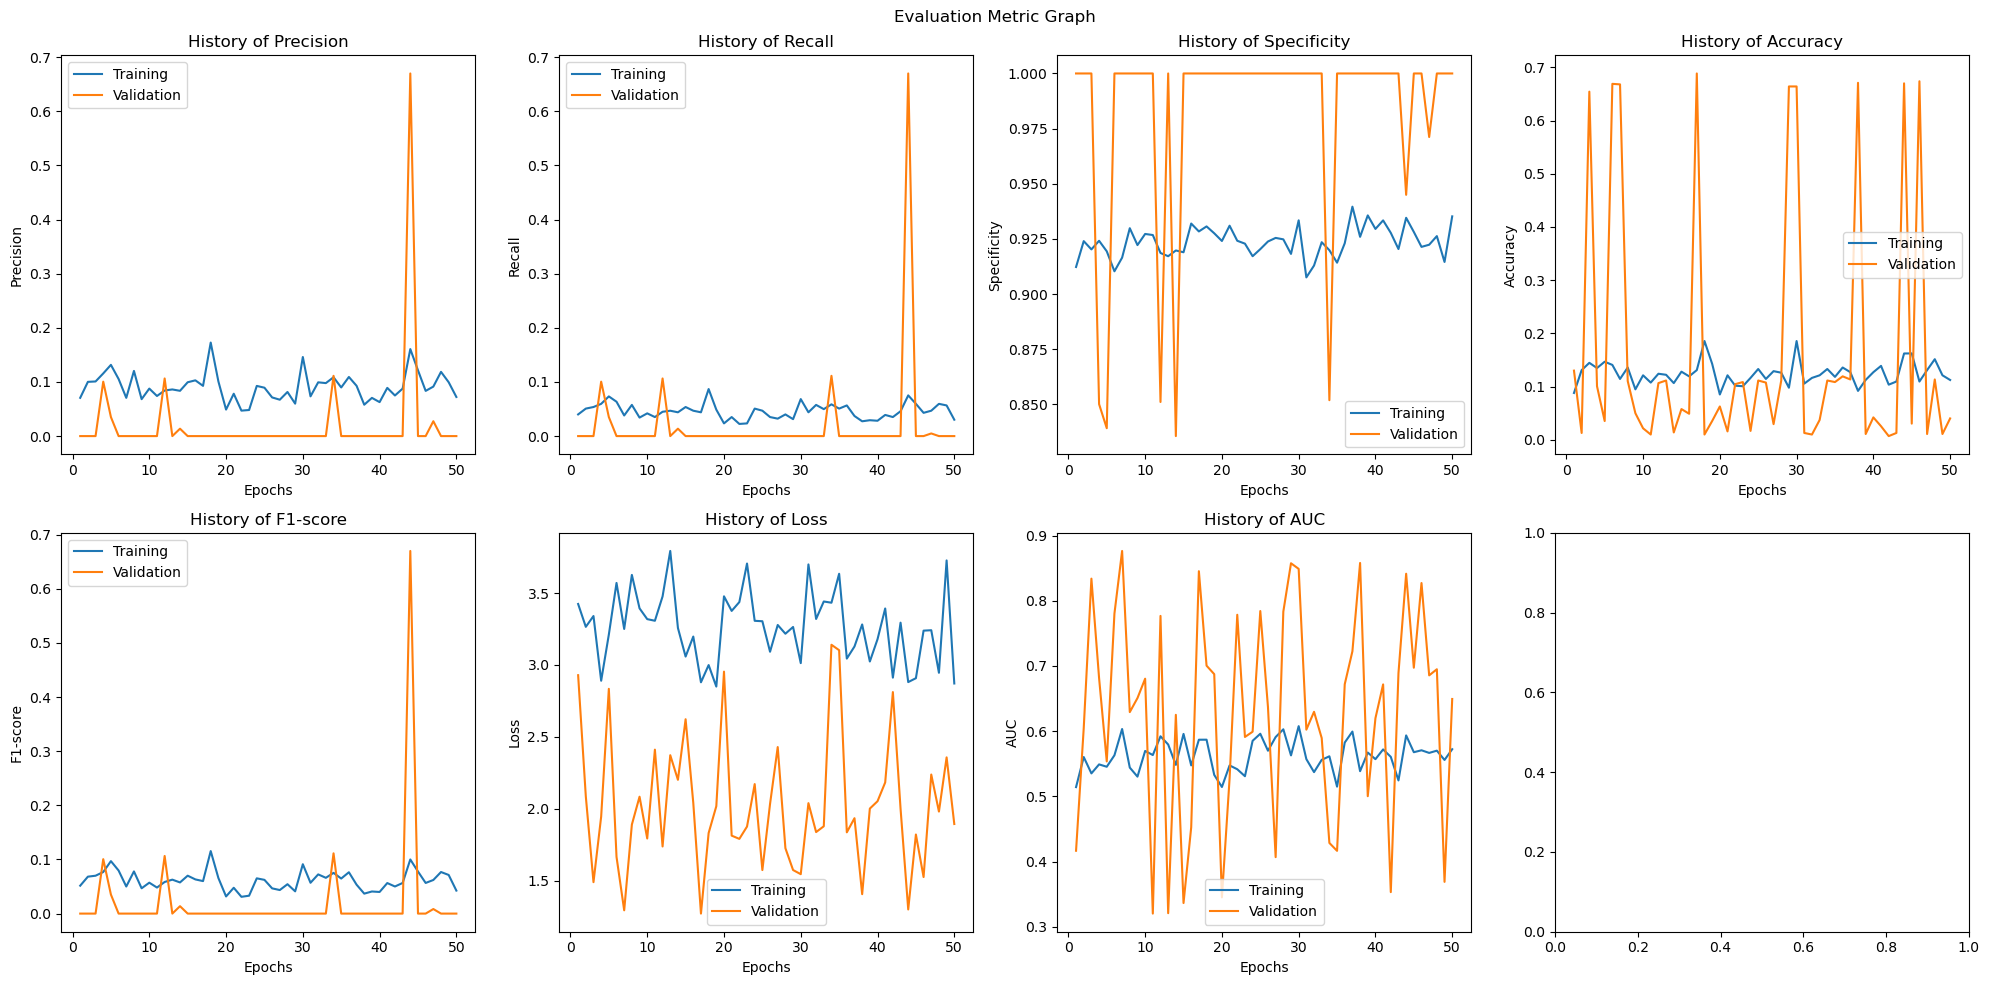

In [33]:
plot_history(aug_history.history["precision"],aug_history.history["val_precision"],
             aug_history.history["recall"],aug_history.history["val_recall"],
             aug_history.history["specificity"],aug_history.history["val_specificity"],
             aug_history.history["accuracy"],aug_history.history["val_accuracy"],
             aug_history.history["loss"],aug_history.history["val_loss"],
             aug_history.history["auc"],aug_history.history["val_auc"],
             aug_history.history["F1_score"],aug_history.history["val_F1_score"])

## Evaluate model performance on test data

In [34]:
# returns loss value and metrics value for the model on test data
b0_eval_scores = b0_model.evaluate(test_data)

32/32 [==============================] - 19s 581ms/step - loss: 1.8977 - precision: 0.0000e+00 - recall: 0.0000e+00 - accuracy: 0.0526 - auc: 0.6516 - F1_score: 0.0000e+00 - specificity: 1.0000


In [35]:
b0_y_ = b0_model.predict(test_data)
b0_y_pred = b0_y_.argmax(axis=-1)

32/32 [==============================] - 19s 581ms/step


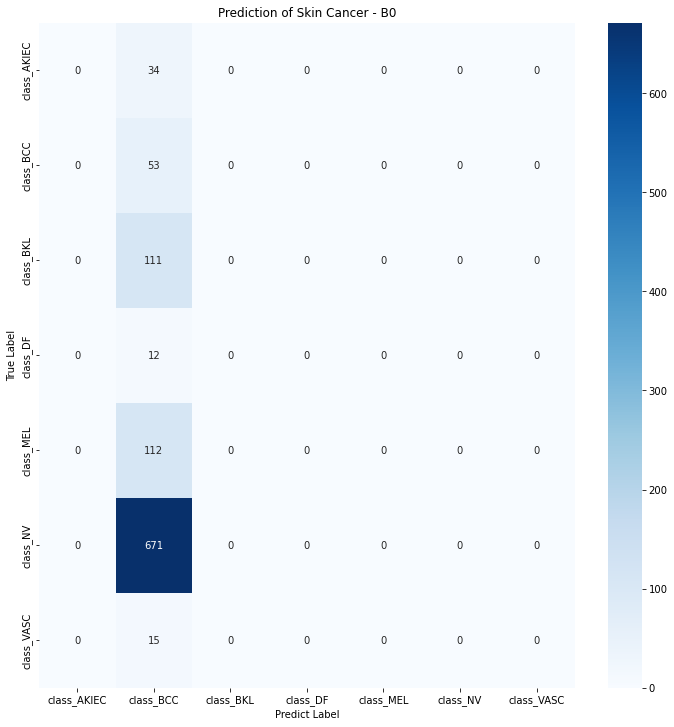

In [36]:
b0_cm = confusion_matrix(y_true, b0_y_pred)
plt.figure(figsize=(12, 12), dpi=72, edgecolor='k')
ax = sns.heatmap(b0_cm, cmap="Blues", annot=True, fmt="d", xticklabels=n_classes, yticklabels=n_classes)
plt.title("Prediction of Skin Cancer - B0")
plt.xlabel("Predict Label")
plt.ylabel("True Label")
plt.show(ax)

# EfficientNetB1

In [37]:
# define parameters
class_num = 7
target_size = (240,240)
size_batch = 32
epochs = 50

In [38]:
training_data,validation_data,test_data,aug_training_data,aug_validation_data,aug_test_data = mass_data_loader(class_num,
                                                                                                               target_size,
                                                                                                               size_batch,
                                                                                                               epochs,
                                                                                                               SEED)

Found 7007 images belonging to 7 classes.
Found 2000 images belonging to 7 classes.
Found 1008 images belonging to 7 classes.
Found 7007 images belonging to 7 classes.
Found 2000 images belonging to 7 classes.
Found 1008 images belonging to 7 classes.


In [39]:
# 7 classes: "class_AKIEC", "class_BCC", "class_BKL", "class_DF", "class_MEL", "class_NV", "class_VASC"
lesion_classes = ["class_AKIEC", "class_BCC", "class_BKL", "class_DF", "class_MEL", "class_NV", "class_VASC"]
# adding class attribute for classification to train, validation and test datasets: .lesion_classes
training_data.lesion_classes = lesion_classes
validation_data.lesion_classes = lesion_classes
test_data.lesion_classes = lesion_classes

In [40]:
# building the model
input_shape = (240, 240, 3)
conv_base_b1 = EfficientNetB1(weights="imagenet", include_top=False, input_shape=input_shape)
efn_b1_model = models.Sequential()
efn_b1_model.add(conv_base_b1)
efn_b1_model.add(layers.GlobalMaxPooling2D(name="gap"))
#avoid overfitting
efn_b1_model.add(layers.Dropout(rate=0.5, name="dropout_out"))
efn_b1_model.add(layers.Dense(class_num, activation="softmax", name="fc_out"))
conv_base_b1.trainable = False

In [41]:
# summary of EfficientNetB1 model
efn_b1_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb1 (Functional  (None, 8, 8, 1280)        6575239   
 )                                                               
                                                                 
 gap (GlobalMaxPooling2D)    (None, 1280)              0         
                                                                 
 dropout_out (Dropout)       (None, 1280)              0         
                                                                 
 fc_out (Dense)              (None, 7)                 8967      
                                                                 
Total params: 6584206 (25.12 MB)
Trainable params: 8967 (35.03 KB)
Non-trainable params: 6575239 (25.08 MB)
_________________________________________________________________


In [42]:
efn_b1_model.compile(optimizer="adam", loss="categorical_crossentropy",metrics=eval_metrics)

In [43]:
b1_history = efn_b1_model.fit(
    training_data,
    class_weight = train_class_weights,
    steps_per_epoch=size_batch,
    epochs=epochs,
    validation_data=validation_data,
    validation_steps=size_batch,
    verbose=1,
    use_multiprocessing=False,
    workers=4,
    shuffle=True
)

Epoch 1/50
32/32 [==============================] - 69s 2s/step - loss: 11.8024 - precision: 0.1730 - recall: 0.0832 - accuracy: 0.1152 - auc: 0.5752 - F1_score: 0.1687 - specificity: 0.8684 - val_loss: 9.9295 - val_precision: 0.0156 - val_recall: 0.0156 - val_accuracy: 0.0156 - val_auc: 0.4258 - val_F1_score: 0.0156 - val_specificity: 0.8359
Epoch 2/50
32/32 [==============================] - 61s 2s/step - loss: 10.8400 - precision: 0.1513 - recall: 0.1455 - accuracy: 0.1514 - auc: 0.5142 - F1_score: 0.1484 - specificity: 0.8639 - val_loss: 3.7942 - val_precision: 0.1211 - val_recall: 0.1211 - val_accuracy: 0.1211 - val_auc: 0.7097 - val_F1_score: 0.1211 - val_specificity: 0.8535
Epoch 3/50
32/32 [==============================] - 60s 2s/step - loss: 9.5776 - precision: 0.1346 - recall: 0.1279 - accuracy: 0.1328 - auc: 0.4935 - F1_score: 0.1314 - specificity: 0.8630 - val_loss: 3.1047 - val_precision: 0.1191 - val_recall: 0.1191 - val_accuracy: 0.1191 - val_auc: 0.7588 - val_F1_score:

32/32 [==============================] - 60s 2s/step - loss: 5.0738 - precision: 0.1286 - recall: 0.1085 - accuracy: 0.1339 - auc: 0.5554 - F1_score: 0.1185 - specificity: 0.8775 - val_loss: 1.3521 - val_precision: 0.6748 - val_recall: 0.6748 - val_accuracy: 0.6748 - val_auc: 0.8105 - val_F1_score: 0.6748 - val_specificity: 0.9458
Epoch 48/50
32/32 [==============================] - 60s 2s/step - loss: 5.0194 - precision: 0.1459 - recall: 0.1201 - accuracy: 0.1543 - auc: 0.5233 - F1_score: 0.1328 - specificity: 0.8828 - val_loss: 1.5514 - val_precision: 0.6680 - val_recall: 0.6680 - val_accuracy: 0.6680 - val_auc: 0.8611 - val_F1_score: 0.6680 - val_specificity: 0.9447
Epoch 49/50
32/32 [==============================] - 60s 2s/step - loss: 5.6491 - precision: 0.1401 - recall: 0.1152 - accuracy: 0.1367 - auc: 0.4899 - F1_score: 0.1257 - specificity: 0.8822 - val_loss: 1.7634 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_accuracy: 0.6689 - val_auc: 0.7894 - val_F1_score: 0.

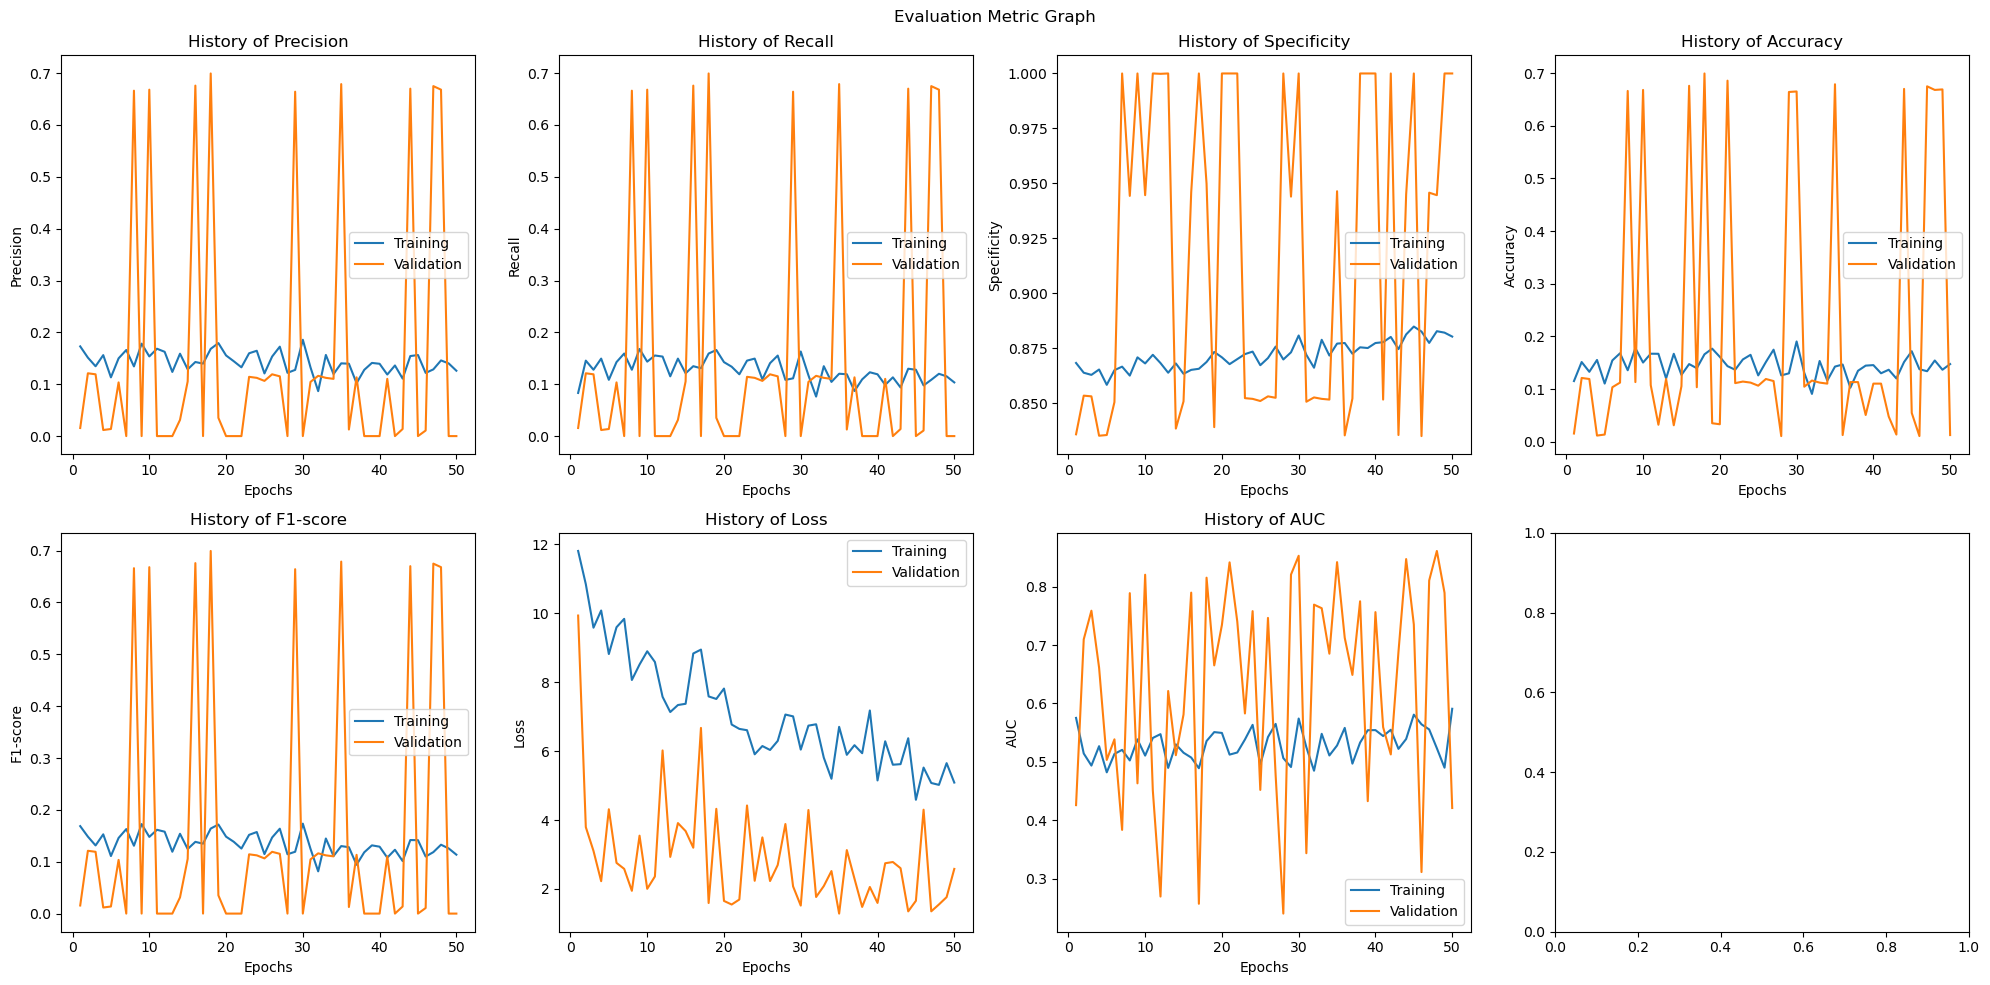

In [44]:
plot_history(b1_history.history["precision"],b1_history.history["val_precision"],
             b1_history.history["recall"],b1_history.history["val_recall"],
             b1_history.history["specificity"],b1_history.history["val_specificity"],
             b1_history.history["accuracy"],b1_history.history["val_accuracy"],
             b1_history.history["loss"],b1_history.history["val_loss"],
             b1_history.history["auc"],b1_history.history["val_auc"],
             b1_history.history["F1_score"],b1_history.history["val_F1_score"])

## Evaluate model performance on test data

In [45]:
# returns loss value and metrics value for the model on test data
eval_scores = efn_b1_model.evaluate(test_data)

32/32 [==============================] - 29s 915ms/step - loss: 2.6095 - precision: 0.0000e+00 - recall: 0.0000e+00 - accuracy: 0.0119 - auc: 0.4196 - F1_score: 0.0000e+00 - specificity: 1.0000


In [46]:
b1_y_ = efn_b1_model.predict(test_data)
b1_y_pred = b1_y_.argmax(axis=-1)

32/32 [==============================] - 31s 911ms/step


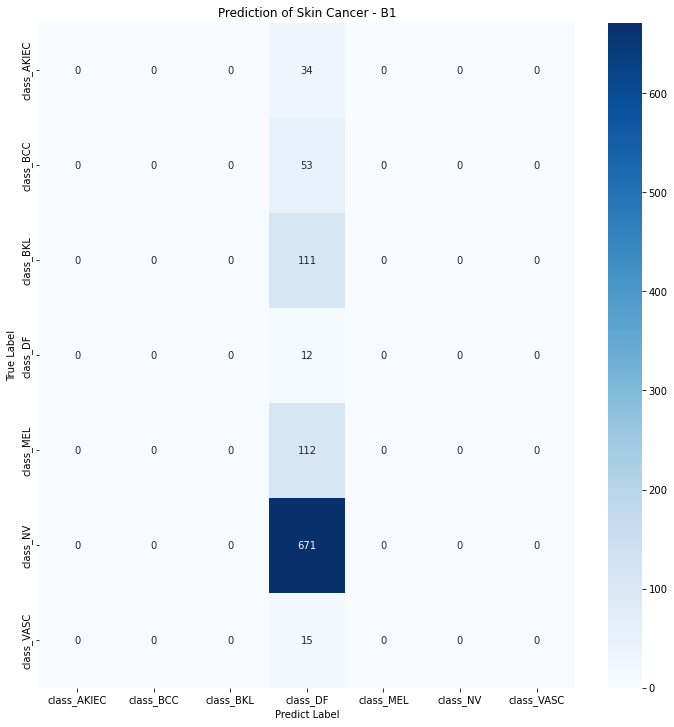

In [47]:
b1_cm = confusion_matrix(y_true, b1_y_pred)
plt.figure(figsize=(12, 12), dpi=72, edgecolor='k')
ax = sns.heatmap(b1_cm, cmap="Blues", annot=True, fmt="d", xticklabels=n_classes, yticklabels=n_classes)
plt.title("Prediction of Skin Cancer - B1")
plt.xlabel("Predict Label")
plt.ylabel("True Label")
plt.show(ax)

# EfficientNetB2

In [48]:
# define parameters
class_num = 7
target_size = (260,260)
size_batch = 32
epochs = 50

In [49]:
training_data,validation_data,test_data,aug_training_data,aug_validation_data,aug_test_data = mass_data_loader(class_num,
                                                                                                               target_size,
                                                                                                               size_batch,
                                                                                                               epochs,
                                                                                                               SEED)

Found 7007 images belonging to 7 classes.
Found 2000 images belonging to 7 classes.
Found 1008 images belonging to 7 classes.
Found 7007 images belonging to 7 classes.
Found 2000 images belonging to 7 classes.
Found 1008 images belonging to 7 classes.


In [50]:
# 7 classes: "class_AKIEC", "class_BCC", "class_BKL", "class_DF", "class_MEL", "class_NV", "class_VASC"
lesion_classes = ["class_AKIEC", "class_BCC", "class_BKL", "class_DF", "class_MEL", "class_NV", "class_VASC"]
# adding class attribute for classification to train, validation and test datasets: .lesion_classes
training_data.lesion_classes = lesion_classes
validation_data.lesion_classes = lesion_classes
test_data.lesion_classes = lesion_classes

In [51]:
# building the model
input_shape = (260, 260, 3)
conv_base_b2 = EfficientNetB2(weights="imagenet", include_top=False, input_shape=input_shape)
efn_b2_model = models.Sequential()
efn_b2_model.add(conv_base_b2)
efn_b2_model.add(layers.GlobalMaxPooling2D(name="gap"))
#avoid overfitting
efn_b2_model.add(layers.Dropout(rate=0.5, name="dropout_out"))
efn_b2_model.add(layers.Dense(class_num, activation="softmax", name="fc_out"))
conv_base_b2.trainable = False

In [52]:
# summary of EfficientNetB1 model
efn_b2_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional  (None, 9, 9, 1408)        7768569   
 )                                                               
                                                                 
 gap (GlobalMaxPooling2D)    (None, 1408)              0         
                                                                 
 dropout_out (Dropout)       (None, 1408)              0         
                                                                 
 fc_out (Dense)              (None, 7)                 9863      
                                                                 
Total params: 7778432 (29.67 MB)
Trainable params: 9863 (38.53 KB)
Non-trainable params: 7768569 (29.63 MB)
_________________________________________________________________


In [53]:
efn_b2_model.compile(optimizer="adam", loss="categorical_crossentropy",metrics=eval_metrics)

In [54]:
b2_history = efn_b2_model.fit(
    training_data,
    class_weight = train_class_weights,
    steps_per_epoch=size_batch,
    epochs=epochs,
    validation_data=validation_data,
    validation_steps=size_batch,
    verbose=1,
    use_multiprocessing=False,
    workers=4,
    shuffle=True
)

Epoch 1/50
32/32 [==============================] - 86s 2s/step - loss: 20.0394 - precision: 0.1292 - recall: 0.0645 - accuracy: 0.0719 - auc: 0.4893 - F1_score: 0.1288 - specificity: 0.8563 - val_loss: 11.9333 - val_precision: 0.0156 - val_recall: 0.0156 - val_accuracy: 0.0156 - val_auc: 0.3431 - val_F1_score: 0.0156 - val_specificity: 0.8359
Epoch 2/50
32/32 [==============================] - 77s 2s/step - loss: 17.3505 - precision: 0.1340 - recall: 0.1328 - accuracy: 0.1348 - auc: 0.4913 - F1_score: 0.1330 - specificity: 0.8569 - val_loss: 14.1952 - val_precision: 0.0127 - val_recall: 0.0127 - val_accuracy: 0.0127 - val_auc: 0.3043 - val_F1_score: 0.0127 - val_specificity: 0.8354
Epoch 3/50
32/32 [==============================] - 77s 2s/step - loss: 18.4772 - precision: 0.1052 - recall: 0.1035 - accuracy: 0.1074 - auc: 0.4761 - F1_score: 0.1044 - specificity: 0.8532 - val_loss: 5.7522 - val_precision: 0.0767 - val_recall: 0.0654 - val_accuracy: 0.0703 - val_auc: 0.4105 - val_F1_sco

Epoch 25/50
32/32 [==============================] - 76s 2s/step - loss: 12.1108 - precision: 0.1420 - recall: 0.1367 - accuracy: 0.1475 - auc: 0.5036 - F1_score: 0.1393 - specificity: 0.8623 - val_loss: 2.5962 - val_precision: 0.1064 - val_recall: 0.1064 - val_accuracy: 0.1064 - val_auc: 0.5740 - val_F1_score: 0.1064 - val_specificity: 0.8511
Epoch 26/50
32/32 [==============================] - 77s 2s/step - loss: 10.8458 - precision: 0.1364 - recall: 0.1318 - accuracy: 0.1357 - auc: 0.5181 - F1_score: 0.1343 - specificity: 0.8608 - val_loss: 2.5386 - val_precision: 0.6738 - val_recall: 0.6738 - val_accuracy: 0.6738 - val_auc: 0.8023 - val_F1_score: 0.6738 - val_specificity: 0.9456
Epoch 27/50
32/32 [==============================] - 77s 2s/step - loss: 10.6597 - precision: 0.1408 - recall: 0.1348 - accuracy: 0.1377 - auc: 0.5080 - F1_score: 0.1378 - specificity: 0.8630 - val_loss: 9.7668 - val_precision: 0.0117 - val_recall: 0.0117 - val_accuracy: 0.0117 - val_auc: 0.3988 - val_F1_sc

Epoch 49/50
32/32 [==============================] - 77s 2s/step - loss: 10.2829 - precision: 0.1346 - recall: 0.1281 - accuracy: 0.1320 - auc: 0.5257 - F1_score: 0.1309 - specificity: 0.8628 - val_loss: 6.3630 - val_precision: 0.1097 - val_recall: 0.1094 - val_accuracy: 0.1094 - val_auc: 0.3148 - val_F1_score: 0.1095 - val_specificity: 0.8521
Epoch 50/50
32/32 [==============================] - 77s 2s/step - loss: 8.3354 - precision: 0.1369 - recall: 0.1261 - accuracy: 0.1359 - auc: 0.5111 - F1_score: 0.1322 - specificity: 0.8675 - val_loss: 7.1186 - val_precision: 0.0127 - val_recall: 0.0127 - val_accuracy: 0.0127 - val_auc: 0.3393 - val_F1_score: 0.0127 - val_specificity: 0.8354


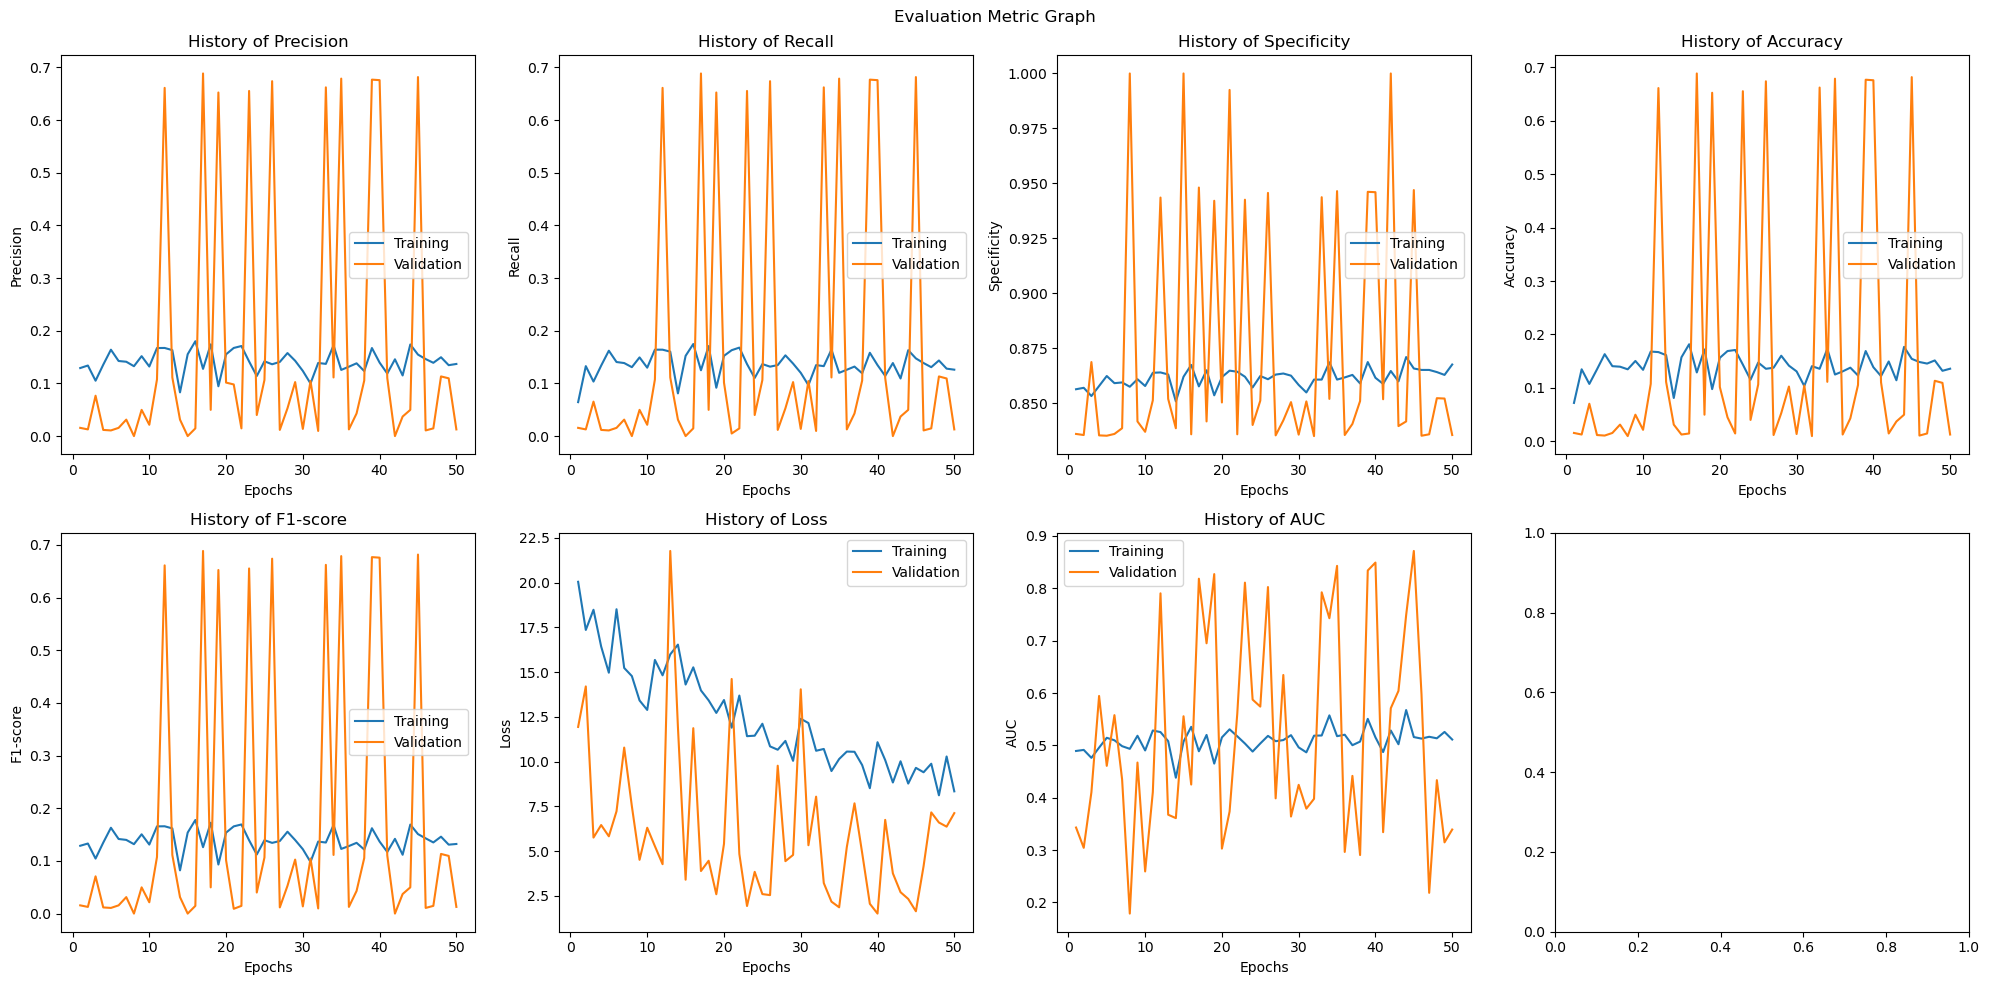

In [55]:
plot_history(b2_history.history["precision"],b2_history.history["val_precision"],
             b2_history.history["recall"],b2_history.history["val_recall"],
             b2_history.history["specificity"],b2_history.history["val_specificity"],
             b2_history.history["accuracy"],b2_history.history["val_accuracy"],
             b2_history.history["loss"],b2_history.history["val_loss"],
             b2_history.history["auc"],b2_history.history["val_auc"],
             b2_history.history["F1_score"],b2_history.history["val_F1_score"])

## Evaluate model performance on test data

In [56]:
# returns loss value and metrics value for the model on test data
eval_scores = efn_b2_model.evaluate(test_data)

32/32 [==============================] - 38s 1s/step - loss: 7.1129 - precision: 0.0119 - recall: 0.0119 - accuracy: 0.0119 - auc: 0.3385 - F1_score: 0.0117 - specificity: 0.8353


In [57]:
b2_y_ = efn_b2_model.predict(test_data)
b2_y_pred = b2_y_.argmax(axis=-1)

32/32 [==============================] - 39s 1s/step


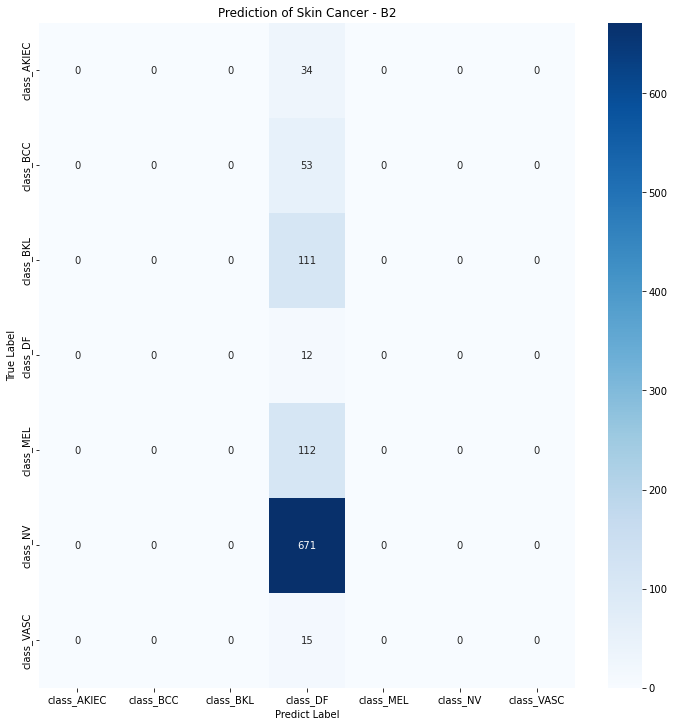

In [58]:
b2_cm = confusion_matrix(y_true, b2_y_pred)
plt.figure(figsize=(12, 12), dpi=72, edgecolor='k')
ax = sns.heatmap(b2_cm, cmap="Blues", annot=True, fmt="d", xticklabels=n_classes, yticklabels=n_classes)
plt.title("Prediction of Skin Cancer - B2")
plt.xlabel("Predict Label")
plt.ylabel("True Label")
plt.show(ax)

# EfficientNetB3

In [59]:
# define parameters
class_num = 7
target_size = (300,300)
size_batch = 32
epochs = 50

In [60]:
training_data,validation_data,test_data,aug_training_data,aug_validation_data,aug_test_data = mass_data_loader(class_num,
                                                                                                               target_size,
                                                                                                               size_batch,
                                                                                                               epochs,
                                                                                                               SEED)

Found 7007 images belonging to 7 classes.
Found 2000 images belonging to 7 classes.
Found 1008 images belonging to 7 classes.
Found 7007 images belonging to 7 classes.
Found 2000 images belonging to 7 classes.
Found 1008 images belonging to 7 classes.


In [61]:
# 7 classes: "class_AKIEC", "class_BCC", "class_BKL", "class_DF", "class_MEL", "class_NV", "class_VASC"
lesion_classes = ["class_AKIEC", "class_BCC", "class_BKL", "class_DF", "class_MEL", "class_NV", "class_VASC"]
# adding class attribute for classification to train, validation and test datasets: .lesion_classes
training_data.lesion_classes = lesion_classes
validation_data.lesion_classes = lesion_classes
test_data.lesion_classes = lesion_classes

In [62]:
# building the model
input_shape = (300, 300, 3)
conv_base_b3 = EfficientNetB3(weights="imagenet", include_top=False, input_shape=input_shape)
efn_b3_model = models.Sequential()
efn_b3_model.add(conv_base_b3)
efn_b3_model.add(layers.GlobalMaxPooling2D(name="gap"))
#avoid overfitting
efn_b3_model.add(layers.Dropout(rate=0.5, name="dropout_out"))
efn_b3_model.add(layers.Dense(class_num, activation="softmax", name="fc_out"))
conv_base_b3.trainable = False

In [63]:
# summary of EfficientNetB1 model
efn_b3_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional  (None, 10, 10, 1536)      10783535  
 )                                                               
                                                                 
 gap (GlobalMaxPooling2D)    (None, 1536)              0         
                                                                 
 dropout_out (Dropout)       (None, 1536)              0         
                                                                 
 fc_out (Dense)              (None, 7)                 10759     
                                                                 
Total params: 10794294 (41.18 MB)
Trainable params: 10759 (42.03 KB)
Non-trainable params: 10783535 (41.14 MB)
_________________________________________________________________


In [65]:
efn_b3_model.compile(optimizer="adam", loss="categorical_crossentropy",metrics=eval_metrics)

In [67]:
b3_history = efn_b3_model.fit(
    training_data,
    class_weight = train_class_weights,
    steps_per_epoch=size_batch,
    epochs=epochs,
    validation_data=validation_data,
    validation_steps=size_batch,
    verbose=1,
    use_multiprocessing=False,
    workers=4,
    shuffle=True
)

Epoch 1/50
32/32 [==============================] - 136s 4s/step - loss: 25.6694 - precision: 0.1287 - recall: 0.1279 - accuracy: 0.1289 - auc: 0.4884 - F1_score: 0.1284 - specificity: 0.8556 - val_loss: 6.3708 - val_precision: 0.1299 - val_recall: 0.1299 - val_accuracy: 0.1299 - val_auc: 0.4308 - val_F1_score: 0.1299 - val_specificity: 0.8550
Epoch 2/50
32/32 [==============================] - 130s 4s/step - loss: 21.3971 - precision: 0.1994 - recall: 0.1973 - accuracy: 0.1973 - auc: 0.5390 - F1_score: 0.1985 - specificity: 0.8680 - val_loss: 5.1479 - val_precision: 0.0128 - val_recall: 0.0127 - val_accuracy: 0.0127 - val_auc: 0.6213 - val_F1_score: 0.0127 - val_specificity: 0.8363
Epoch 3/50
32/32 [==============================] - 129s 4s/step - loss: 24.0439 - precision: 0.1392 - recall: 0.1377 - accuracy: 0.1387 - auc: 0.4950 - F1_score: 0.1386 - specificity: 0.8581 - val_loss: 11.4436 - val_precision: 0.2500 - val_recall: 0.0020 - val_accuracy: 0.0557 - val_auc: 0.2801 - val_F1_s

Epoch 25/50
32/32 [==============================] - 129s 4s/step - loss: 15.4269 - precision: 0.1586 - recall: 0.1564 - accuracy: 0.1584 - auc: 0.5216 - F1_score: 0.1575 - specificity: 0.8617 - val_loss: 8.1625 - val_precision: 0.0273 - val_recall: 0.0273 - val_accuracy: 0.0273 - val_auc: 0.3566 - val_F1_score: 0.0273 - val_specificity: 0.8379
Epoch 26/50
32/32 [==============================] - 129s 4s/step - loss: 13.7606 - precision: 0.1548 - recall: 0.1523 - accuracy: 0.1553 - auc: 0.5086 - F1_score: 0.1535 - specificity: 0.8613 - val_loss: 9.9938 - val_precision: 0.0117 - val_recall: 0.0117 - val_accuracy: 0.0117 - val_auc: 0.4235 - val_F1_score: 0.0117 - val_specificity: 0.8353
Epoch 27/50
32/32 [==============================] - 129s 4s/step - loss: 17.5856 - precision: 0.1558 - recall: 0.1533 - accuracy: 0.1582 - auc: 0.5199 - F1_score: 0.1545 - specificity: 0.8615 - val_loss: 1.6126 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_accuracy: 0.6611 - val_auc: 0.8600 

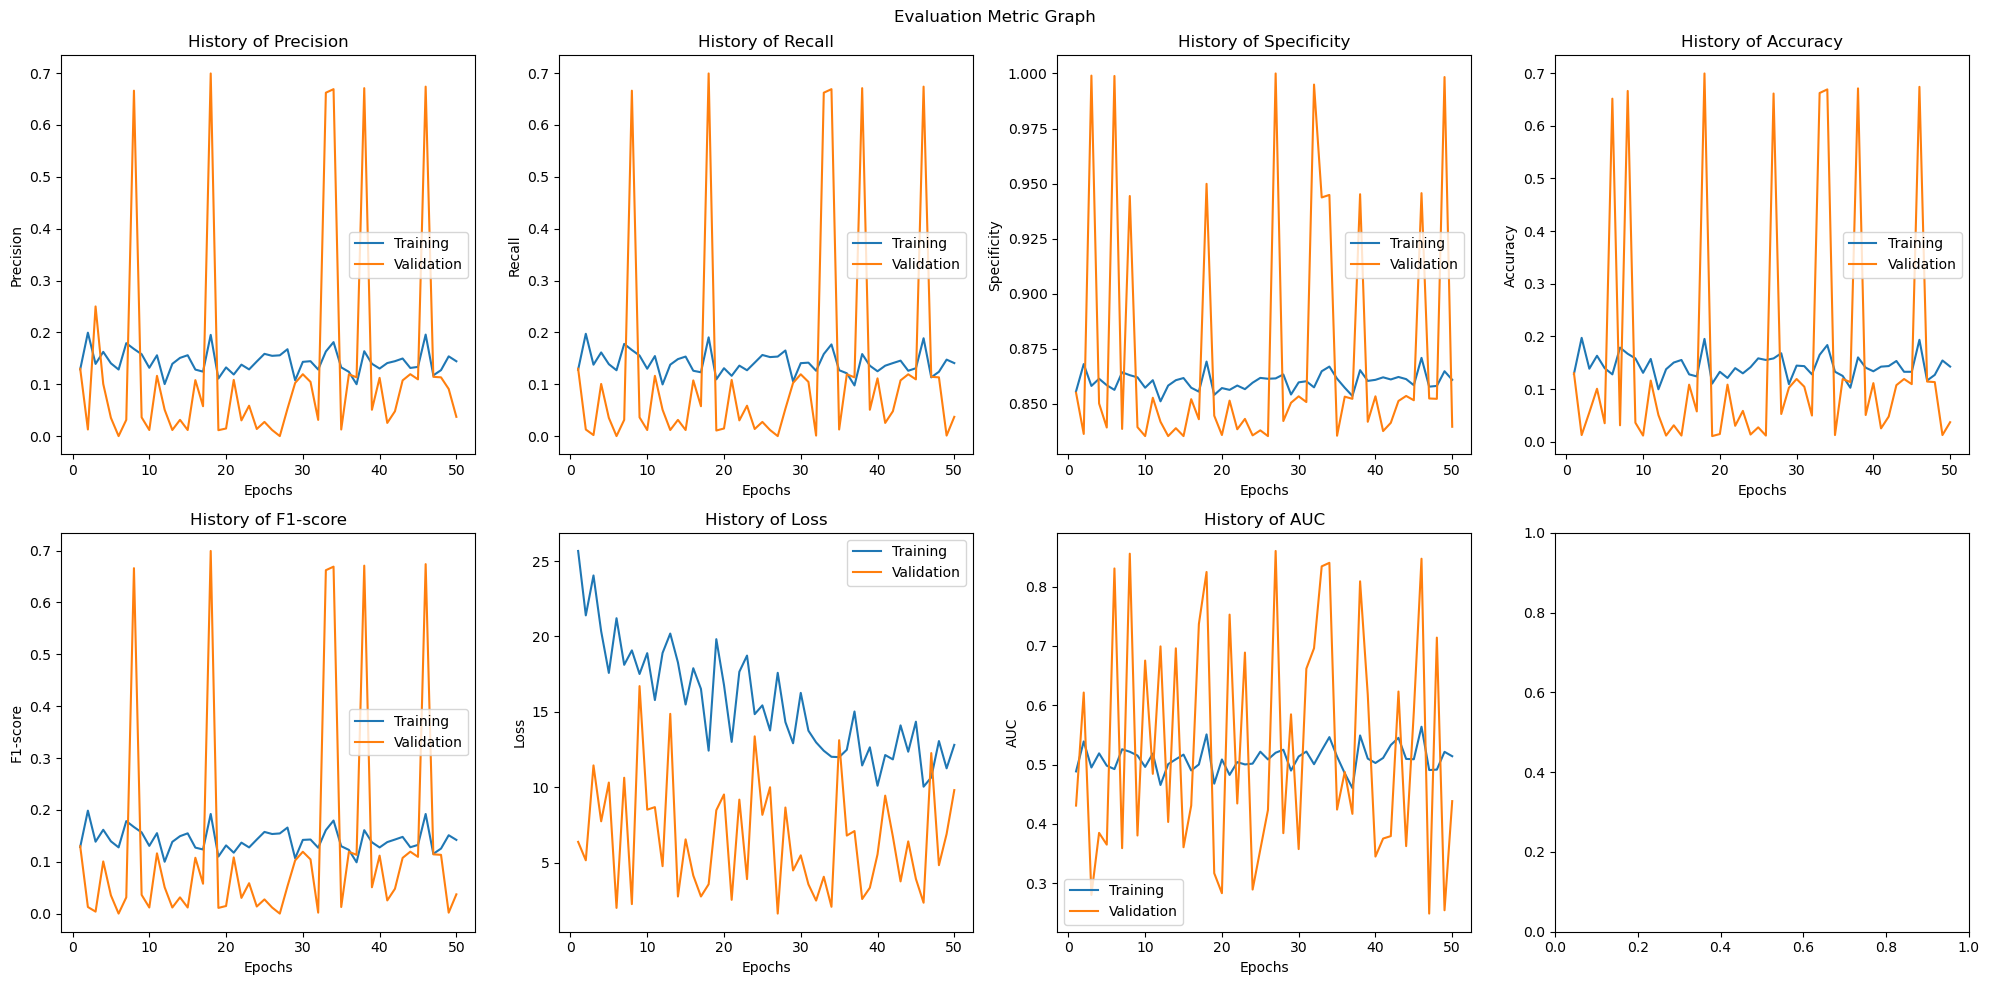

In [68]:
plot_history(b3_history.history["precision"],b3_history.history["val_precision"],
             b3_history.history["recall"],b3_history.history["val_recall"],
             b3_history.history["specificity"],b3_history.history["val_specificity"],
             b3_history.history["accuracy"],b3_history.history["val_accuracy"],
             b3_history.history["loss"],b3_history.history["val_loss"],
             b3_history.history["auc"],b3_history.history["val_auc"],
             b3_history.history["F1_score"],b3_history.history["val_F1_score"])

## Evaluate model performance on test data

In [69]:
# returns loss value and metrics value for the model on test data
eval_scores = efn_b3_model.evaluate(test_data)

32/32 [==============================] - 63s 2s/step - loss: 9.8809 - precision: 0.0337 - recall: 0.0337 - accuracy: 0.0337 - auc: 0.4363 - F1_score: 0.0342 - specificity: 0.8390


In [70]:
b3_y_ = efn_b3_model.predict(test_data)
b3_y_pred = b3_y_.argmax(axis=-1)

32/32 [==============================] - 65s 2s/step


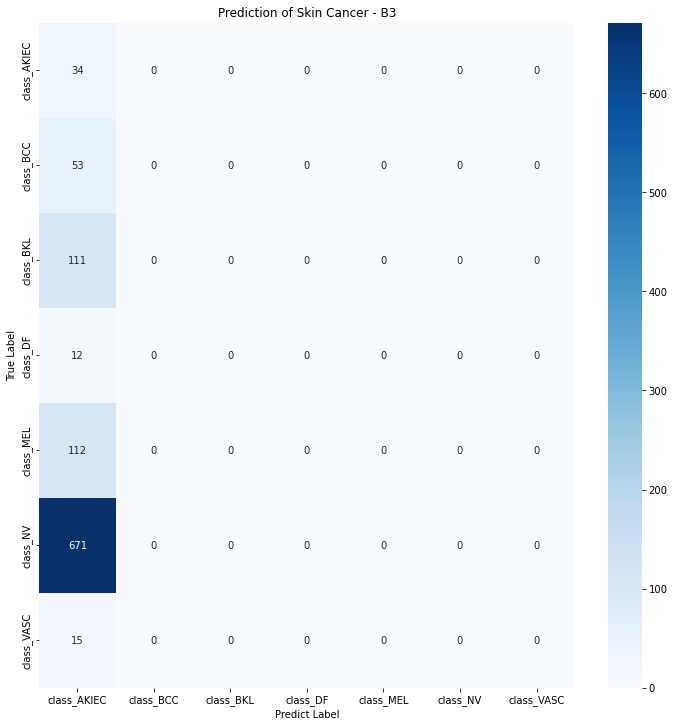

In [71]:
b3_cm = confusion_matrix(y_true, b3_y_pred)
plt.figure(figsize=(12, 12), dpi=72, edgecolor='k')
ax = sns.heatmap(b3_cm, cmap="Blues", annot=True, fmt="d", xticklabels=n_classes, yticklabels=n_classes)
plt.title("Prediction of Skin Cancer - B3")
plt.xlabel("Predict Label")
plt.ylabel("True Label")
plt.show(ax)

# EfficientNetB4

In [72]:
# define parameters
class_num = 7
target_size = (380,380)
size_batch = 32
epochs = 50

In [73]:
training_data,validation_data,test_data,aug_training_data,aug_validation_data,aug_test_data = mass_data_loader(class_num,
                                                                                                               target_size,
                                                                                                               size_batch,
                                                                                                               epochs,
                                                                                                               SEED)

Found 7007 images belonging to 7 classes.
Found 2000 images belonging to 7 classes.
Found 1008 images belonging to 7 classes.
Found 7007 images belonging to 7 classes.
Found 2000 images belonging to 7 classes.
Found 1008 images belonging to 7 classes.


In [74]:
# 7 classes: "class_AKIEC", "class_BCC", "class_BKL", "class_DF", "class_MEL", "class_NV", "class_VASC"
lesion_classes = ["class_AKIEC", "class_BCC", "class_BKL", "class_DF", "class_MEL", "class_NV", "class_VASC"]
# adding class attribute for classification to train, validation and test datasets: .lesion_classes
training_data.lesion_classes = lesion_classes
validation_data.lesion_classes = lesion_classes
test_data.lesion_classes = lesion_classes

In [75]:
# building the model
input_shape = (380, 380, 3)
conv_base_b4 = EfficientNetB4(weights="imagenet", include_top=False, input_shape=input_shape)
efn_b4_model = models.Sequential()
efn_b4_model.add(conv_base_b4)
efn_b4_model.add(layers.GlobalMaxPooling2D(name="gap"))
#avoid overfitting
efn_b4_model.add(layers.Dropout(rate=0.5, name="dropout_out"))
efn_b4_model.add(layers.Dense(class_num, activation="softmax", name="fc_out"))
conv_base_b4.trainable = False

In [76]:
# summary of EfficientNetB1 model
efn_b4_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb4 (Functional  (None, 12, 12, 1792)      17673823  
 )                                                               
                                                                 
 gap (GlobalMaxPooling2D)    (None, 1792)              0         
                                                                 
 dropout_out (Dropout)       (None, 1792)              0         
                                                                 
 fc_out (Dense)              (None, 7)                 12551     
                                                                 
Total params: 17686374 (67.47 MB)
Trainable params: 12551 (49.03 KB)
Non-trainable params: 17673823 (67.42 MB)
_________________________________________________________________


In [77]:
efn_b4_model.compile(optimizer="adam", loss="categorical_crossentropy",metrics=eval_metrics)

In [78]:
b4_history = efn_b4_model.fit(
    training_data,
    class_weight = train_class_weights,
    steps_per_epoch=size_batch,
    epochs=epochs,
    validation_data=validation_data,
    validation_steps=size_batch,
    verbose=1,
    use_multiprocessing=False,
    workers=4,
    shuffle=True
)

Epoch 1/50
32/32 [==============================] - 281s 9s/step - loss: 13.4846 - precision: 0.0847 - recall: 0.0837 - accuracy: 0.0861 - auc: 0.4650 - F1_score: 0.1343 - specificity: 0.8595 - val_loss: 6.8608 - val_precision: 0.1309 - val_recall: 0.1309 - val_accuracy: 0.1309 - val_auc: 0.4439 - val_F1_score: 0.1309 - val_specificity: 0.8551
Epoch 2/50
32/32 [==============================] - 267s 8s/step - loss: 14.4907 - precision: 0.1343 - recall: 0.1320 - accuracy: 0.1339 - auc: 0.5150 - F1_score: 0.1338 - specificity: 0.8582 - val_loss: 4.8944 - val_precision: 0.0557 - val_recall: 0.0557 - val_accuracy: 0.0557 - val_auc: 0.6315 - val_F1_score: 0.0557 - val_specificity: 0.8426
Epoch 3/50
32/32 [==============================] - 267s 8s/step - loss: 12.5840 - precision: 0.1239 - recall: 0.1202 - accuracy: 0.1251 - auc: 0.4889 - F1_score: 0.1223 - specificity: 0.8583 - val_loss: 6.0494 - val_precision: 0.1191 - val_recall: 0.1191 - val_accuracy: 0.1191 - val_auc: 0.4862 - val_F1_sc

Epoch 48/50
32/32 [==============================] - 267s 8s/step - loss: 9.5287 - precision: 0.1196 - recall: 0.1104 - accuracy: 0.1182 - auc: 0.4988 - F1_score: 0.1152 - specificity: 0.8646 - val_loss: 9.5224 - val_precision: 0.1133 - val_recall: 0.1133 - val_accuracy: 0.1133 - val_auc: 0.3763 - val_F1_score: 0.1133 - val_specificity: 0.8522
Epoch 49/50
32/32 [==============================] - 267s 8s/step - loss: 8.4704 - precision: 0.1221 - recall: 0.1123 - accuracy: 0.1309 - auc: 0.4997 - F1_score: 0.1172 - specificity: 0.8654 - val_loss: 1.4109 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_accuracy: 0.1172 - val_auc: 0.7742 - val_F1_score: 0.0000e+00 - val_specificity: 1.0000
Epoch 50/50
32/32 [==============================] - 267s 8s/step - loss: 8.5637 - precision: 0.1572 - recall: 0.1455 - accuracy: 0.1572 - auc: 0.5536 - F1_score: 0.1509 - specificity: 0.8700 - val_loss: 4.7404 - val_precision: 0.0400 - val_recall: 0.0400 - val_accuracy: 0.0400 - val_auc: 0.5640

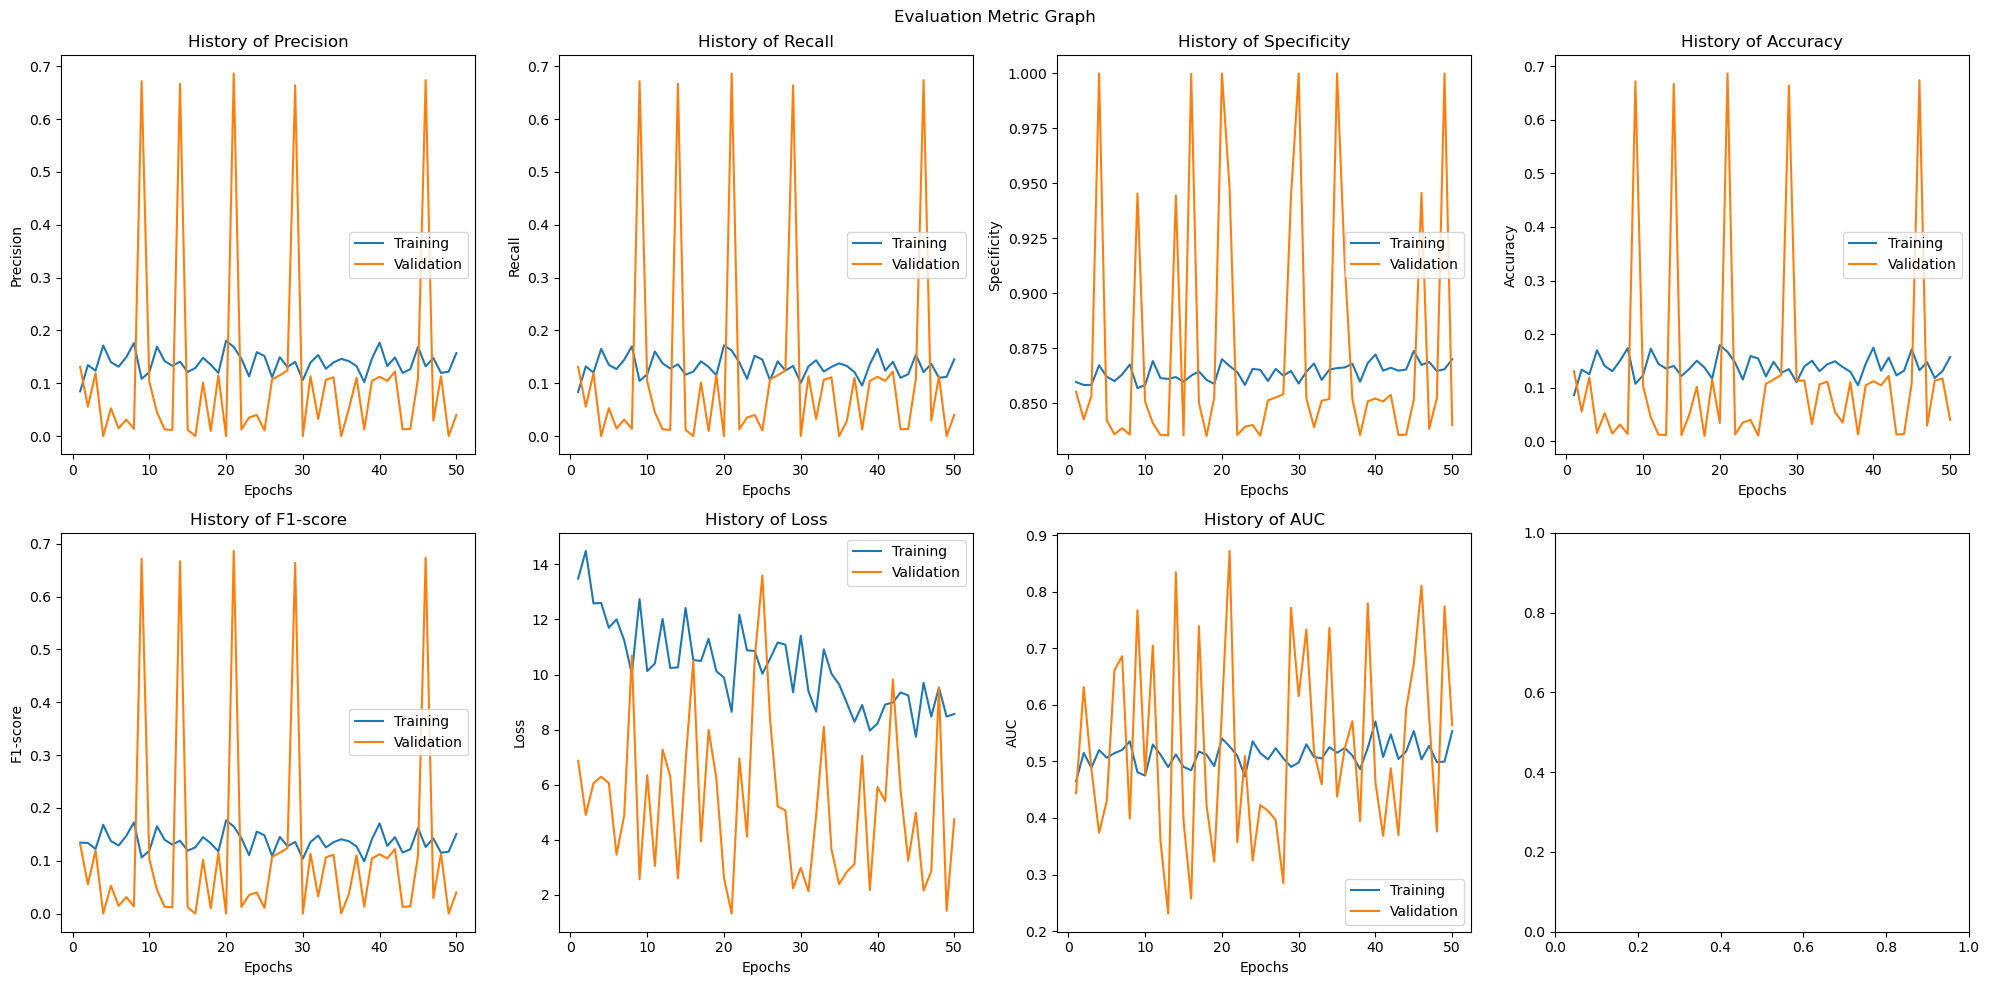

In [79]:
plot_history(b4_history.history["precision"],b4_history.history["val_precision"],
             b4_history.history["recall"],b4_history.history["val_recall"],
             b4_history.history["specificity"],b4_history.history["val_specificity"],
             b4_history.history["accuracy"],b4_history.history["val_accuracy"],
             b4_history.history["loss"],b4_history.history["val_loss"],
             b4_history.history["auc"],b4_history.history["val_auc"],
             b4_history.history["F1_score"],b4_history.history["val_F1_score"])

## Evaluate model performance on test data

In [80]:
# returns loss value and metrics value for the model on test data
eval_scores = efn_b4_model.evaluate(test_data)

32/32 [==============================] - 130s 4s/step - loss: 4.7375 - precision: 0.0526 - recall: 0.0526 - accuracy: 0.0526 - auc: 0.5655 - F1_score: 0.0527 - specificity: 0.8421


In [81]:
b4_y_ = efn_b4_model.predict(test_data)
b4_y_pred = b4_y_.argmax(axis=-1)

32/32 [==============================] - 133s 4s/step


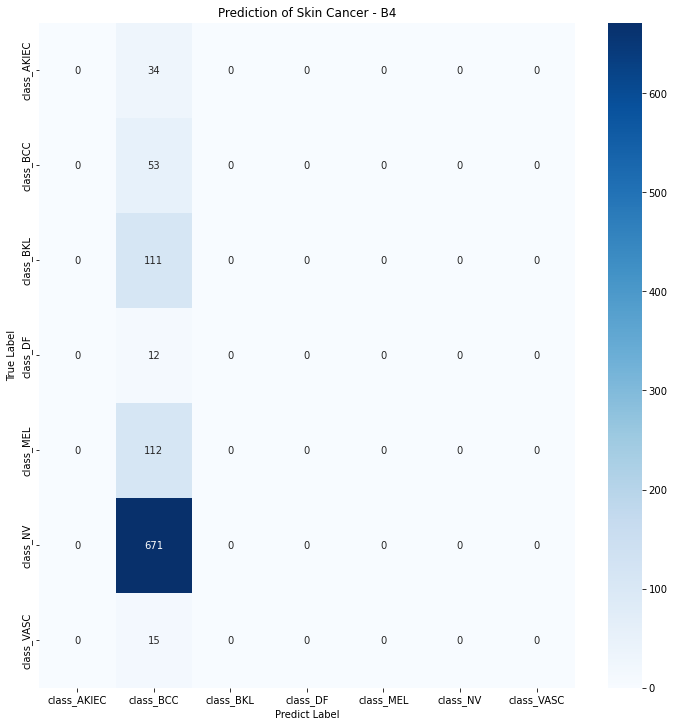

In [82]:
b4_cm = confusion_matrix(y_true, b4_y_pred)
plt.figure(figsize=(12, 12), dpi=72, edgecolor='k')
ax = sns.heatmap(b4_cm, cmap="Blues", annot=True, fmt="d", xticklabels=n_classes, yticklabels=n_classes)
plt.title("Prediction of Skin Cancer - B4")
plt.xlabel("Predict Label")
plt.ylabel("True Label")
plt.show(ax)

# EfficientNetB5

In [20]:
# define parameters
class_num = 7
target_size = (456,456)
size_batch = 32
epochs = 50

In [23]:
training_data,validation_data,test_data,aug_training_data,aug_validation_data,aug_test_data = mass_data_loader(class_num,
                                                                                                               target_size,
                                                                                                               size_batch,
                                                                                                               epochs,
                                                                                                               SEED)

Found 7007 images belonging to 7 classes.
Found 2000 images belonging to 7 classes.
Found 1008 images belonging to 7 classes.
Found 7007 images belonging to 7 classes.
Found 2000 images belonging to 7 classes.
Found 1008 images belonging to 7 classes.


In [24]:
# 7 classes: "class_AKIEC", "class_BCC", "class_BKL", "class_DF", "class_MEL", "class_NV", "class_VASC"
lesion_classes = ["class_AKIEC", "class_BCC", "class_BKL", "class_DF", "class_MEL", "class_NV", "class_VASC"]
# adding class attribute for classification to train, validation and test datasets: .lesion_classes
training_data.lesion_classes = lesion_classes
validation_data.lesion_classes = lesion_classes
test_data.lesion_classes = lesion_classes

In [25]:
# building the model
input_shape = (456, 456, 3)
conv_base_b5 = EfficientNetB5(weights="imagenet", include_top=False, input_shape=input_shape)
efn_b5_model = models.Sequential()
efn_b5_model.add(conv_base_b5)
efn_b5_model.add(layers.GlobalMaxPooling2D(name="gap"))
#avoid overfitting
efn_b5_model.add(layers.Dropout(rate=0.5, name="dropout_out"))
efn_b5_model.add(layers.Dense(class_num, activation="softmax", name="fc_out"))
conv_base_b5.trainable = False

In [26]:
# summary of EfficientNetB1 model
efn_b5_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb5 (Functional  (None, 15, 15, 2048)      28513527  
 )                                                               
                                                                 
 gap (GlobalMaxPooling2D)    (None, 2048)              0         
                                                                 
 dropout_out (Dropout)       (None, 2048)              0         
                                                                 
 fc_out (Dense)              (None, 7)                 14343     
                                                                 
Total params: 28527870 (108.83 MB)
Trainable params: 14343 (56.03 KB)
Non-trainable params: 28513527 (108.77 MB)
_________________________________________________________________


In [27]:
efn_b5_model.compile(optimizer="adam", loss="categorical_crossentropy",metrics=eval_metrics)

In [28]:
b5_history = efn_b5_model.fit(
    training_data,
    class_weight = train_class_weights,
    steps_per_epoch=size_batch,
    epochs=epochs,
    validation_data=validation_data,
    validation_steps=size_batch,
    verbose=1,
    use_multiprocessing=False,
    workers=4,
    shuffle=True
)

Epoch 1/50
32/32 [==============================] - 515s 16s/step - loss: 25.6012 - precision: 0.1464 - recall: 0.1455 - accuracy: 0.1465 - auc: 0.5108 - F1_score: 0.1458 - specificity: 0.8586 - val_loss: 6.7335 - val_precision: 0.0059 - val_recall: 0.0059 - val_accuracy: 0.0059 - val_auc: 0.5143 - val_F1_score: 0.0059 - val_specificity: 0.8343
Epoch 2/50
32/32 [==============================] - 505s 16s/step - loss: 22.1531 - precision: 0.1346 - recall: 0.1338 - accuracy: 0.1357 - auc: 0.5004 - F1_score: 0.1341 - specificity: 0.8566 - val_loss: 7.0398 - val_precision: 0.1211 - val_recall: 0.1211 - val_accuracy: 0.1211 - val_auc: 0.4798 - val_F1_score: 0.1211 - val_specificity: 0.8535
Epoch 3/50
32/32 [==============================] - 508s 16s/step - loss: 25.3225 - precision: 0.1124 - recall: 0.1123 - accuracy: 0.1133 - auc: 0.4796 - F1_score: 0.1124 - specificity: 0.8522 - val_loss: 9.4029 - val_precision: 0.0127 - val_recall: 0.0127 - val_accuracy: 0.0127 - val_auc: 0.4743 - val_F1

32/32 [==============================] - 516s 16s/step - loss: 20.1192 - precision: 0.1420 - recall: 0.1396 - accuracy: 0.1396 - auc: 0.4976 - F1_score: 0.1406 - specificity: 0.8594 - val_loss: 8.9582 - val_precision: 0.0439 - val_recall: 0.0439 - val_accuracy: 0.0439 - val_auc: 0.5713 - val_F1_score: 0.0439 - val_specificity: 0.8407
Epoch 48/50
32/32 [==============================] - 518s 16s/step - loss: 18.4889 - precision: 0.1547 - recall: 0.1533 - accuracy: 0.1553 - auc: 0.5210 - F1_score: 0.1540 - specificity: 0.8604 - val_loss: 11.7643 - val_precision: 0.0332 - val_recall: 0.0332 - val_accuracy: 0.0332 - val_auc: 0.4360 - val_F1_score: 0.0332 - val_specificity: 0.8389
Epoch 49/50
32/32 [==============================] - 517s 16s/step - loss: 15.6446 - precision: 0.1700 - recall: 0.1680 - accuracy: 0.1689 - auc: 0.5382 - F1_score: 0.1687 - specificity: 0.8633 - val_loss: 2.2597 - val_precision: 0.1094 - val_recall: 0.1094 - val_accuracy: 0.1094 - val_auc: 0.7600 - val_F1_score: 

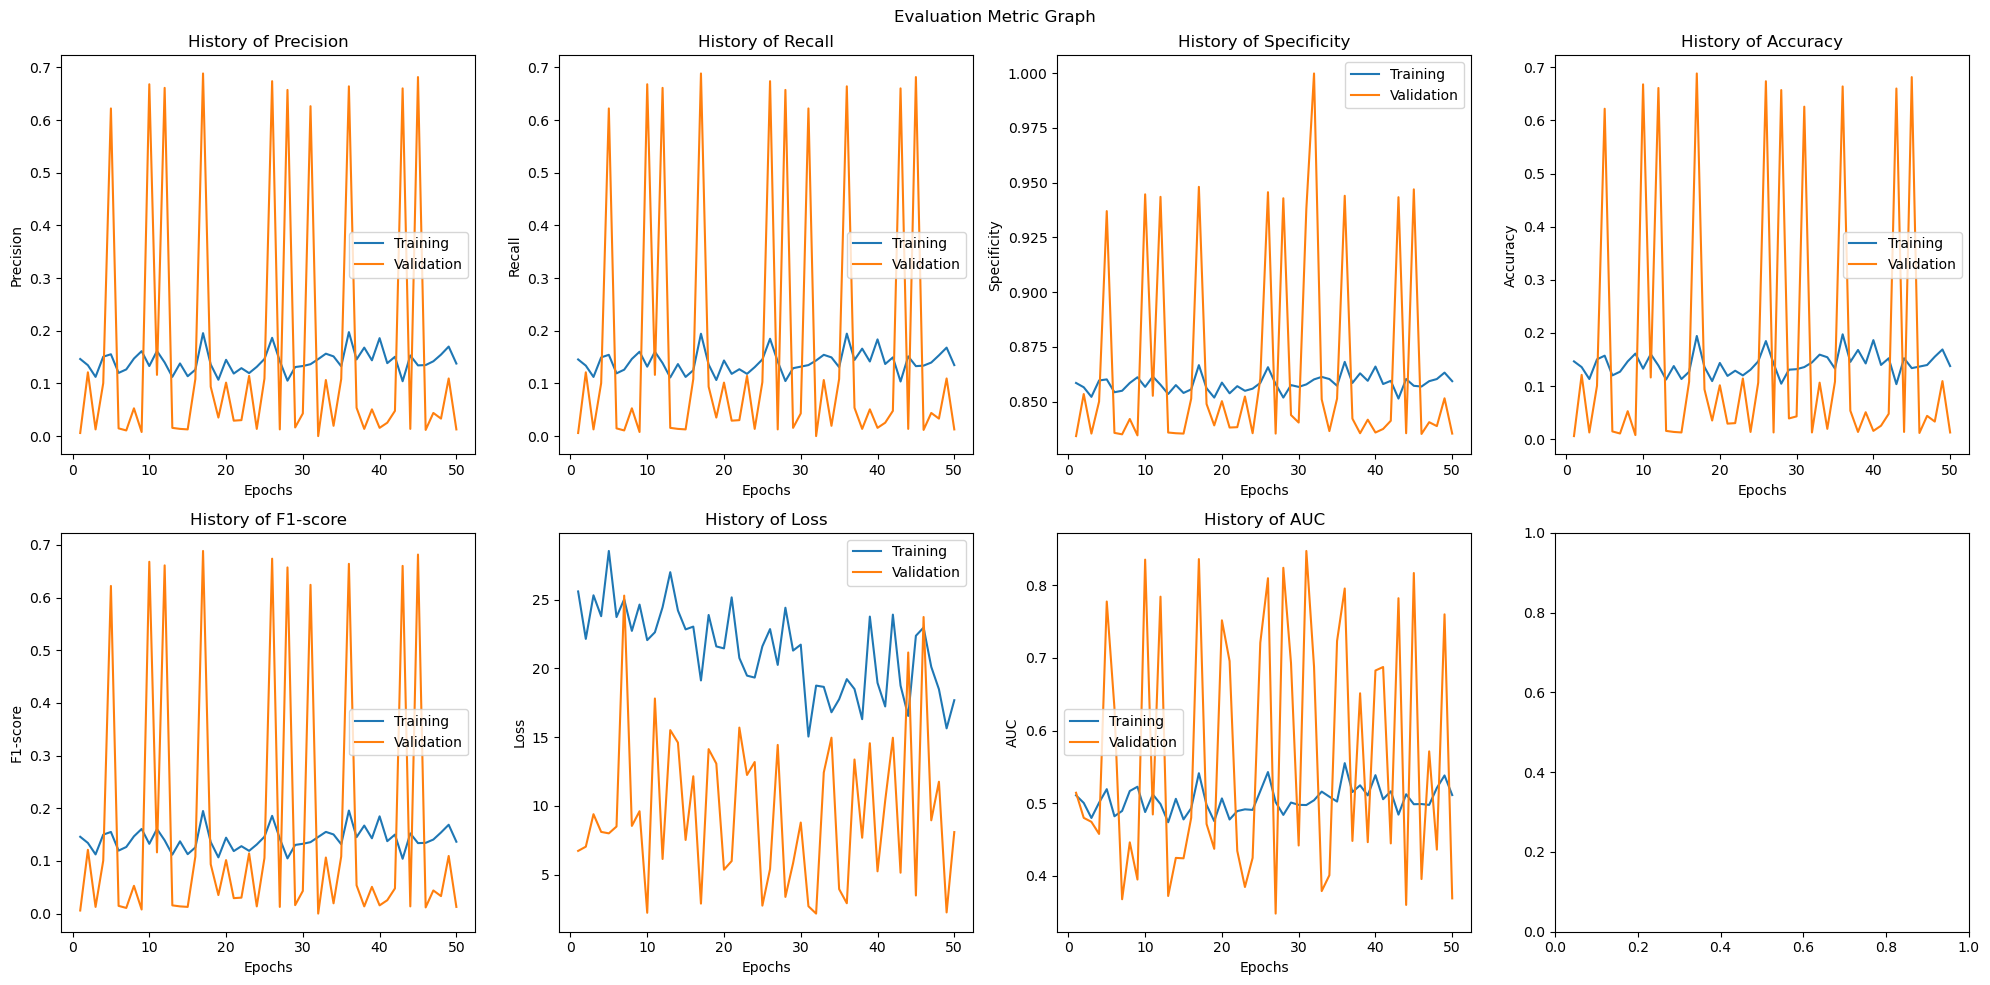

In [29]:
plot_history(b5_history.history["precision"],b5_history.history["val_precision"],
             b5_history.history["recall"],b5_history.history["val_recall"],
             b5_history.history["specificity"],b5_history.history["val_specificity"],
             b5_history.history["accuracy"],b5_history.history["val_accuracy"],
             b5_history.history["loss"],b5_history.history["val_loss"],
             b5_history.history["auc"],b5_history.history["val_auc"],
             b5_history.history["F1_score"],b5_history.history["val_F1_score"])

## Evaluate model performance on test data

In [30]:
# returns loss value and metrics value for the model on test data
eval_scores = efn_b5_model.evaluate(test_data)

32/32 [==============================] - 214s 7s/step - loss: 8.3774 - precision: 0.0119 - recall: 0.0119 - accuracy: 0.0119 - auc: 0.3733 - F1_score: 0.0117 - specificity: 0.8353


In [31]:
b5_y_ = efn_b5_model.predict(test_data)
b5_y_pred = b5_y_.argmax(axis=-1)

32/32 [==============================] - 217s 7s/step


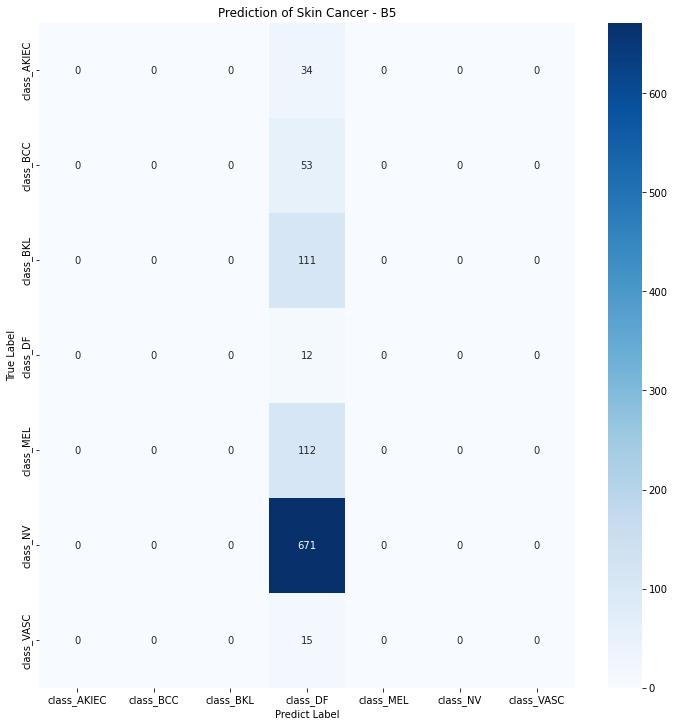

In [32]:
b5_cm = confusion_matrix(y_true, b5_y_pred)
plt.figure(figsize=(12, 12), dpi=72, edgecolor='k')
ax = sns.heatmap(b5_cm, cmap="Blues", annot=True, fmt="d", xticklabels=n_classes, yticklabels=n_classes)
plt.title("Prediction of Skin Cancer - B5")
plt.xlabel("Predict Label")
plt.ylabel("True Label")
plt.show(ax)

# EfficientNetB6

In [21]:
# define parameters
class_num = 7
target_size = (528,528)
size_batch = 32
epochs = 50

In [22]:
training_data,validation_data,test_data,aug_training_data,aug_validation_data,aug_test_data = mass_data_loader(class_num,
                                                                                                               target_size,
                                                                                                               size_batch,
                                                                                                               epochs,
                                                                                                               SEED)

Found 7007 images belonging to 7 classes.
Found 2000 images belonging to 7 classes.
Found 1008 images belonging to 7 classes.
Found 7007 images belonging to 7 classes.
Found 2000 images belonging to 7 classes.
Found 1008 images belonging to 7 classes.


In [23]:
# 7 classes: "class_AKIEC", "class_BCC", "class_BKL", "class_DF", "class_MEL", "class_NV", "class_VASC"
lesion_classes = ["class_AKIEC", "class_BCC", "class_BKL", "class_DF", "class_MEL", "class_NV", "class_VASC"]
# adding class attribute for classification to train, validation and test datasets: .lesion_classes
training_data.lesion_classes = lesion_classes
validation_data.lesion_classes = lesion_classes
test_data.lesion_classes = lesion_classes

In [24]:
# building the model
input_shape = (528, 528, 3)
conv_base_b6 = EfficientNetB6(weights="imagenet", include_top=False, input_shape=input_shape)
efn_b6_model = models.Sequential()
efn_b6_model.add(conv_base_b6)
efn_b6_model.add(layers.GlobalMaxPooling2D(name="gap"))
#avoid overfitting
efn_b6_model.add(layers.Dropout(rate=0.5, name="dropout_out"))
efn_b6_model.add(layers.Dense(class_num, activation="softmax", name="fc_out"))
conv_base_b6.trainable = False

In [25]:
# summary of EfficientNetB1 model
efn_b6_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb6 (Functional  (None, 17, 17, 2304)      40960143  
 )                                                               
                                                                 
 gap (GlobalMaxPooling2D)    (None, 2304)              0         
                                                                 
 dropout_out (Dropout)       (None, 2304)              0         
                                                                 
 fc_out (Dense)              (None, 7)                 16135     
                                                                 
Total params: 40976278 (156.31 MB)
Trainable params: 16135 (63.03 KB)
Non-trainable params: 40960143 (156.25 MB)
_________________________________________________________________


In [26]:
efn_b6_model.compile(optimizer="adam", loss="categorical_crossentropy",metrics=eval_metrics)

In [27]:
b6_history = efn_b6_model.fit(
    training_data,
    class_weight = train_class_weights,
    steps_per_epoch=size_batch,
    epochs=epochs,
    validation_data=validation_data,
    validation_steps=size_batch,
    verbose=1,
    use_multiprocessing=False,
    workers=4,
    shuffle=True
)

Epoch 1/50
32/32 [==============================] - 901s 28s/step - loss: 26.8719 - precision: 0.1357 - recall: 0.1348 - accuracy: 0.1367 - auc: 0.4964 - F1_score: 0.1351 - specificity: 0.8569 - val_loss: 13.1888 - val_precision: 0.0264 - val_recall: 0.0264 - val_accuracy: 0.0264 - val_auc: 0.3581 - val_F1_score: 0.0264 - val_specificity: 0.8377
Epoch 2/50
32/32 [==============================] - 884s 28s/step - loss: 25.9502 - precision: 0.1406 - recall: 0.1396 - accuracy: 0.1416 - auc: 0.4990 - F1_score: 0.1400 - specificity: 0.8577 - val_loss: 4.6223 - val_precision: 0.6481 - val_recall: 0.6348 - val_accuracy: 0.6465 - val_auc: 0.8213 - val_F1_score: 0.6413 - val_specificity: 0.9425
Epoch 3/50
32/32 [==============================] - 882s 28s/step - loss: 25.3616 - precision: 0.1248 - recall: 0.1240 - accuracy: 0.1270 - auc: 0.4898 - F1_score: 0.1244 - specificity: 0.8550 - val_loss: 3.7880 - val_precision: 0.6543 - val_recall: 0.6543 - val_accuracy: 0.6543 - val_auc: 0.7715 - val_F

32/32 [==============================] - 879s 28s/step - loss: 20.8857 - precision: 0.1280 - recall: 0.1270 - accuracy: 0.1279 - auc: 0.4917 - F1_score: 0.1276 - specificity: 0.8558 - val_loss: 13.4842 - val_precision: 0.1143 - val_recall: 0.1143 - val_accuracy: 0.1143 - val_auc: 0.4014 - val_F1_score: 0.1143 - val_specificity: 0.8524
Epoch 48/50
32/32 [==============================] - 881s 28s/step - loss: 24.7374 - precision: 0.1370 - recall: 0.1348 - accuracy: 0.1377 - auc: 0.5047 - F1_score: 0.1362 - specificity: 0.8586 - val_loss: 29.3402 - val_precision: 0.0488 - val_recall: 0.0488 - val_accuracy: 0.0488 - val_auc: 0.3722 - val_F1_score: 0.0488 - val_specificity: 0.8415
Epoch 49/50
32/32 [==============================] - 881s 28s/step - loss: 19.9039 - precision: 0.1495 - recall: 0.1484 - accuracy: 0.1484 - auc: 0.5079 - F1_score: 0.1491 - specificity: 0.8592 - val_loss: 13.2328 - val_precision: 0.1094 - val_recall: 0.1094 - val_accuracy: 0.1094 - val_auc: 0.4600 - val_F1_score

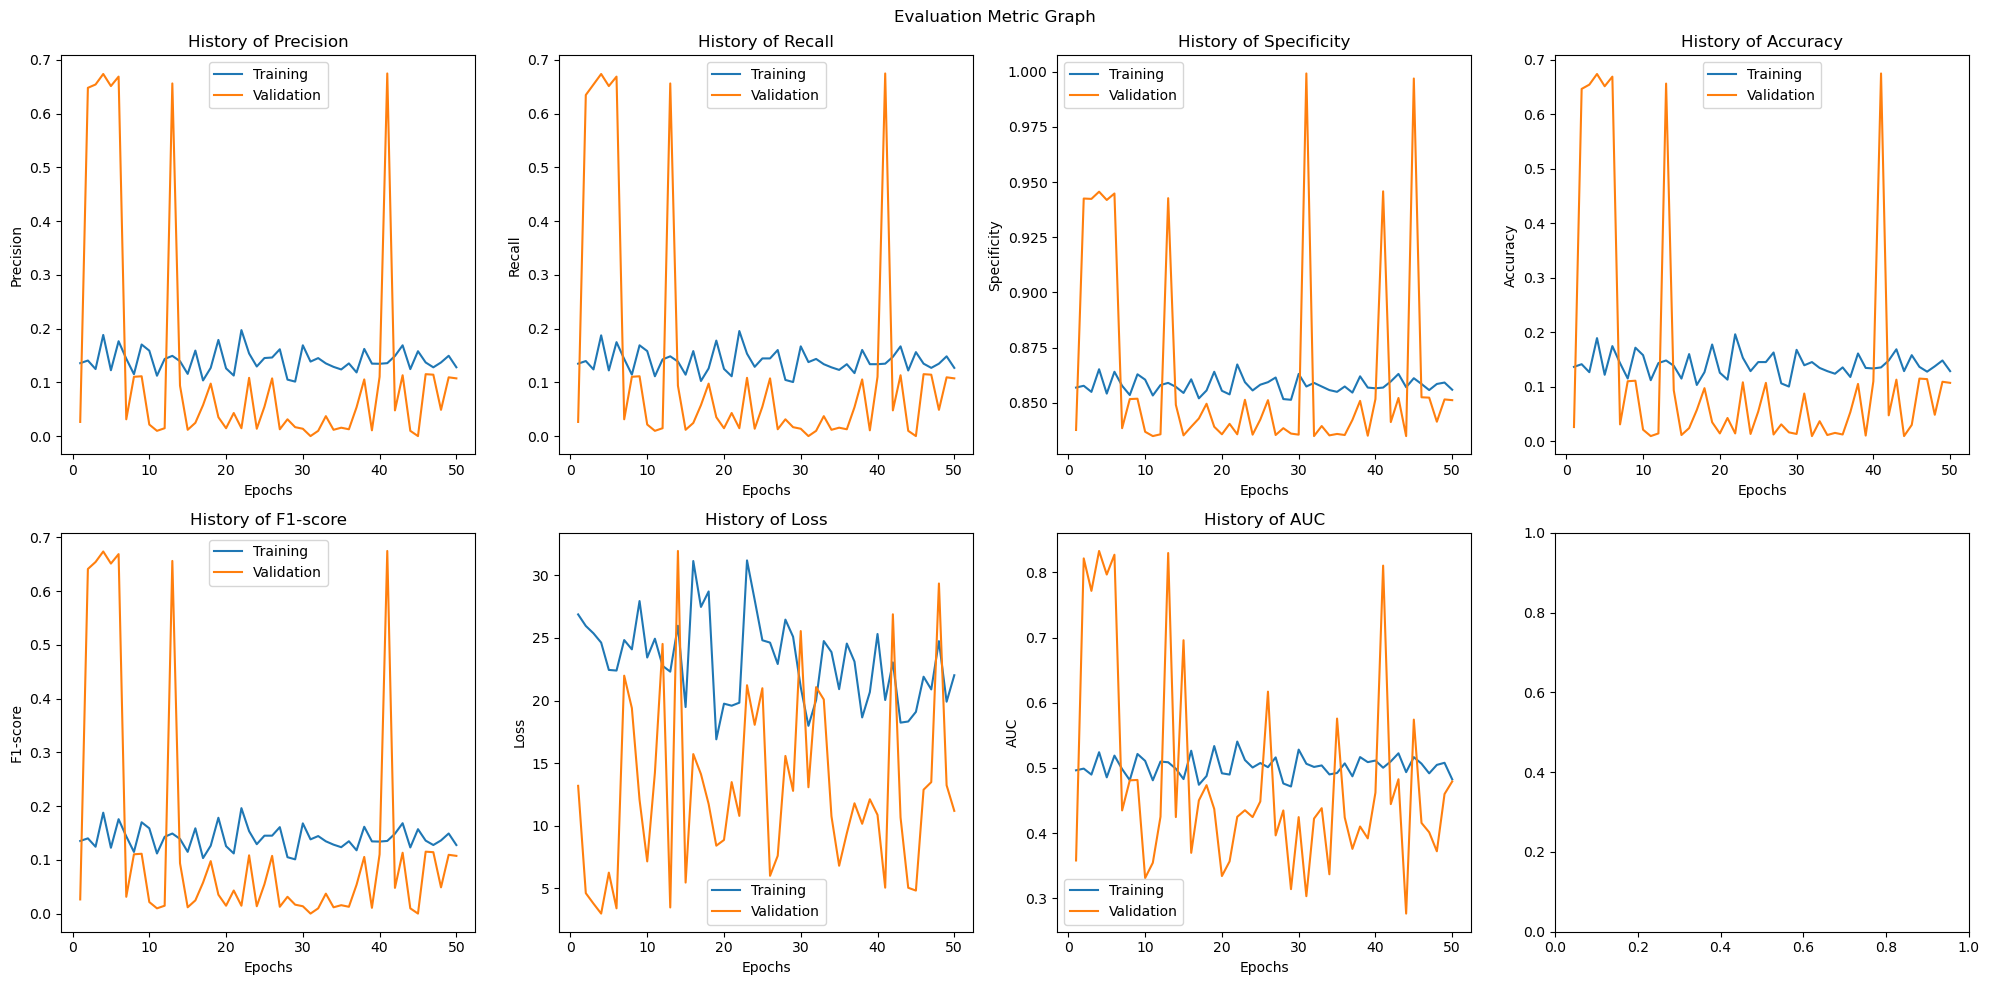

In [28]:
plot_history(b6_history.history["precision"],b6_history.history["val_precision"],
             b6_history.history["recall"],b6_history.history["val_recall"],
             b6_history.history["specificity"],b6_history.history["val_specificity"],
             b6_history.history["accuracy"],b6_history.history["val_accuracy"],
             b6_history.history["loss"],b6_history.history["val_loss"],
             b6_history.history["auc"],b6_history.history["val_auc"],
             b6_history.history["F1_score"],b6_history.history["val_F1_score"])

## Evaluate model performance on test data

In [29]:
# returns loss value and metrics value for the model on test data
eval_scores = efn_b6_model.evaluate(test_data)

32/32 [==============================] - 362s 11s/step - loss: 11.4029 - precision: 0.1101 - recall: 0.1101 - accuracy: 0.1101 - auc: 0.4809 - F1_score: 0.1123 - specificity: 0.8521


In [30]:
b6_y_ = efn_b6_model.predict(test_data)
b6_y_pred = b6_y_.argmax(axis=-1)

32/32 [==============================] - 368s 11s/step


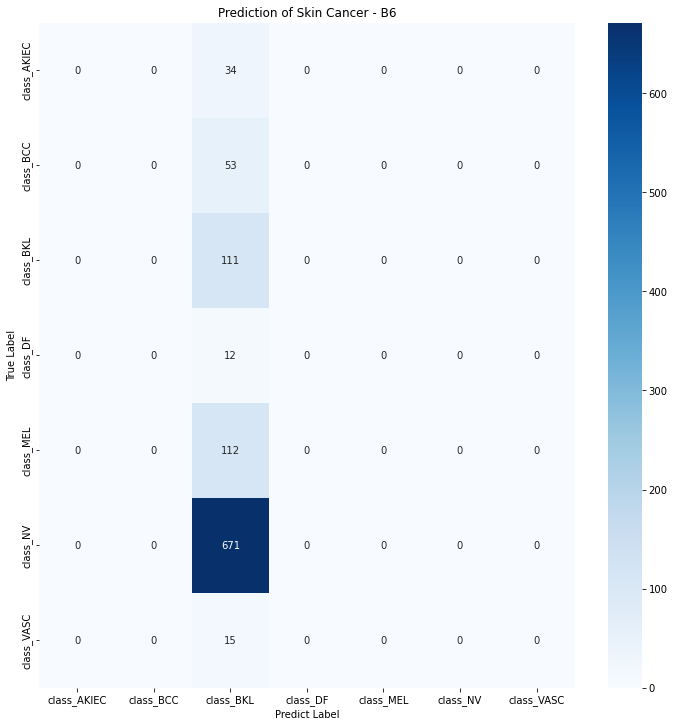

In [31]:
b6_cm = confusion_matrix(y_true, b6_y_pred)
plt.figure(figsize=(12, 12), dpi=72, edgecolor='k')
ax = sns.heatmap(b6_cm, cmap="Blues", annot=True, fmt="d", xticklabels=n_classes, yticklabels=n_classes)
plt.title("Prediction of Skin Cancer - B6")
plt.xlabel("Predict Label")
plt.ylabel("True Label")
plt.show(ax)

# EfficientNetB7

In [21]:
# define parameters
class_num = 7
target_size = (600,600)
size_batch = 32
epochs = 50

In [22]:
training_data,validation_data,test_data,aug_training_data,aug_validation_data,aug_test_data = mass_data_loader(class_num,
                                                                                                               target_size,
                                                                                                               size_batch,
                                                                                                               epochs,
                                                                                                               SEED)

Found 7007 images belonging to 7 classes.
Found 2000 images belonging to 7 classes.
Found 1008 images belonging to 7 classes.
Found 7007 images belonging to 7 classes.
Found 2000 images belonging to 7 classes.
Found 1008 images belonging to 7 classes.


In [23]:
# 7 classes: "class_AKIEC", "class_BCC", "class_BKL", "class_DF", "class_MEL", "class_NV", "class_VASC"
lesion_classes = ["class_AKIEC", "class_BCC", "class_BKL", "class_DF", "class_MEL", "class_NV", "class_VASC"]
# adding class attribute for classification to train, validation and test datasets: .lesion_classes
training_data.lesion_classes = lesion_classes
validation_data.lesion_classes = lesion_classes
test_data.lesion_classes = lesion_classes

In [24]:
# building the model
input_shape = (600, 600, 3)
conv_base_b7 = EfficientNetB7(weights="imagenet", include_top=False, input_shape=input_shape)
efn_b7_model = models.Sequential()
efn_b7_model.add(conv_base_b7)
efn_b7_model.add(layers.GlobalMaxPooling2D(name="gap"))
#avoid overfitting
efn_b7_model.add(layers.Dropout(rate=0.5, name="dropout_out"))
efn_b7_model.add(layers.Dense(class_num, activation="softmax", name="fc_out"))
conv_base_b7.trainable = False

In [25]:
# summary of EfficientNetB1 model
efn_b7_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb7 (Functional  (None, 19, 19, 2560)      64097687  
 )                                                               
                                                                 
 gap (GlobalMaxPooling2D)    (None, 2560)              0         
                                                                 
 dropout_out (Dropout)       (None, 2560)              0         
                                                                 
 fc_out (Dense)              (None, 7)                 17927     
                                                                 
Total params: 64115614 (244.58 MB)
Trainable params: 17927 (70.03 KB)
Non-trainable params: 64097687 (244.51 MB)
_________________________________________________________________


In [26]:
efn_b7_model.compile(optimizer="adam", loss="categorical_crossentropy",metrics=eval_metrics)

In [28]:
b7_history = efn_b7_model.fit(
    training_data,
    class_weight = train_class_weights,
    steps_per_epoch=size_batch,
    epochs=epochs,
    validation_data=validation_data,
    validation_steps=size_batch,
    verbose=1,
    use_multiprocessing=False,
    workers=4,
    shuffle=True
)

Epoch 1/50
32/32 [==============================] - 1554s 49s/step - loss: 20.0441 - precision: 0.1511 - recall: 0.1504 - accuracy: 0.1504 - auc: 0.5082 - F1_score: 0.1507 - specificity: 0.8592 - val_loss: 8.7127 - val_precision: 0.1309 - val_recall: 0.1309 - val_accuracy: 0.1309 - val_auc: 0.4434 - val_F1_score: 0.1309 - val_specificity: 0.8551
Epoch 2/50
32/32 [==============================] - 1554s 49s/step - loss: 21.7850 - precision: 0.1334 - recall: 0.1320 - accuracy: 0.1329 - auc: 0.4939 - F1_score: 0.1328 - specificity: 0.8571 - val_loss: 10.8122 - val_precision: 0.1201 - val_recall: 0.1201 - val_accuracy: 0.1201 - val_auc: 0.4201 - val_F1_score: 0.1201 - val_specificity: 0.8534
Epoch 3/50
32/32 [==============================] - 1553s 49s/step - loss: 20.0991 - precision: 0.1123 - recall: 0.1114 - accuracy: 0.1114 - auc: 0.4782 - F1_score: 0.1121 - specificity: 0.8532 - val_loss: 16.2505 - val_precision: 0.1094 - val_recall: 0.1094 - val_accuracy: 0.1094 - val_auc: 0.4805 - v

32/32 [==============================] - 1554s 49s/step - loss: 19.0310 - precision: 0.1325 - recall: 0.1310 - accuracy: 0.1339 - auc: 0.5037 - F1_score: 0.1317 - specificity: 0.8571 - val_loss: 8.3096 - val_precision: 0.0146 - val_recall: 0.0146 - val_accuracy: 0.0146 - val_auc: 0.5591 - val_F1_score: 0.0146 - val_specificity: 0.8358
Epoch 48/50
32/32 [==============================] - 1555s 49s/step - loss: 19.3855 - precision: 0.1300 - recall: 0.1289 - accuracy: 0.1299 - auc: 0.5080 - F1_score: 0.1292 - specificity: 0.8563 - val_loss: 8.7643 - val_precision: 0.0488 - val_recall: 0.0488 - val_accuracy: 0.0488 - val_auc: 0.4225 - val_F1_score: 0.0488 - val_specificity: 0.8415
Epoch 49/50
32/32 [==============================] - 1554s 49s/step - loss: 19.0981 - precision: 0.1542 - recall: 0.1523 - accuracy: 0.1543 - auc: 0.5159 - F1_score: 0.1531 - specificity: 0.8607 - val_loss: 11.7706 - val_precision: 0.0391 - val_recall: 0.0391 - val_accuracy: 0.0391 - val_auc: 0.4395 - val_F1_scor

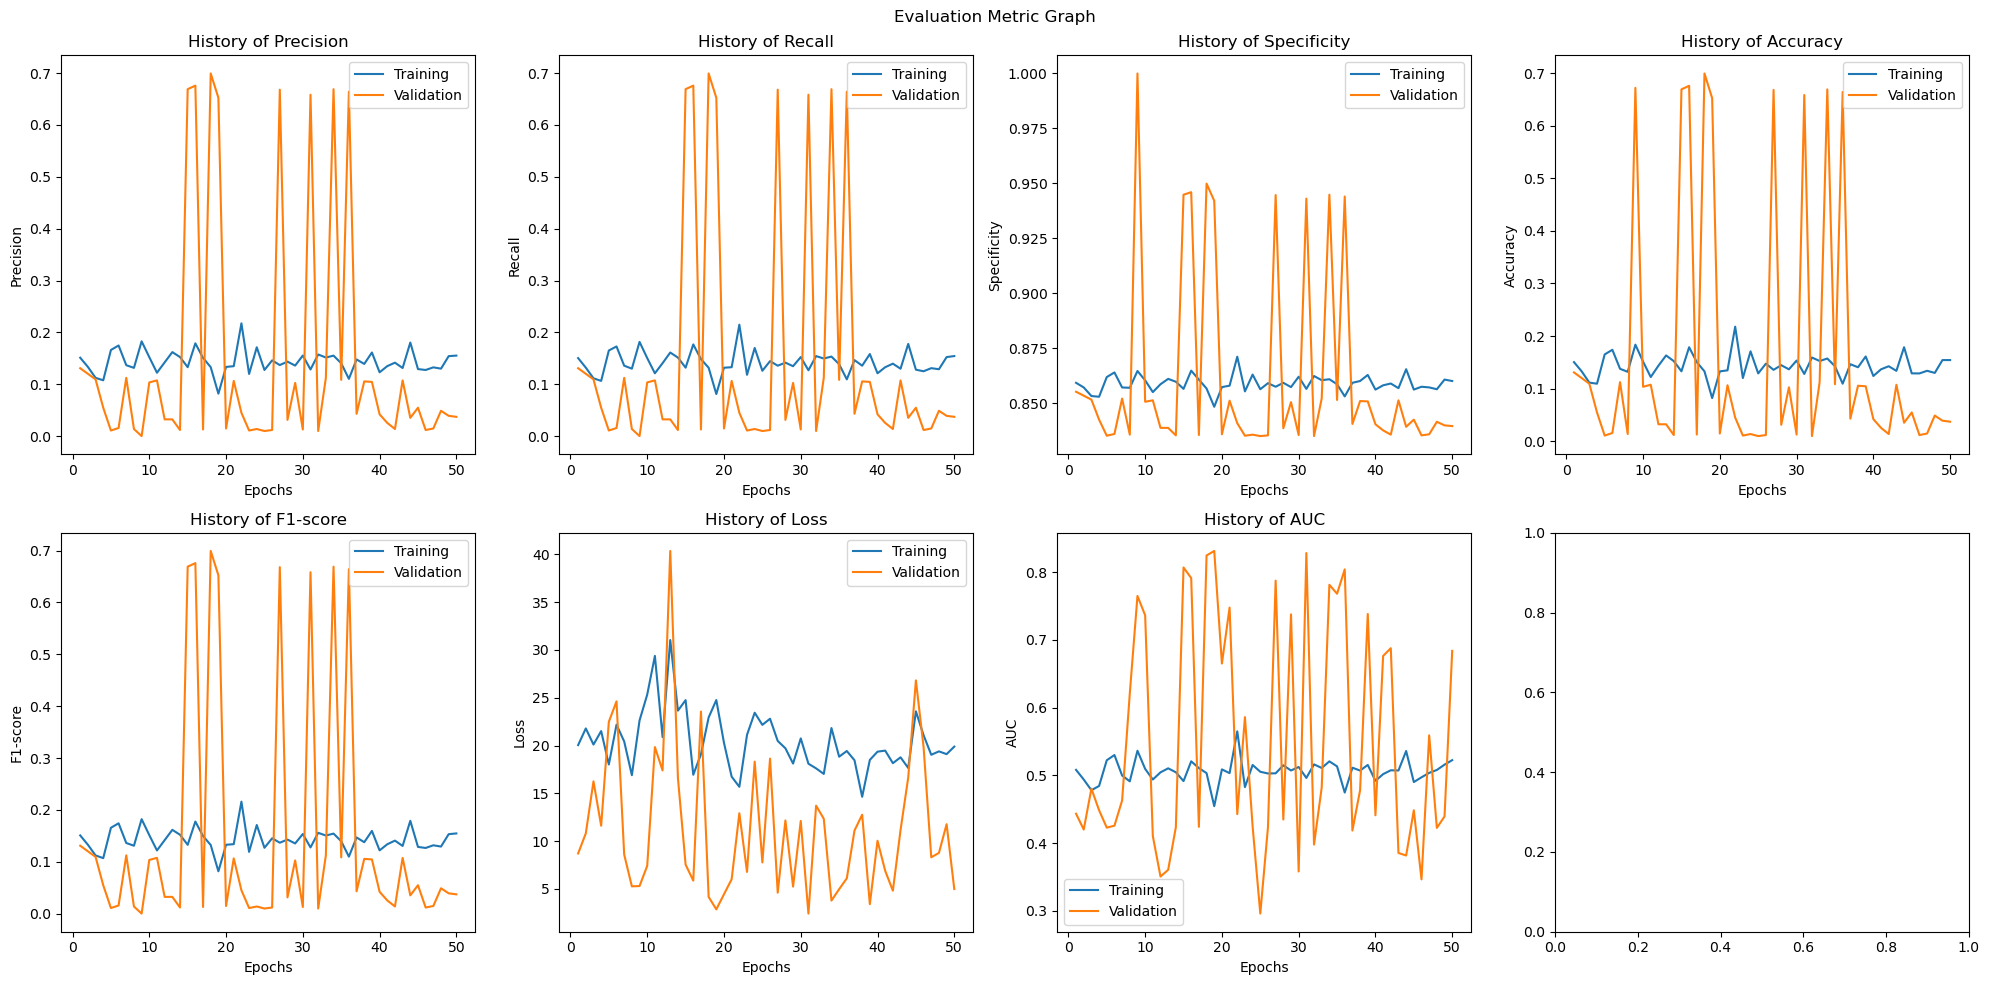

In [29]:
plot_history(b7_history.history["precision"],b7_history.history["val_precision"],
             b7_history.history["recall"],b7_history.history["val_recall"],
             b7_history.history["specificity"],b7_history.history["val_specificity"],
             b7_history.history["accuracy"],b7_history.history["val_accuracy"],
             b7_history.history["loss"],b7_history.history["val_loss"],
             b7_history.history["auc"],b7_history.history["val_auc"],
             b7_history.history["F1_score"],b7_history.history["val_F1_score"])

## Evaluate model performance on test data

In [30]:
# returns loss value and metrics value for the model on test data
eval_scores = efn_b7_model.evaluate(test_data)

32/32 [==============================] - 692s 22s/step - loss: 5.2924 - precision: 0.0337 - recall: 0.0337 - accuracy: 0.0337 - auc: 0.6693 - F1_score: 0.0342 - specificity: 0.8390


In [31]:
b7_y_ = efn_b7_model.predict(test_data)
b7_y_pred = b7_y_.argmax(axis=-1)

32/32 [==============================] - 710s 22s/step


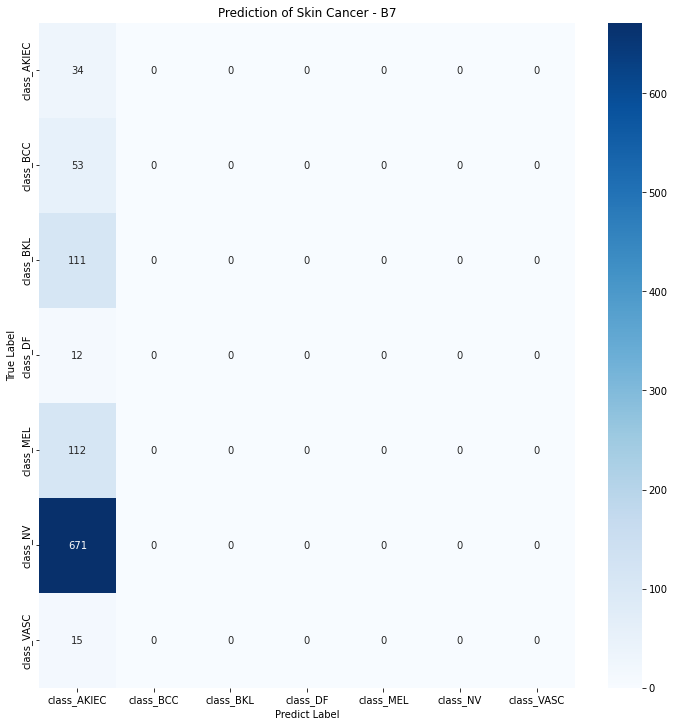

In [32]:
b7_cm = confusion_matrix(y_true, b7_y_pred)
plt.figure(figsize=(12, 12), dpi=72, edgecolor='k')
ax = sns.heatmap(b7_cm, cmap="Blues", annot=True, fmt="d", xticklabels=n_classes, yticklabels=n_classes)
plt.title("Prediction of Skin Cancer - B7")
plt.xlabel("Predict Label")
plt.ylabel("True Label")
plt.show(ax)

## Choosing the appropriate model for my project

For the project to have a cost-effective model there are a few metrics we need to prioritize when selecting:
- Time taken against performance
- Specificity
- F1-score

We also want to avoid overfitting in order for the model to generalise better. Based on my observations of the time taken and the loss graphs, I will be focusing on EfficientNet Models B0 to B2 with unaugmented data and comparing them.

# Option A - EfficientNetB0 with hyperparameter tuning and class weights

In [39]:
# define parameters
class_num = 7
target_size = (224,224)
size_batch = 32
epochs = 50

In [40]:
training_data,validation_data,test_data,aug_training_data,aug_validation_data,aug_test_data = mass_data_loader(class_num,
                                                                                                               target_size,
                                                                                                               size_batch,
                                                                                                               epochs,
                                                                                                               SEED)

Found 7007 images belonging to 7 classes.
Found 2000 images belonging to 7 classes.
Found 1008 images belonging to 7 classes.
Found 7007 images belonging to 7 classes.
Found 2000 images belonging to 7 classes.
Found 1008 images belonging to 7 classes.


In [41]:
def build_model(hp):
    input_shape = (224, 224, 3)
    conv_base = EfficientNetB0(weights="imagenet", include_top=False, input_shape=input_shape)
    
    model = models.Sequential()
    model.add(conv_base)
    model.add(layers.GlobalMaxPooling2D(name="gap"))
    
    # Tune the dropout rate hyperparameter
    hp_dropout = hp.Float('dropout', min_value=0.2, max_value=0.7, step=0.1)
    model.add(layers.Dropout(rate=hp_dropout, name="dropout_out"))
    
    model.add(layers.Dense(class_num, activation="softmax", name="fc_out"))
    conv_base.trainable = False
    
    model.compile(keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])), 
                  loss="categorical_crossentropy", 
                  metrics=eval_metrics)
    
    return model

In [42]:
import keras_tuner as kt
import keras

In [51]:
tuner = kt.BayesianOptimization(
    build_model,
    objective='val_accuracy',  # Change to the appropriate metric
    max_trials=10,  # Number of hyperparameter combinations to try
    directory='my_dir',  # Directory to store the results
    project_name='my_project'
)


In [53]:
tuner.search(training_data,
    class_weight = train_class_weights,
    steps_per_epoch=size_batch,
    epochs=epochs,
    validation_data=validation_data,
    validation_steps=size_batch,
    verbose=1,
    use_multiprocessing=False,
    workers=4)

Trial 10 Complete [00h 33m 00s]
val_accuracy: 0.6875

Best val_accuracy So Far: 0.6923828125
Total elapsed time: 05h 27m 47s
INFO:tensorflow:Oracle triggered exit


In [54]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
final_model = tuner.hypermodel.build(best_hps)

In [55]:
final_model.fit(training_data,
    class_weight = train_class_weights,
    steps_per_epoch=size_batch,
    epochs=epochs,
    validation_data=validation_data,
    validation_steps=size_batch,
    verbose=1,
    use_multiprocessing=False,
    workers=4)

Epoch 1/50
32/32 [==============================] - 47s 1s/step - loss: 7.9211 - precision: 0.1056 - recall: 0.1021 - accuracy: 0.1074 - auc: 0.4732 - F1_score: 0.1603 - specificity: 0.8704 - val_loss: 3.8140 - val_precision: 0.1006 - val_recall: 0.1006 - val_accuracy: 0.1006 - val_auc: 0.2810 - val_F1_score: 0.1006 - val_specificity: 0.8501
Epoch 2/50
32/32 [==============================] - 40s 1s/step - loss: 6.9819 - precision: 0.1249 - recall: 0.1162 - accuracy: 0.1240 - auc: 0.4789 - F1_score: 0.1198 - specificity: 0.8643 - val_loss: 2.3990 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_accuracy: 0.0361 - val_auc: 0.5687 - val_F1_score: 0.0000e+00 - val_specificity: 1.0000
Epoch 3/50
32/32 [==============================] - 40s 1s/step - loss: 7.3964 - precision: 0.1229 - recall: 0.1133 - accuracy: 0.1240 - auc: 0.4704 - F1_score: 0.1178 - specificity: 0.8652 - val_loss: 4.2255 - val_precision: 0.0312 - val_recall: 0.0312 - val_accuracy: 0.0312 - val_auc: 0.3875 - val

32/32 [==============================] - 41s 1s/step - loss: 3.6788 - precision: 0.0896 - recall: 0.0566 - accuracy: 0.0947 - auc: 0.4974 - F1_score: 0.0695 - specificity: 0.9041 - val_loss: 1.5221 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_accuracy: 0.1104 - val_auc: 0.7719 - val_F1_score: 0.0000e+00 - val_specificity: 1.0000
Epoch 48/50
32/32 [==============================] - 41s 1s/step - loss: 3.5180 - precision: 0.1078 - recall: 0.0664 - accuracy: 0.1406 - auc: 0.6031 - F1_score: 0.0825 - specificity: 0.9084 - val_loss: 2.2475 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_accuracy: 0.0098 - val_auc: 0.4917 - val_F1_score: 0.0000e+00 - val_specificity: 1.0000
Epoch 49/50
32/32 [==============================] - 41s 1s/step - loss: 3.3021 - precision: 0.0965 - recall: 0.0596 - accuracy: 0.1309 - auc: 0.5617 - F1_score: 0.0747 - specificity: 0.9071 - val_loss: 1.3676 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_accuracy: 0.6797 - val_auc: 0

In [56]:
final_model.evaluate(test_data)

32/32 [==============================] - 20s 614ms/step - loss: 1.3800 - precision: 0.0000e+00 - recall: 0.0000e+00 - accuracy: 0.6657 - auc: 0.8493 - F1_score: 0.0000e+00 - specificity: 1.0000


[1.3799759149551392, 0.0, 0.0, 0.66567462682724, 0.8492932319641113, 0.0, 1.0]

In [125]:
n_classes = ["class_AKIEC", "class_BCC", "class_BKL", "class_DF", "class_MEL", "class_NV", "class_VASC"]

In [57]:
a_y_ = final_model.predict(test_data)
a_y_pred = a_y_.argmax(axis=-1)
y_true = test_data.classes

32/32 [==============================] - 21s 615ms/step


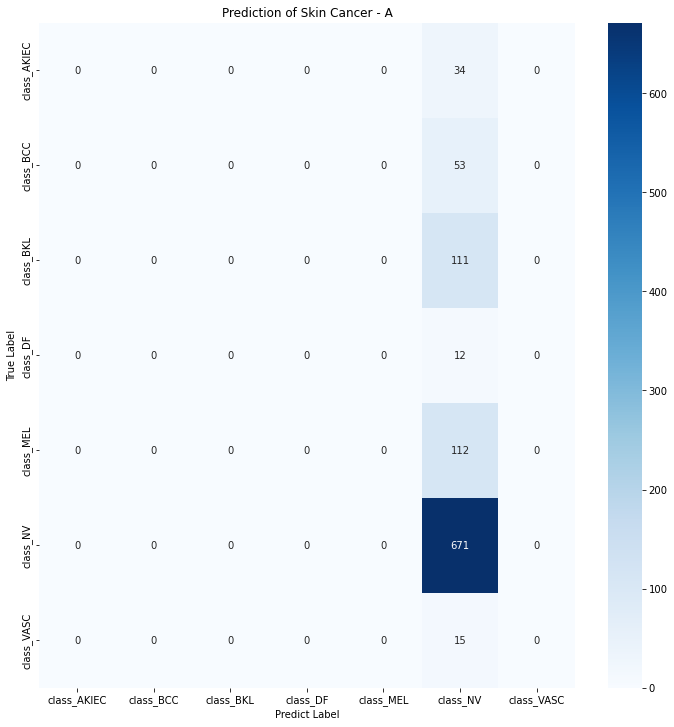

In [58]:
option_a_cm = confusion_matrix(y_true, a_y_pred)
plt.figure(figsize=(12, 12), dpi=72, edgecolor='k')
ax = sns.heatmap(option_a_cm, cmap="Blues", annot=True, fmt="d", xticklabels=n_classes, yticklabels=n_classes)
plt.title("Prediction of Skin Cancer - A")
plt.xlabel("Predict Label")
plt.ylabel("True Label")
plt.show(ax)

# Option B - Expanding dataset to fix data imbalance

## *RUN ONCE ONLY*

In [59]:
# file counter
def file_counter(dir_name):
    count = 0
    # Iterate directory
    for path in os.listdir(dir_name):
        # check if current path is a file
        if os.path.isfile(os.path.join(dir_name, path)):
            count += 1
    return count

In [31]:
# custom data augmentation and expansion function
def add_aug_data(data_dir, save_dir, num_files, scale_factor,class_name):
    aug_data_gen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=360,
                                  horizontal_flip=True,
                                  vertical_flip=True,
                                  zoom_range=(0.75,1),
                                  brightness_range=(0.75,1.25)
                                 )
    
    new_data = aug_data_gen.flow_from_directory(data_dir, 
                                                target_size=(600,600),
                                                save_to_dir=save_dir,
                                                color_mode="rgb", # Choose color mode
                                                class_mode="categorical",
                                                classes=class_name,
                                                shuffle=True,
                                                save_format='jpg', # Formate
                                                batch_size=num_files,
                                                seed=SEED)
    for i in range(scale_factor):
        new_data.next()
        
# majority class
class_dir = r"C:\Users\User\Downloads\FYP\data"
nv_dir = r"C:\Users\User\Downloads\FYP\data\class_NV"

# minority class
akiec_c = ["class_AKIEC"]
bcc_c = ["class_BCC"]
bkl_c =["class_BKL"]
df_c = ["class_DF"]
mel_c = ["class_MEL"]
vasc_c = ["class_VASC"]
minority = [akiec_c,bcc_c,bkl_c,df_c,mel_c,vasc_c]

# new augmented minority class
new_akiec_dir = r"C:\Users\User\Downloads\FYP\aug_data\class_AKIEC"
new_bcc_dir = r"C:\Users\User\Downloads\FYP\aug_data\class_BCC"
new_bkl_dir = r"C:\Users\User\Downloads\FYP\aug_data\class_BKL"
new_df_dir = r"C:\Users\User\Downloads\FYP\aug_data\class_DF"
new_mel_dir = r"C:\Users\User\Downloads\FYP\aug_data\class_MEL"
new_vasc_dir = r"C:\Users\User\Downloads\FYP\aug_data\class_VASC"
new_dir = [new_akiec_dir,new_bcc_dir,new_bkl_dir,new_df_dir,new_mel_dir,new_vasc_dir]

# check number of each file
num_nv = file_counter(nv_dir)
num_akiec = file_counter(akiec_dir)
num_bcc = file_counter(bcc_dir)
num_bkl = file_counter(bkl_dir)
num_df = file_counter(df_dir)
num_mel = file_counter(mel_dir)
num_vasc = file_counter(vasc_dir)
num_list=[num_akiec,num_bcc,num_bkl,num_df,num_mel,num_vasc]

# to balance the classes, scale factor = No. of MajorityClass(NV) // No. of MinorityClass
scale_akiec = num_nv//num_akiec
scale_bcc = num_nv//num_bcc
scale_bkl = num_nv//num_bkl
scale_df = num_nv//num_df
scale_mel = num_nv//num_mel
scale_vasc = num_nv//num_vasc

scale_list = [scale_akiec,scale_bcc,scale_bkl,scale_df,scale_mel,scale_vasc]

for i in range(len(scale_list)):
    print(scale_list[i])

20
13
6
58
6
47


In [30]:
# run once only
data_dir=class_dir
save_dir=new_akiec_dir
scale_factor=scale_akiec
class_name = akiec_c
add_aug_data(data_dir, save_dir, num_akiec, scale_factor, class_name)

Found 327 images belonging to 1 classes.


In [32]:
# run once only
for i in range(len(scale_list)):
    data_dir=class_dir
    class_name = minority[i]
    num_file = num_list[i]
    save_dir=new_dir[i]
    scale_factor=scale_list[i]
    add_aug_data(data_dir, save_dir, num_file, scale_factor, class_name)

Found 327 images belonging to 1 classes.
Found 514 images belonging to 1 classes.
Found 1099 images belonging to 1 classes.
Found 115 images belonging to 1 classes.
Found 1113 images belonging to 1 classes.
Found 142 images belonging to 1 classes.


# Re splitting data

In [33]:
input_folder = r"C:\Users\User\Downloads\FYP\aug_data"
splitfolders.ratio(input_folder, output="aug_dataset", seed = SEED, ratio=(.7,.2,.1),group_prefix=None)

Copying files: 46543 files [00:45, 1033.61 files/s]


In [26]:
# define parameters
class_num = 7
target_size = (300,300)
size_batch = 32
epochs = 50

In [43]:
def new_data_loader(class_num,target_size,size_batch,epochs,SEED):
    # not augmented data
    training_data = reg_data_gen.flow_from_directory(directory=r"C:\Users\User\Downloads\FYP\aug_dataset\train",
                                                     target_size = target_size,
                                                     class_mode = 'categorical',
                                                     batch_size = size_batch,
                                                     shuffle=True,
                                                     seed=SEED)
    validation_data = reg_data_gen.flow_from_directory(directory=r"C:\Users\User\Downloads\FYP\aug_dataset\val",
                                                       target_size = target_size,
                                                       class_mode = 'categorical',
                                                       batch_size = size_batch,
                                                       shuffle=True,
                                                       seed=SEED)
    test_data = reg_data_gen.flow_from_directory(directory=r"C:\Users\User\Downloads\FYP\aug_dataset\test",
                                                 target_size = target_size,
                                                 class_mode = 'categorical',
                                                 batch_size = size_batch,
                                                 shuffle=True,
                                                 seed=SEED)
    
    # augmented data
    aug_training_data = aug_data_gen.flow_from_directory(directory=r"C:\Users\User\Downloads\FYP\aug_dataset\train",
                                                         target_size = target_size,
                                                         class_mode = 'categorical',
                                                         batch_size = size_batch,
                                                         shuffle=True,
                                                         seed=SEED)
    aug_validation_data = reg_data_gen.flow_from_directory(directory=r"C:\Users\User\Downloads\FYP\aug_dataset\val",
                                                           target_size = target_size,
                                                           class_mode = 'categorical',
                                                           batch_size = size_batch,
                                                           shuffle=True,
                                                           seed=SEED)
    aug_test_data = reg_data_gen.flow_from_directory(directory=r"C:\Users\User\Downloads\FYP\aug_dataset\test",
                                                     target_size = target_size,
                                                     class_mode = 'categorical',
                                                     batch_size = size_batch,
                                                     shuffle=True,
                                                     seed=SEED)
    return training_data,validation_data,test_data,aug_training_data,aug_validation_data,aug_test_data
    
training_data,validation_data,test_data,aug_training_data,aug_validation_data,aug_test_data = new_data_loader(class_num,
                                                                                                               target_size,
                                                                                                               size_batch,
                                                                                                               epochs,
                                                                                                               SEED)

Found 32577 images belonging to 7 classes.
Found 9306 images belonging to 7 classes.
Found 4660 images belonging to 7 classes.
Found 32577 images belonging to 7 classes.
Found 9306 images belonging to 7 classes.
Found 4660 images belonging to 7 classes.


# EfficientNet B3 for augmented

In [44]:
# 7 classes: "class_AKIEC", "class_BCC", "class_BKL", "class_DF", "class_MEL", "class_NV", "class_VASC"
lesion_classes = ["class_AKIEC", "class_BCC", "class_BKL", "class_DF", "class_MEL", "class_NV", "class_VASC"]
# adding class attribute for classification to train, validation and test datasets: .lesion_classes
training_data.lesion_classes = lesion_classes
validation_data.lesion_classes = lesion_classes
test_data.lesion_classes = lesion_classes

In [45]:
# building the model
input_shape = (300, 300, 3)
conv_base_b3 = EfficientNetB3(weights="imagenet", include_top=False, input_shape=input_shape)
efn_b3_model = models.Sequential()
efn_b3_model.add(conv_base_b3)
efn_b3_model.add(layers.GlobalMaxPooling2D(name="gap"))
#avoid overfitting
efn_b3_model.add(layers.Dropout(rate=0.5, name="dropout_out"))
efn_b3_model.add(layers.Dense(class_num, activation="softmax", name="fc_out"))
conv_base_b3.trainable = False

In [46]:
# summary of EfficientNetB1 model
efn_b3_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional  (None, 10, 10, 1536)      10783535  
 )                                                               
                                                                 
 gap (GlobalMaxPooling2D)    (None, 1536)              0         
                                                                 
 dropout_out (Dropout)       (None, 1536)              0         
                                                                 
 fc_out (Dense)              (None, 7)                 10759     
                                                                 
Total params: 10794294 (41.18 MB)
Trainable params: 10759 (42.03 KB)
Non-trainable params: 10783535 (41.14 MB)
_________________________________________________________________


In [47]:
efn_b3_model.compile(optimizer="adam", loss="categorical_crossentropy",metrics=eval_metrics)

In [48]:
b3_history = efn_b3_model.fit(
    training_data,
    steps_per_epoch=size_batch,
    epochs=epochs,
    validation_data=validation_data,
    validation_steps=size_batch,
    verbose=1,
    use_multiprocessing=False,
    workers=4,
)

Epoch 1/50
32/32 [==============================] - 143s 4s/step - loss: 21.4394 - precision: 0.1405 - recall: 0.1396 - accuracy: 0.1403 - auc: 0.4978 - F1_score: 0.1315 - specificity: 0.8566 - val_loss: 4.5254 - val_precision: 0.0741 - val_recall: 0.0039 - val_accuracy: 0.1504 - val_auc: 0.4873 - val_F1_score: 0.0071 - val_specificity: 0.9919
Epoch 2/50
32/32 [==============================] - 132s 4s/step - loss: 19.1669 - precision: 0.1314 - recall: 0.1299 - accuracy: 0.1328 - auc: 0.4877 - F1_score: 0.1307 - specificity: 0.8569 - val_loss: 5.6305 - val_precision: 0.1533 - val_recall: 0.1533 - val_accuracy: 0.1533 - val_auc: 0.5019 - val_F1_score: 0.1533 - val_specificity: 0.8589
Epoch 3/50
32/32 [==============================] - 131s 4s/step - loss: 18.1982 - precision: 0.1361 - recall: 0.1348 - accuracy: 0.1357 - auc: 0.4913 - F1_score: 0.1354 - specificity: 0.8574 - val_loss: 4.6327 - val_precision: 0.1436 - val_recall: 0.1436 - val_accuracy: 0.1436 - val_auc: 0.5090 - val_F1_sc

Epoch 25/50
32/32 [==============================] - 129s 4s/step - loss: 7.2375 - precision: 0.1426 - recall: 0.1318 - accuracy: 0.1426 - auc: 0.5030 - F1_score: 0.1369 - specificity: 0.8678 - val_loss: 4.5713 - val_precision: 0.1490 - val_recall: 0.1484 - val_accuracy: 0.1484 - val_auc: 0.5091 - val_F1_score: 0.1488 - val_specificity: 0.8587
Epoch 26/50
32/32 [==============================] - 130s 4s/step - loss: 6.5854 - precision: 0.1447 - recall: 0.1309 - accuracy: 0.1445 - auc: 0.5018 - F1_score: 0.1373 - specificity: 0.8711 - val_loss: 4.9237 - val_precision: 0.1482 - val_recall: 0.1475 - val_accuracy: 0.1475 - val_auc: 0.5144 - val_F1_score: 0.1478 - val_specificity: 0.8587
Epoch 27/50
32/32 [==============================] - 130s 4s/step - loss: 6.5068 - precision: 0.1305 - recall: 0.1191 - accuracy: 0.1338 - auc: 0.5007 - F1_score: 0.1242 - specificity: 0.8677 - val_loss: 2.8324 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_accuracy: 0.1357 - val_auc: 0.5144 - v

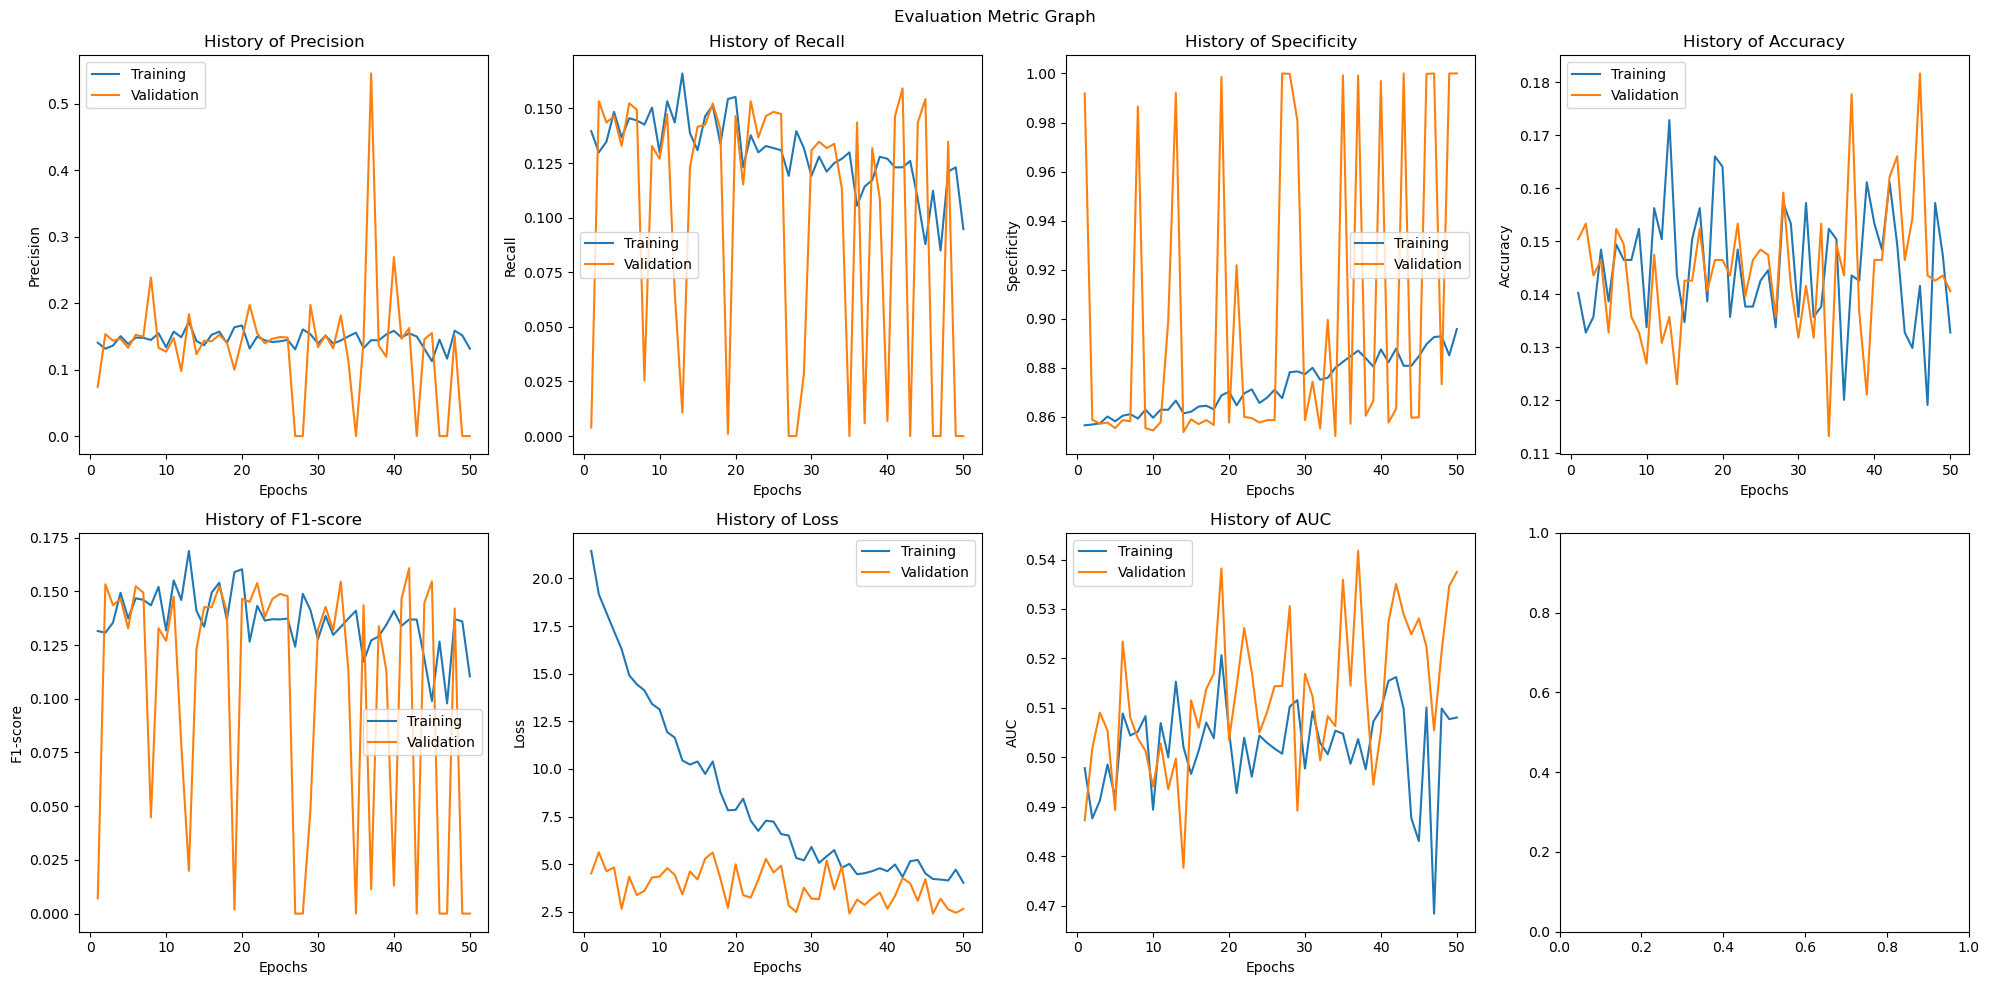

In [49]:
plot_history(b3_history.history["precision"],b3_history.history["val_precision"],
             b3_history.history["recall"],b3_history.history["val_recall"],
             b3_history.history["specificity"],b3_history.history["val_specificity"],
             b3_history.history["accuracy"],b3_history.history["val_accuracy"],
             b3_history.history["loss"],b3_history.history["val_loss"],
             b3_history.history["auc"],b3_history.history["val_auc"],
             b3_history.history["F1_score"],b3_history.history["val_F1_score"])

## Evaluate model performance on test data

In [35]:
# returns loss value and metrics value for the model on test data
b3_eval_scores = efn_b3_model.evaluate(test_data)

146/146 [==============================] - 303s 2s/step - loss: 4.2405 - precision: 0.1403 - recall: 0.1403 - accuracy: 0.1403 - auc: 0.5137 - F1_score: 0.1404 - specificity: 0.8567


In [36]:
n_classes = ["class_AKIEC", "class_BCC", "class_BKL", "class_DF", "class_MEL", "class_NV", "class_VASC"]

In [37]:
b3_y_ = efn_b3_model.predict(test_data)
b3_y_pred = b3_y_.argmax(axis=-1)
y_true = test_data.classes

146/146 [==============================] - 299s 2s/step


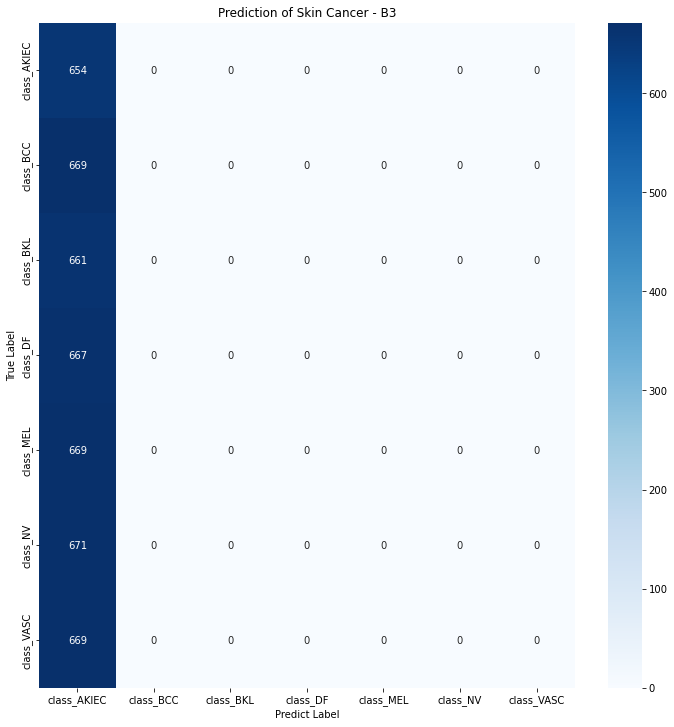

In [38]:
b3_cm = confusion_matrix(y_true, b3_y_pred)
plt.figure(figsize=(12, 12), dpi=72, edgecolor='k')
ax = sns.heatmap(b3_cm, cmap="Blues", annot=True, fmt="d", xticklabels=n_classes, yticklabels=n_classes)
plt.title("Prediction of Skin Cancer - B3")
plt.xlabel("Predict Label")
plt.ylabel("True Label")
plt.show(ax)

# Option C - Binary Model

## Data Preprocessing

### Converting the dataset from one folder into sorted, separate folders

In [22]:
class_data = pd.read_csv("GroundTruth.csv")
class_data.head()

image  MEL   NV  BCC  AKIEC  BKL   DF  VASC
0  ISIC_0024306  0.0  1.0  0.0    0.0  0.0  0.0   0.0
1  ISIC_0024307  0.0  1.0  0.0    0.0  0.0  0.0   0.0
2  ISIC_0024308  0.0  1.0  0.0    0.0  0.0  0.0   0.0
3  ISIC_0024309  0.0  1.0  0.0    0.0  0.0  0.0   0.0
4  ISIC_0024310  1.0  0.0  0.0    0.0  0.0  0.0   0.0

In [23]:
class_data.shape

(10015, 8)

In [24]:
# create new dataframe
binary_class_df = class_data.copy()
class_list = []
for i in range(class_data.shape[0]):
    for column_name, column_data in class_data.iteritems():
        if(column_name != "image" and column_data[i] == 1):
            if(column_name=="MEL"):
                class_name = "Malignant"
            elif(column_name=="NV"):
                class_name = "Benign"
            elif(column_name=="BCC"):
                class_name = "Malignant"
            elif(column_name=="AKIEC"):
                class_name = "Malignant"
            elif(column_name=="BKL"):
                class_name = "Benign"
            elif(column_name=="DF"):
                class_name = "Benign"
            else:
                class_name = "Benign"
    class_list.append(class_name)
binary_class_df.insert(1, "class_name",class_list,True)
binary_class_df.drop(labels=["MEL", "NV", "BCC", "AKIEC", "BKL", "DF", "VASC"], axis=1, inplace = True)
binary_class_df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_29688\1366526105.py:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column_name, column_data in class_data.iteritems():


image class_name
0  ISIC_0024306     Benign
1  ISIC_0024307     Benign
2  ISIC_0024308     Benign
3  ISIC_0024309     Benign
4  ISIC_0024310  Malignant

In [26]:
# save new csv to folder
csv_path = r"C:\Users\User\Downloads\FYP\binaryid.csv"
binary_class_df.to_csv(csv_path, index=False)

In [36]:
# sort images into folders by class
labels = pd.read_csv("binaryid.csv")

img_dir =r"C:\Users\User\Downloads\FYP\images"
folder_dir = r"C:\Users\User\Downloads\FYP\binary_data\class_"
if not os.path.exists(folder_dir):
    os.mkdir(folder_dir)

In [38]:
for filename, class_name in labels.values:
    # create subdirectory with `class_name`
    if not os.path.exists(folder_dir + str(class_name)):
        os.mkdir(folder_dir + str(class_name))
    src_path = img_dir + '/'+ filename + '.jpg'
    dst_path = folder_dir + str(class_name) + '/' + filename + '.jpg'
    try:
        shutil.copy(src_path, dst_path)
        print("sucessful")
    except IOError as e:
        print('Unable to copy file {} to {}'
              .format(src_path, dst_path))
    except:
        print('When try copy file {} to {}, unexpected error: {}'
              .format(src_path, dst_path, sys.exc_info()))
os.rmdir(folder_dir)

sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful


sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful


sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful


sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful


sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful


sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful


sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful


sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful


sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful


sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful


sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful


sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful


### Split data in each class into train validation test sets

In [39]:
input_folder = r"C:\Users\User\Downloads\FYP\binary_data"
splitfolders.ratio(input_folder, output="bin_dataset", seed = SEED, ratio=(.7,.2,.1),group_prefix=None)

Copying files: 10015 files [00:09, 1032.27 files/s]


## Load data

In [9]:
# define parameters
class_num = 2
target_size = (224,224)
size_batch = 32
epochs = 50

In [10]:
def bin_data_loader(class_num,target_size,size_batch,epochs,SEED):
    # not augmented data
    training_data = reg_data_gen.flow_from_directory(directory=r"C:\Users\User\Downloads\FYP\bin_dataset\train",
                                                 target_size = target_size,
                                                 class_mode = 'categorical',
                                                 batch_size = size_batch,
                                                 seed=SEED)
    validation_data = reg_data_gen.flow_from_directory(directory=r"C:\Users\User\Downloads\FYP\bin_dataset\val",
                                                 target_size = target_size,
                                                 class_mode = 'categorical',
                                                 batch_size = size_batch,
                                                 seed=SEED)
    test_data = reg_data_gen.flow_from_directory(directory=r"C:\Users\User\Downloads\FYP\bin_dataset\test",
                                                 target_size = target_size,
                                                 class_mode = 'categorical',
                                                 batch_size = size_batch,
                                                 seed=SEED)
    
    return training_data,validation_data,test_data
    
training_data,validation_data,test_data = bin_data_loader(class_num,
                                                          target_size,
                                                          size_batch,
                                                          epochs,
                                                          SEED)

Found 7009 images belonging to 2 classes.
Found 2002 images belonging to 2 classes.
Found 1004 images belonging to 2 classes.


## Building the binary baseline: EfficientNetB0 + Transfer Learning (No Class Weights)

In [73]:
# building the model
input_shape = (224, 224, 3)
conv_base = EfficientNetB0(weights="imagenet", include_top=False, input_shape=input_shape)
bin_base_model = models.Sequential()
bin_base_model.add(conv_base)
bin_base_model.add(layers.GlobalMaxPooling2D(name="gap"))
#avoid overfitting
bin_base_model.add(layers.Dropout(rate=0.5, name="dropout_out"))
bin_base_model.add(layers.Dense(class_num, activation="sigmoid", name="fc_out"))
conv_base.trainable = False

In [74]:
# summary of EfficientNetB0 model
bin_base_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 7, 7, 1280)        4049571   
 )                                                               
                                                                 
 gap (GlobalMaxPooling2D)    (None, 1280)              0         
                                                                 
 dropout_out (Dropout)       (None, 1280)              0         
                                                                 
 fc_out (Dense)              (None, 2)                 2562      
                                                                 
Total params: 4052133 (15.46 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 4049571 (15.45 MB)
_________________________________________________________________


In [75]:
bin_base_model.compile(optimizer="adam", loss="binary_crossentropy",metrics=eval_metrics)

In [77]:
bin_history = bin_base_model.fit(
    training_data,
    steps_per_epoch=size_batch,
    epochs=epochs,
    validation_data=validation_data,
    validation_steps=size_batch,
    verbose=1,
    use_multiprocessing=False,
    workers=4,
)

Epoch 1/50
32/32 [==============================] - 38s 1s/step - loss: 1.1722 - precision: 0.6886 - recall: 0.7059 - accuracy: 0.7241 - auc: 0.7379 - F1_score: 0.7053 - specificity: 0.6904 - val_loss: 0.8394 - val_precision: 0.8057 - val_recall: 0.8057 - val_accuracy: 0.8057 - val_auc: 0.8057 - val_F1_score: 0.8057 - val_specificity: 0.8057
Epoch 2/50
32/32 [==============================] - 39s 1s/step - loss: 1.1876 - precision: 0.7127 - recall: 0.7100 - accuracy: 0.7510 - auc: 0.7486 - F1_score: 0.7097 - specificity: 0.7139 - val_loss: 0.5872 - val_precision: 0.8037 - val_recall: 0.8037 - val_accuracy: 0.8037 - val_auc: 0.7776 - val_F1_score: 0.8037 - val_specificity: 0.8037
Epoch 3/50
32/32 [==============================] - 38s 1s/step - loss: 1.0972 - precision: 0.6979 - recall: 0.6908 - accuracy: 0.7392 - auc: 0.7402 - F1_score: 0.7025 - specificity: 0.7100 - val_loss: 0.6289 - val_precision: 0.8037 - val_recall: 0.8037 - val_accuracy: 0.8037 - val_auc: 0.8037 - val_F1_score: 0

Epoch 25/50
32/32 [==============================] - 38s 1s/step - loss: 0.5834 - precision: 0.7734 - recall: 0.7832 - accuracy: 0.7852 - auc: 0.8052 - F1_score: 0.7782 - specificity: 0.7705 - val_loss: 0.4788 - val_precision: 0.8154 - val_recall: 0.8154 - val_accuracy: 0.8154 - val_auc: 0.8087 - val_F1_score: 0.8154 - val_specificity: 0.8154
Epoch 26/50
32/32 [==============================] - 38s 1s/step - loss: 0.5962 - precision: 0.7593 - recall: 0.7607 - accuracy: 0.7783 - auc: 0.7922 - F1_score: 0.7598 - specificity: 0.7588 - val_loss: 0.5003 - val_precision: 0.8027 - val_recall: 0.8027 - val_accuracy: 0.8027 - val_auc: 0.8029 - val_F1_score: 0.8027 - val_specificity: 0.8027
Epoch 27/50
32/32 [==============================] - 38s 1s/step - loss: 0.5745 - precision: 0.7782 - recall: 0.7881 - accuracy: 0.7920 - auc: 0.7987 - F1_score: 0.7833 - specificity: 0.7754 - val_loss: 0.4934 - val_precision: 0.8057 - val_recall: 0.8057 - val_accuracy: 0.8057 - val_auc: 0.8057 - val_F1_score

Epoch 49/50
32/32 [==============================] - 38s 1s/step - loss: 0.5921 - precision: 0.7832 - recall: 0.7832 - accuracy: 0.7842 - auc: 0.7889 - F1_score: 0.7830 - specificity: 0.7832 - val_loss: 0.4757 - val_precision: 0.8271 - val_recall: 0.8271 - val_accuracy: 0.8271 - val_auc: 0.8415 - val_F1_score: 0.8271 - val_specificity: 0.8271
Epoch 50/50
32/32 [==============================] - 38s 1s/step - loss: 0.5655 - precision: 0.7754 - recall: 0.7825 - accuracy: 0.7774 - auc: 0.7962 - F1_score: 0.7856 - specificity: 0.7803 - val_loss: 0.4861 - val_precision: 0.8213 - val_recall: 0.8213 - val_accuracy: 0.8213 - val_auc: 0.8262 - val_F1_score: 0.8213 - val_specificity: 0.8213


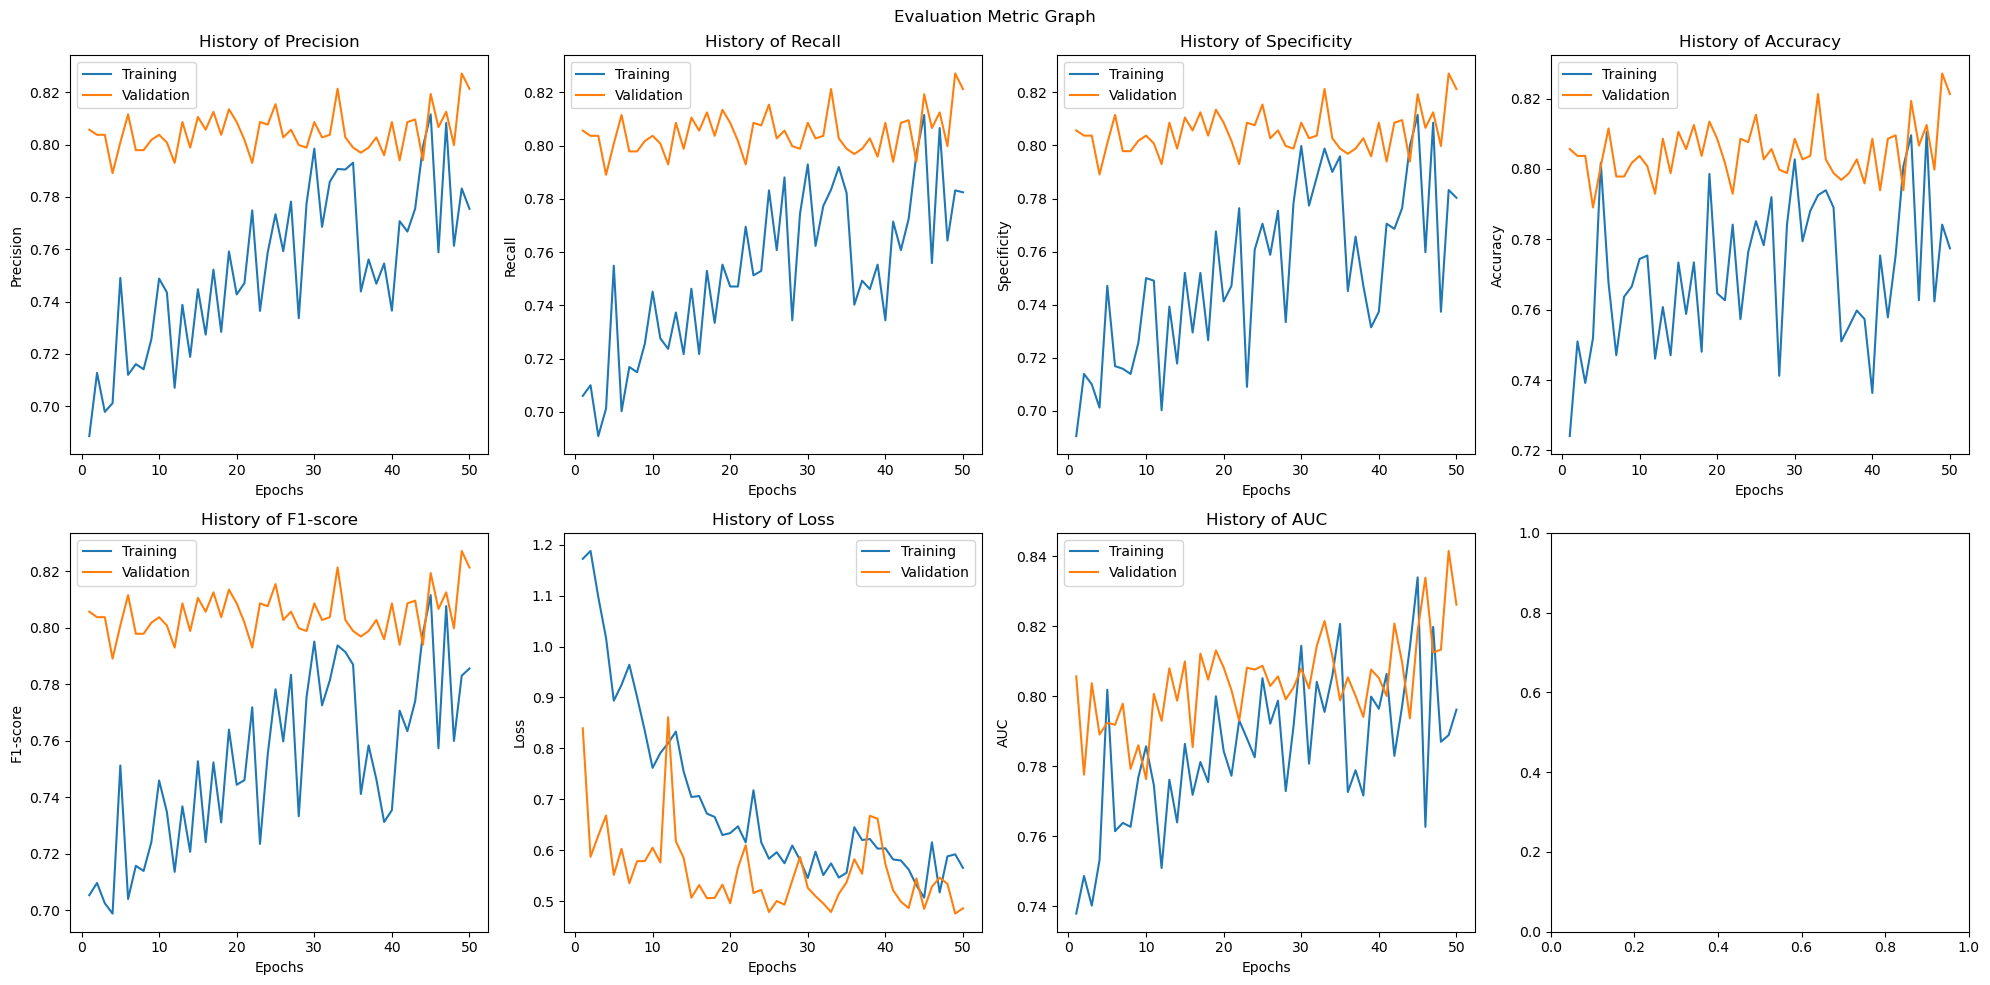

In [79]:
plot_history(bin_history.history["precision"],bin_history.history["val_precision"],
             bin_history.history["recall"],bin_history.history["val_recall"],
             bin_history.history["specificity"],bin_history.history["val_specificity"],
             bin_history.history["accuracy"],bin_history.history["val_accuracy"],
             bin_history.history["loss"],bin_history.history["val_loss"],
             bin_history.history["auc"],bin_history.history["val_auc"],
             bin_history.history["F1_score"],bin_history.history["val_F1_score"])

## Evaluate model performance on test data

In [80]:
# returns loss value and metrics value for the model on test data
eval_scores = bin_base_model.evaluate(test_data)

32/32 [==============================] - 19s 575ms/step - loss: 0.5048 - precision: 0.8038 - recall: 0.8038 - accuracy: 0.8038 - auc: 0.8054 - F1_score: 0.8060 - specificity: 0.8060


In [62]:
n_classes = ["class_Benign", "class_Malignant"]

In [63]:
y_true = test_data.classes

In [84]:
base_y_ = bin_base_model.predict(test_data)
base_y_pred = base_y_.argmax(axis=-1)

32/32 [==============================] - 18s 569ms/step


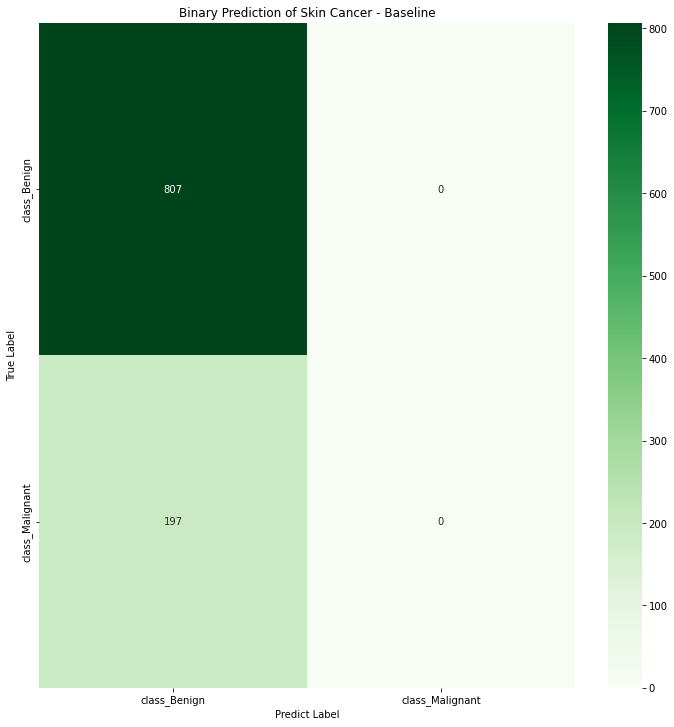

In [85]:
base_cm = confusion_matrix(y_true, base_y_pred)
plt.figure(figsize=(12, 12), dpi=72, edgecolor='k')
ax = sns.heatmap(base_cm, cmap="Greens", annot=True, fmt="d", xticklabels=n_classes, yticklabels=n_classes)
plt.title("Binary Prediction of Skin Cancer - Baseline")
plt.xlabel("Predict Label")
plt.ylabel("True Label")
plt.show(ax)

In [50]:
bin_class_weights = class_weight.compute_class_weight(class_weight = 'balanced',
                                                  classes = np.unique(training_data.classes),
                                                  y=training_data.classes)
train_class_weights = dict(enumerate(bin_class_weights))

In [87]:
print(train_class_weights)

{0: 0.6211449840482098, 1: 2.563643013899049}


# EfficientNetB0 Binary

In [52]:
# building the model
input_shape = (224, 224, 3)
b0_conv_base = EfficientNetB0(weights="imagenet", include_top=False, input_shape=input_shape)
b0_model = models.Sequential()
b0_model.add(b0_conv_base)
b0_model.add(layers.GlobalMaxPooling2D(name="gap"))
#avoid overfitting
b0_model.add(layers.Dropout(rate=0.5, name="dropout_out"))
b0_model.add(layers.Dense(class_num, activation="sigmoid", name="fc_out"))
b0_conv_base.trainable = False

In [53]:
# summary of EfficientNetB0 model
b0_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 7, 7, 1280)        4049571   
 )                                                               
                                                                 
 gap (GlobalMaxPooling2D)    (None, 1280)              0         
                                                                 
 dropout_out (Dropout)       (None, 1280)              0         
                                                                 
 fc_out (Dense)              (None, 2)                 2562      
                                                                 
Total params: 4052133 (15.46 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 4049571 (15.45 MB)
_________________________________________________________________


In [55]:
from tensorflow.keras.optimizers import Adam

# Define the learning rate (e.g., 0.001)
custom_learning_rate = 0.001

# Create the optimizer with the custom learning rate
custom_optimizer = Adam(learning_rate=custom_learning_rate)


In [56]:
b0_model.compile(optimizer="adam", loss="binary_crossentropy",metrics=eval_metrics)

In [57]:
history = b0_model.fit(
    training_data,
    class_weight = train_class_weights,
    steps_per_epoch=size_batch,
    epochs=epochs,
    validation_data=validation_data,
    validation_steps=size_batch,
    verbose=1,
    use_multiprocessing=False,
    workers=4,
    shuffle = True
)

Epoch 1/50
32/32 [==============================] - 45s 1s/step - loss: 3.9190 - precision: 0.7335 - recall: 0.3696 - accuracy: 0.3877 - auc: 0.7515 - F1_score: 0.7357 - specificity: 0.7314 - val_loss: 0.6391 - val_precision: 0.8057 - val_recall: 0.8057 - val_accuracy: 0.8057 - val_auc: 0.8050 - val_F1_score: 0.8057 - val_specificity: 0.8057
Epoch 2/50
32/32 [==============================] - 38s 1s/step - loss: 3.8519 - precision: 0.7366 - recall: 0.7321 - accuracy: 0.7865 - auc: 0.7851 - F1_score: 0.7312 - specificity: 0.7158 - val_loss: 1.0952 - val_precision: 0.7998 - val_recall: 0.7998 - val_accuracy: 0.7998 - val_auc: 0.7998 - val_F1_score: 0.7998 - val_specificity: 0.7998
Epoch 3/50
32/32 [==============================] - 39s 1s/step - loss: 3.5531 - precision: 0.7519 - recall: 0.7607 - accuracy: 0.8018 - auc: 0.7944 - F1_score: 0.7565 - specificity: 0.7490 - val_loss: 0.6715 - val_precision: 0.8057 - val_recall: 0.8057 - val_accuracy: 0.8057 - val_auc: 0.8030 - val_F1_score: 0

Epoch 25/50
32/32 [==============================] - 39s 1s/step - loss: 1.8954 - precision: 0.7977 - recall: 0.8008 - accuracy: 0.8066 - auc: 0.8083 - F1_score: 0.7994 - specificity: 0.7969 - val_loss: 0.5054 - val_precision: 0.8037 - val_recall: 0.8037 - val_accuracy: 0.8037 - val_auc: 0.7994 - val_F1_score: 0.8037 - val_specificity: 0.8037
Epoch 26/50
32/32 [==============================] - 39s 1s/step - loss: 1.9246 - precision: 0.7830 - recall: 0.7822 - accuracy: 0.7998 - auc: 0.7990 - F1_score: 0.7824 - specificity: 0.7832 - val_loss: 0.4983 - val_precision: 0.8047 - val_recall: 0.8047 - val_accuracy: 0.8047 - val_auc: 0.8241 - val_F1_score: 0.8047 - val_specificity: 0.8047
Epoch 27/50
32/32 [==============================] - 38s 1s/step - loss: 1.7215 - precision: 0.8229 - recall: 0.8187 - accuracy: 0.8288 - auc: 0.8356 - F1_score: 0.8261 - specificity: 0.8291 - val_loss: 0.5943 - val_precision: 0.8096 - val_recall: 0.8096 - val_accuracy: 0.8096 - val_auc: 0.8096 - val_F1_score

Epoch 49/50
32/32 [==============================] - 38s 1s/step - loss: 1.7092 - precision: 0.8122 - recall: 0.8147 - accuracy: 0.8157 - auc: 0.8247 - F1_score: 0.8192 - specificity: 0.8174 - val_loss: 0.5298 - val_precision: 0.8115 - val_recall: 0.8115 - val_accuracy: 0.8115 - val_auc: 0.8142 - val_F1_score: 0.8115 - val_specificity: 0.8115
Epoch 50/50
32/32 [==============================] - 39s 1s/step - loss: 1.8430 - precision: 0.7840 - recall: 0.7871 - accuracy: 0.7852 - auc: 0.8130 - F1_score: 0.7854 - specificity: 0.7832 - val_loss: 0.5361 - val_precision: 0.7930 - val_recall: 0.7930 - val_accuracy: 0.7930 - val_auc: 0.7926 - val_F1_score: 0.7930 - val_specificity: 0.7930


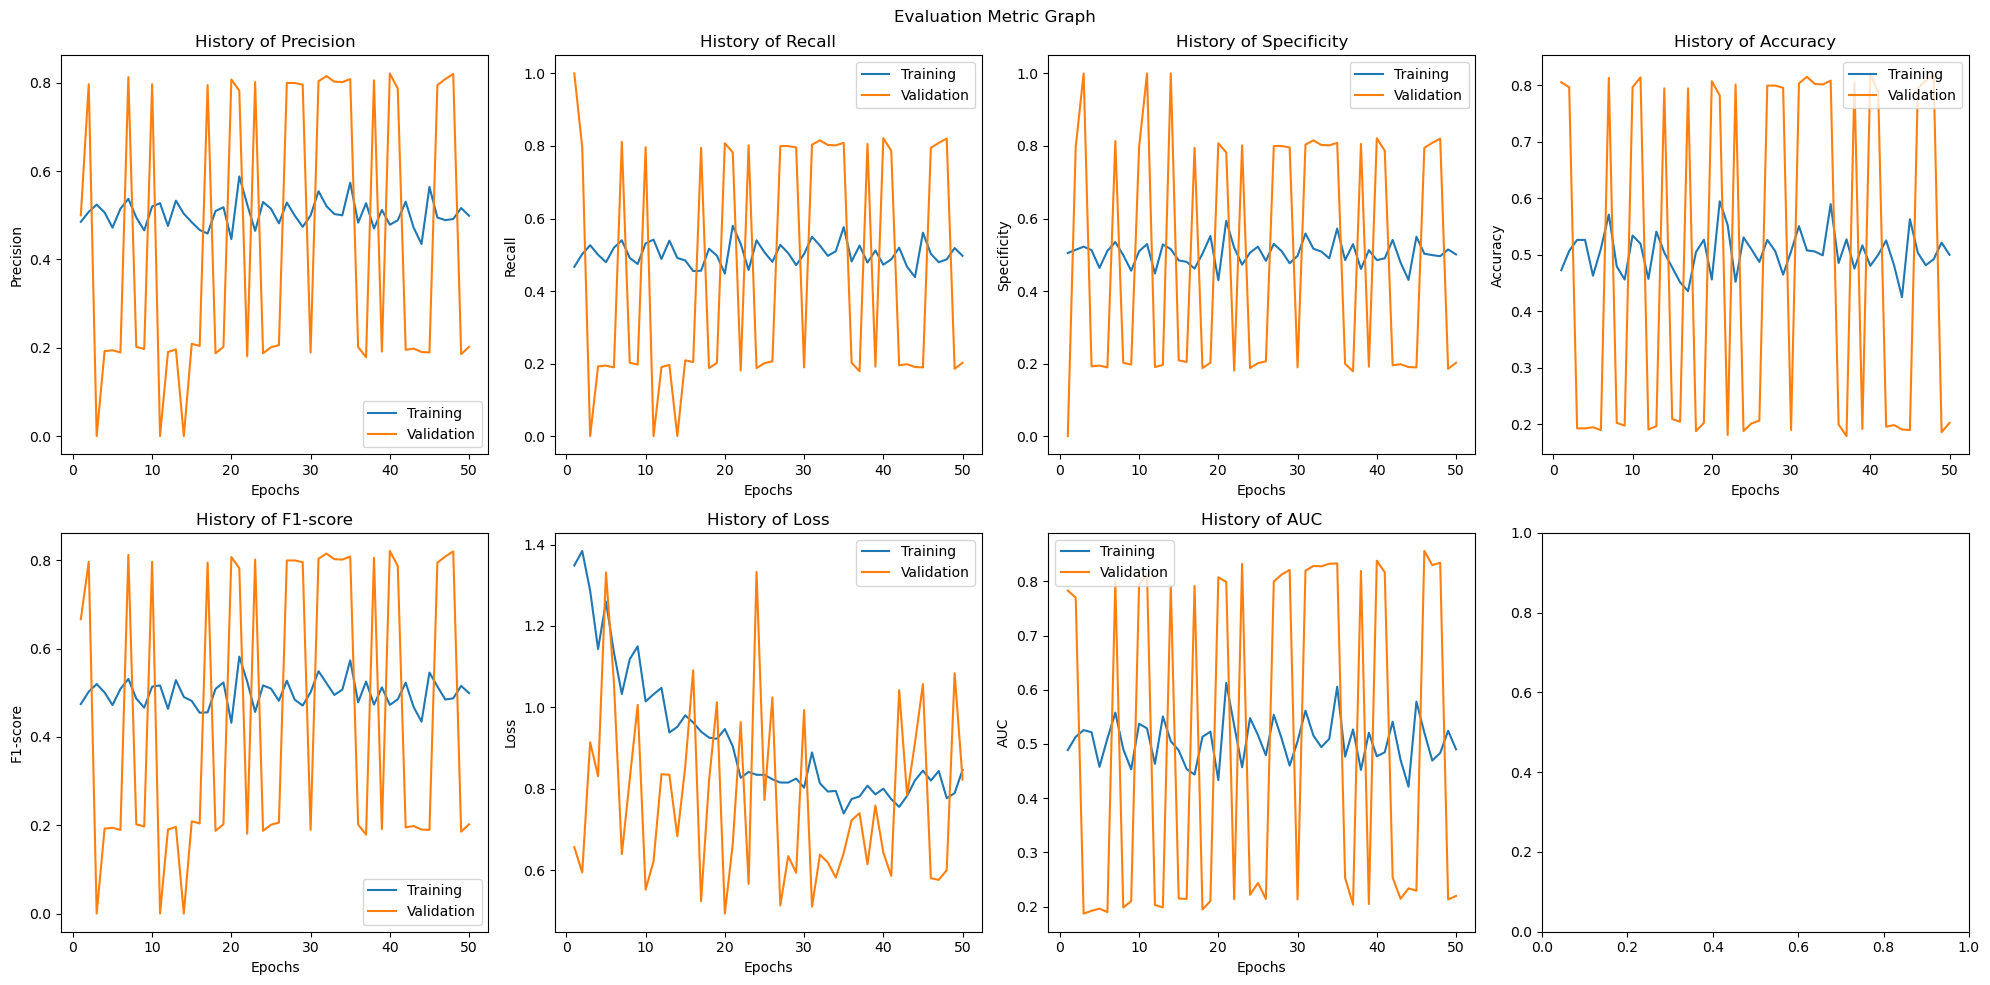

In [63]:
plot_history(history.history["precision"],history.history["val_precision"],
             history.history["recall"],history.history["val_recall"],
             history.history["specificity"],history.history["val_specificity"],
             history.history["accuracy"],history.history["val_accuracy"],
             history.history["loss"],history.history["val_loss"],
             history.history["auc"],history.history["val_auc"],
             history.history["F1_score"],history.history["val_F1_score"])

## Evaluate model performance on test data

In [59]:
# returns loss value and metrics value for the model on test data
b0_eval_scores = b0_model.evaluate(test_data)

32/32 [==============================] - 19s 580ms/step - loss: 0.5153 - precision: 0.8038 - recall: 0.8038 - accuracy: 0.8038 - auc: 0.8038 - F1_score: 0.8060 - specificity: 0.8060


In [60]:
b0_y_ = b0_model.predict(test_data)
b0_y_pred = b0_y_.argmax(axis=-1)

32/32 [==============================] - 20s 587ms/step


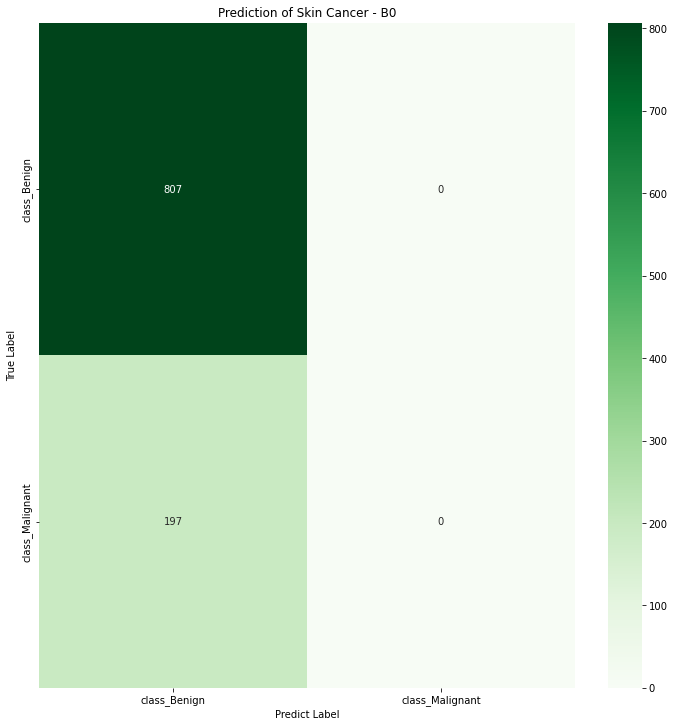

In [64]:
b0_cm = confusion_matrix(y_true, b0_y_pred)
plt.figure(figsize=(12, 12), dpi=72, edgecolor='k')
ax = sns.heatmap(b0_cm, cmap="Greens", annot=True, fmt="d", xticklabels=n_classes, yticklabels=n_classes)
plt.title("Prediction of Skin Cancer - B0")
plt.xlabel("Predict Label")
plt.ylabel("True Label")
plt.show(ax)

# EfficientNetB3 Binary

In [35]:
# define parameters
class_num = 2
target_size = (300,300)
size_batch = 32
epochs = 50

In [36]:
training_data,validation_data,test_data = bin_data_loader(class_num,
                                                          target_size,
                                                          size_batch,
                                                          epochs,
                                                          SEED)

Found 7009 images belonging to 2 classes.
Found 2002 images belonging to 2 classes.
Found 1004 images belonging to 2 classes.


In [37]:
# building the model
input_shape = (300, 300, 3)
conv_base_b3 = EfficientNetB3(weights="imagenet", include_top=False, input_shape=input_shape)
efn_b3_model = models.Sequential()
efn_b3_model.add(conv_base_b3)
efn_b3_model.add(layers.GlobalMaxPooling2D(name="gap"))
#avoid overfitting
efn_b3_model.add(layers.Dropout(rate=0.5, name="dropout_out"))
efn_b3_model.add(layers.Dense(class_num, activation="sigmoid", name="fc_out"))
conv_base_b3.trainable = False

In [38]:
# summary of EfficientNetB1 model
efn_b3_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional  (None, 10, 10, 1536)      10783535  
 )                                                               
                                                                 
 gap (GlobalMaxPooling2D)    (None, 1536)              0         
                                                                 
 dropout_out (Dropout)       (None, 1536)              0         
                                                                 
 fc_out (Dense)              (None, 2)                 3074      
                                                                 
Total params: 10786609 (41.15 MB)
Trainable params: 3074 (12.01 KB)
Non-trainable params: 10783535 (41.14 MB)
_________________________________________________________________


In [39]:
efn_b3_model.compile(optimizer="adam", loss="binary_crossentropy",metrics=eval_metrics)

In [51]:
b3_history = efn_b3_model.fit(
    training_data,
    class_weight = train_class_weights,
    steps_per_epoch=size_batch,
    epochs=epochs,
    validation_data=validation_data,
    validation_steps=size_batch,
    verbose=1,
    use_multiprocessing=False,
    workers=4,
    shuffle=True
)

Epoch 1/50
32/32 [==============================] - 132s 4s/step - loss: 1.2614 - precision: 0.5262 - recall: 0.5358 - accuracy: 0.5257 - auc: 0.5155 - F1_score: 0.5451 - specificity: 0.5322 - val_loss: 0.4740 - val_precision: 0.8184 - val_recall: 0.8184 - val_accuracy: 0.8184 - val_auc: 0.8661 - val_F1_score: 0.8184 - val_specificity: 0.8184
Epoch 2/50
32/32 [==============================] - 127s 4s/step - loss: 1.3095 - precision: 0.5045 - recall: 0.5055 - accuracy: 0.5025 - auc: 0.5201 - F1_score: 0.5197 - specificity: 0.5186 - val_loss: 0.5279 - val_precision: 0.8154 - val_recall: 0.8154 - val_accuracy: 0.8154 - val_auc: 0.8665 - val_F1_score: 0.8154 - val_specificity: 0.8154
Epoch 3/50
32/32 [==============================] - 129s 4s/step - loss: 1.1293 - precision: 0.4811 - recall: 0.4844 - accuracy: 0.4834 - auc: 0.4885 - F1_score: 0.4830 - specificity: 0.4775 - val_loss: 1.0874 - val_precision: 0.1904 - val_recall: 0.1904 - val_accuracy: 0.1904 - val_auc: 0.2428 - val_F1_score

Epoch 25/50
32/32 [==============================] - 129s 4s/step - loss: 1.1971 - precision: 0.4564 - recall: 0.4551 - accuracy: 0.4561 - auc: 0.4449 - F1_score: 0.4557 - specificity: 0.4580 - val_loss: 0.5455 - val_precision: 0.7900 - val_recall: 0.7900 - val_accuracy: 0.7900 - val_auc: 0.8596 - val_F1_score: 0.7900 - val_specificity: 0.7900
Epoch 26/50
32/32 [==============================] - 129s 4s/step - loss: 1.0445 - precision: 0.5074 - recall: 0.5000 - accuracy: 0.5059 - auc: 0.5100 - F1_score: 0.5040 - specificity: 0.5146 - val_loss: 0.4944 - val_precision: 0.8137 - val_recall: 0.8145 - val_accuracy: 0.8145 - val_auc: 0.8766 - val_F1_score: 0.8140 - val_specificity: 0.8135
Epoch 27/50
32/32 [==============================] - 129s 4s/step - loss: 1.0228 - precision: 0.5272 - recall: 0.5303 - accuracy: 0.5293 - auc: 0.5347 - F1_score: 0.5281 - specificity: 0.5244 - val_loss: 0.8682 - val_precision: 0.1953 - val_recall: 0.1953 - val_accuracy: 0.1953 - val_auc: 0.2578 - val_F1_sc

Epoch 49/50
32/32 [==============================] - 129s 4s/step - loss: 1.2961 - precision: 0.4884 - recall: 0.4922 - accuracy: 0.4912 - auc: 0.4935 - F1_score: 0.4906 - specificity: 0.4844 - val_loss: 0.6045 - val_precision: 0.8145 - val_recall: 0.8145 - val_accuracy: 0.8145 - val_auc: 0.8836 - val_F1_score: 0.8145 - val_specificity: 0.8145
Epoch 50/50
32/32 [==============================] - 127s 4s/step - loss: 1.1891 - precision: 0.5177 - recall: 0.5166 - accuracy: 0.5196 - auc: 0.5409 - F1_score: 0.5316 - specificity: 0.5332 - val_loss: 0.6244 - val_precision: 0.8008 - val_recall: 0.8047 - val_accuracy: 0.8027 - val_auc: 0.8523 - val_F1_score: 0.8028 - val_specificity: 0.7998


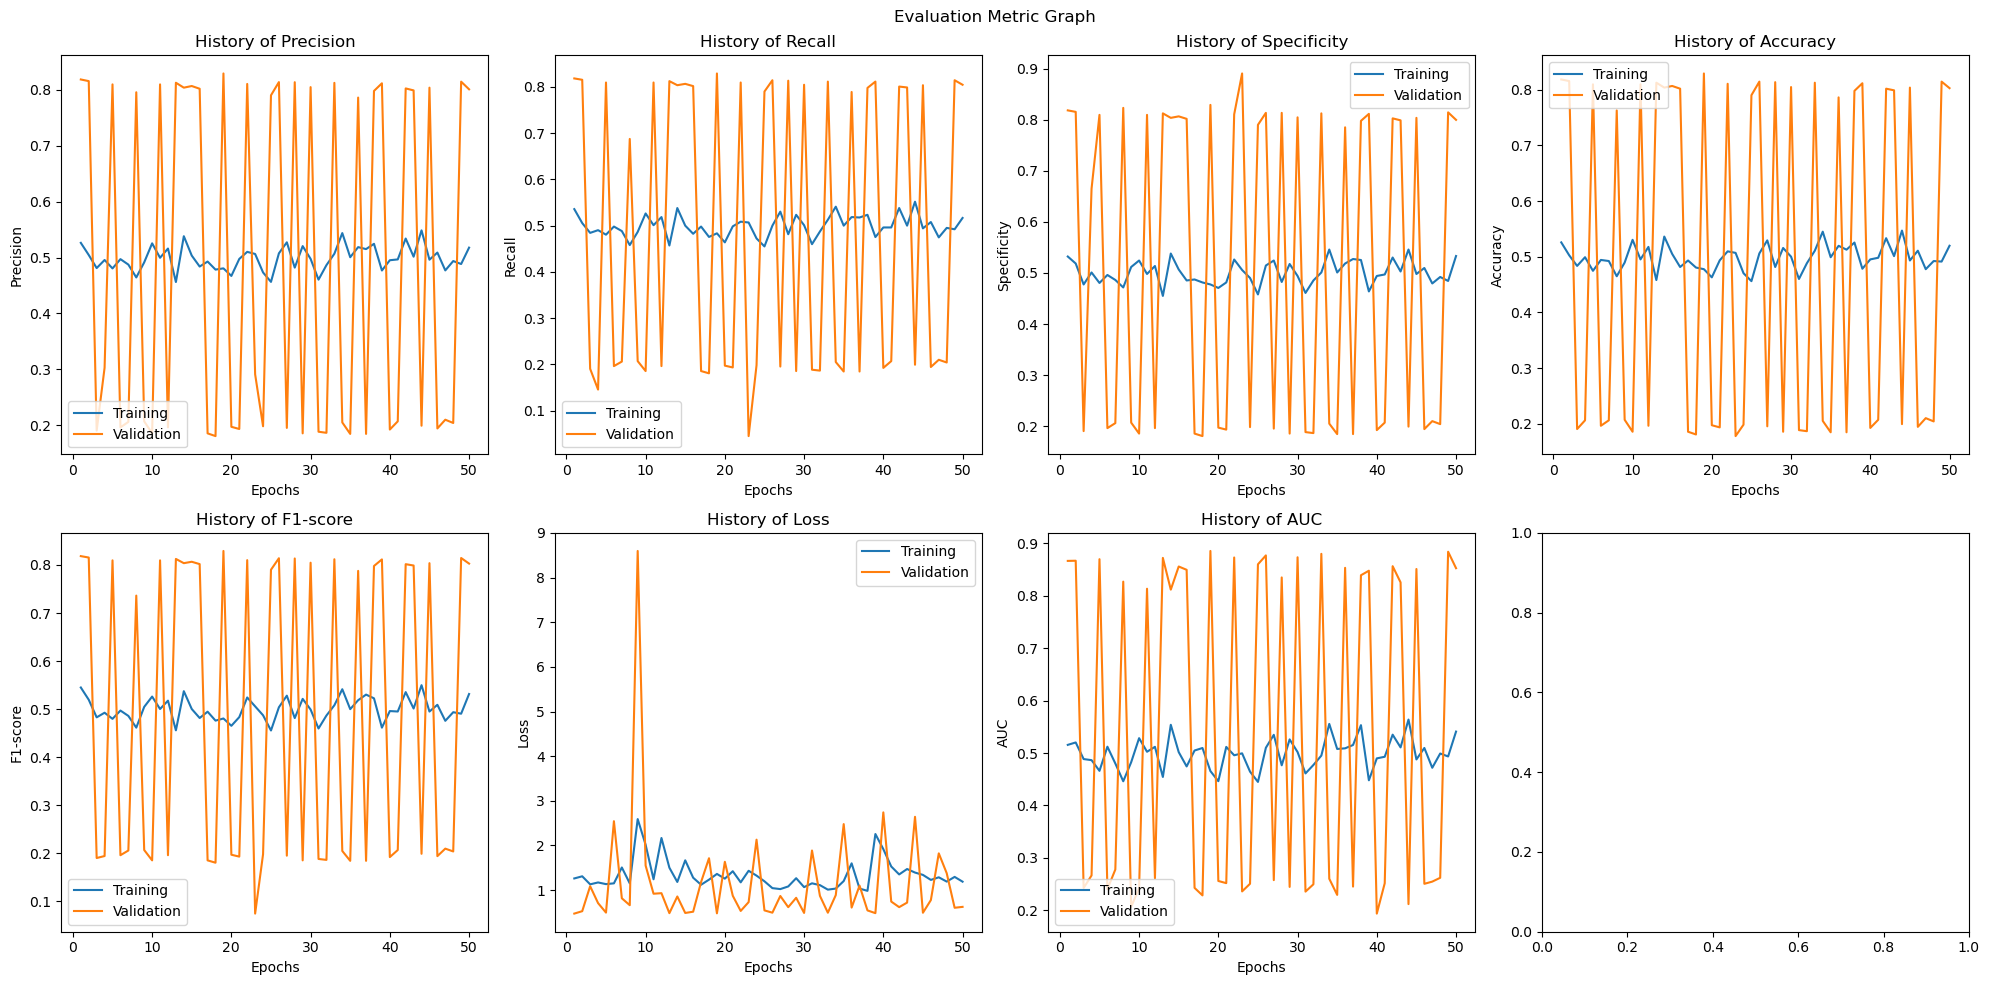

In [52]:
plot_history(b3_history.history["precision"],b3_history.history["val_precision"],
             b3_history.history["recall"],b3_history.history["val_recall"],
             b3_history.history["specificity"],b3_history.history["val_specificity"],
             b3_history.history["accuracy"],b3_history.history["val_accuracy"],
             b3_history.history["loss"],b3_history.history["val_loss"],
             b3_history.history["auc"],b3_history.history["val_auc"],
             b3_history.history["F1_score"],b3_history.history["val_F1_score"])

## Evaluate model performance on test data

In [53]:
# returns loss value and metrics value for the model on test data
eval_scores = efn_b3_model.evaluate(test_data)

32/32 [==============================] - 63s 2s/step - loss: 0.6241 - precision: 0.7976 - recall: 0.8008 - accuracy: 0.7988 - auc: 0.8540 - F1_score: 0.7999 - specificity: 0.7975


In [54]:
b3_y_ = efn_b3_model.predict(test_data)
b3_y_pred = b3_y_.argmax(axis=-1)

32/32 [==============================] - 63s 2s/step


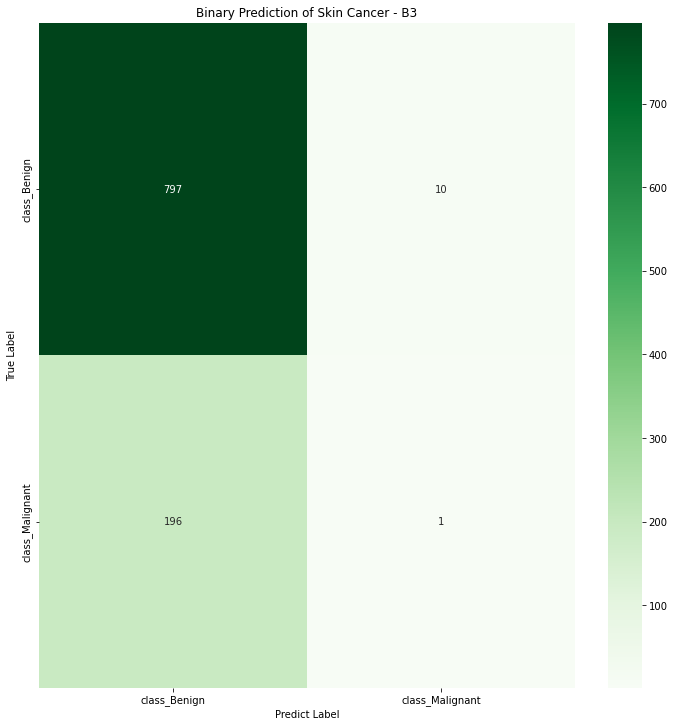

In [55]:
b3_cm = confusion_matrix(y_true, b3_y_pred)
plt.figure(figsize=(12, 12), dpi=72, edgecolor='k')
ax = sns.heatmap(b3_cm, cmap="Greens", annot=True, fmt="d", xticklabels=n_classes, yticklabels=n_classes)
plt.title("Binary Prediction of Skin Cancer - B3")
plt.xlabel("Predict Label")
plt.ylabel("True Label")
plt.show(ax)